In [1]:
import numpy as np
import pandas as pd
import mplleaflet
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mplleaflet      

In [12]:
df

,order_id,depot_id,type,parcel_size,dest_zone_alpha,scanned_at,dest_zone
0,165387601,103410,global_inbound,s,F,9/1/23 18:30,F01-C (LORONG 6 TOA PAYOH)
1,165387601,103410,global_inbound,s,F,9/1/23 18:59,F01-C (LORONG 6 TOA PAYOH)
2,165387601,255,warehouse_sweep,s,F,10/1/23 6:54,F01-C (LORONG 6 TOA PAYOH)
3,166121091,2,warehouse_sweep,m,D,3/1/23 21:51,D09-H
4,166121091,2,warehouse_sweep,m,D,3/1/23 21:52,D09-H
...,...,...,...,...,...,...,...
3493,168393941,103410,global_inbound,s,G,26/1/23 22:31,G12-F (YISHUN STREET 42)
3494,168393941,103430,global_inbound,s,G,26/1/23 22:33,G12-F (YISHUN STREET 42)
3495,168393941,251,warehouse_sweep,s,G,27/1/23 5:27,G12-F (YISHUN STREET 42)
3496,168395421,103410,global_inbound,s,J,24/1/23 20:24,J09-G (LORONG 40 GEYLANG)


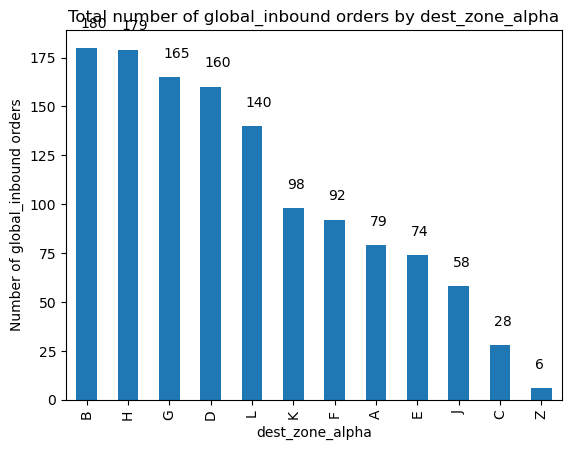

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to only include global inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Count the number of distinct global order IDs
distinct_global_orders = global_inbound_df['order_id'].nunique()

# Count the number of global inbound orders for each distinct dest_zone_alpha
global_inbound_counts = global_inbound_df['dest_zone_alpha'].value_counts()

# Create a new DataFrame with the counts and dest_zone_alpha as columns
global_inbound_counts_df = pd.DataFrame({'dest_zone_alpha': global_inbound_counts.index, 'global_inbound_count': global_inbound_counts.values})

# Create a new column with the total number of global inbound orders
total_global_inbound = global_inbound_counts_df['global_inbound_count'].sum()
global_inbound_counts_df['total_global_inbound'] = total_global_inbound

# Create a bar plot with value labels
ax = global_inbound_counts_df.plot(kind='bar', x='dest_zone_alpha', y='global_inbound_count', legend=False)
plt.xlabel('dest_zone_alpha')
plt.ylabel('Number of global_inbound orders')
plt.title('Total number of global_inbound orders by dest_zone_alpha')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+10, str(i.get_height()))
plt.show()

# Print the number of distinct global order IDs and the total number of global inbound orders
print('Number of distinct global order IDs:', distinct_global_orders)
print('Total number of global inbound orders:', total_global_inbound)


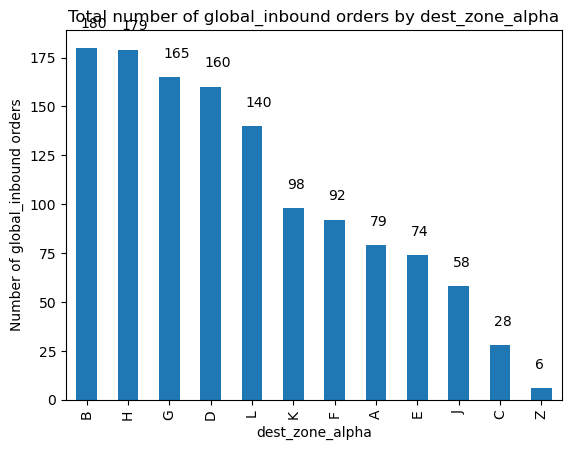

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


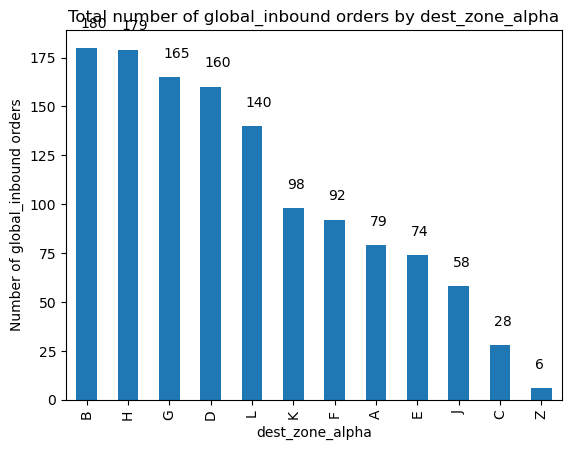

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


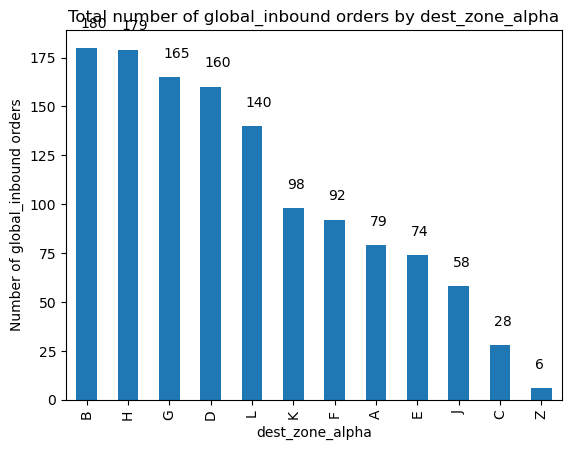

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


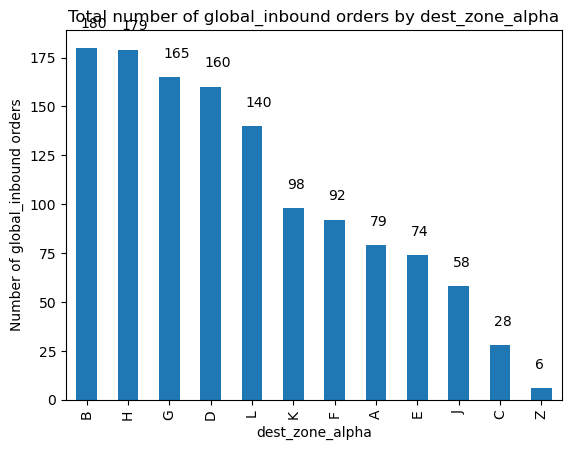

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


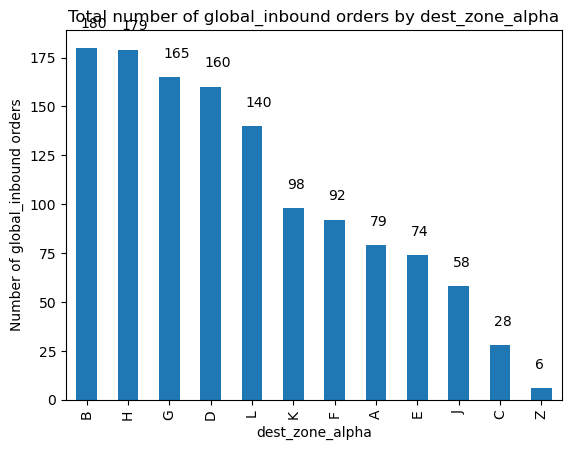

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


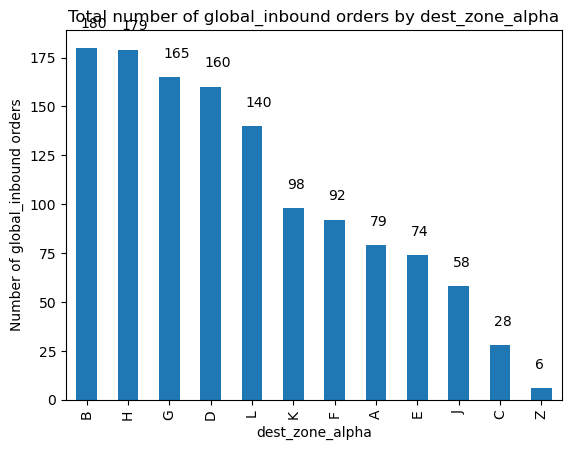

Number of distinct global order IDs: 1000
Total number of global inbound orders: 1259


KeyboardInterrupt: 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Define the path to the CSV file
csv_path = 'warehouse_scans_with_order_details2.csv'

# Define a function to update the plot
def update_plot():
    # Read the data from the CSV file
    df = pd.read_csv(csv_path)

    # Filter the data to only include global inbound orders
    global_inbound_df = df[df['type'] == 'global_inbound']

    # Count the number of distinct global order IDs
    distinct_global_orders = global_inbound_df['order_id'].nunique()

    # Count the number of global inbound orders for each distinct dest_zone_alpha
    global_inbound_counts = global_inbound_df['dest_zone_alpha'].value_counts()

    # Create a new DataFrame with the counts and dest_zone_alpha as columns
    global_inbound_counts_df = pd.DataFrame({'dest_zone_alpha': global_inbound_counts.index, 'global_inbound_count': global_inbound_counts.values})

    # Create a new column with the total number of global inbound orders
    total_global_inbound = global_inbound_counts_df['global_inbound_count'].sum()
    global_inbound_counts_df['total_global_inbound'] = total_global_inbound

    # Create a bar plot with value labels
    ax = global_inbound_counts_df.plot(kind='bar', x='dest_zone_alpha', y='global_inbound_count', legend=False)
    plt.xlabel('dest_zone_alpha')
    plt.ylabel('Number of global_inbound orders')
    plt.title('Total number of global_inbound orders by dest_zone_alpha')
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+10, str(i.get_height()))
    plt.show()

    # Print the number of distinct global order IDs and the total number of global inbound orders
    print('Number of distinct global order IDs:', distinct_global_orders)
    print('Total number of global inbound orders:', total_global_inbound)

# Define the refresh rate in seconds
refresh_rate = 3

# Start the live feed loop
while True:
    update_plot()
    time.sleep(refresh_rate)




IndexError: index 0 is out of bounds for axis 0 with size 0

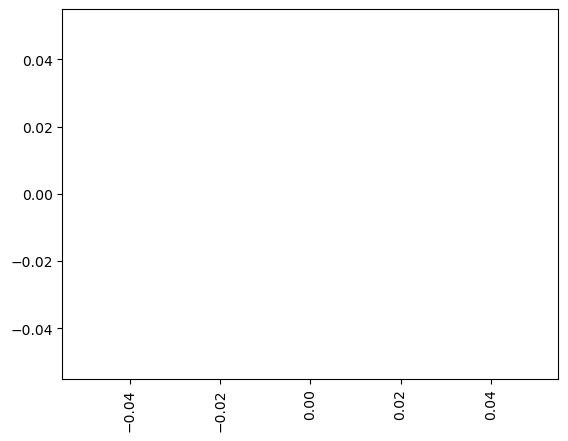

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

# Define the path to the CSV file
csv_path = 'warehouse_scans_with_order_details2.csv'

# Define a function to update the plot
def update_plot():
    # Read the data from the CSV file
    df = pd.read_csv(csv_path)

    # Convert the scanned_at column to datetime format
    df['scanned_at'] = pd.to_datetime(df['scanned_at'], format='%d/%m/%y %H:%M')

    # Get the earliest and latest scanned_at times
    earliest_time = df['scanned_at'].min()
    latest_time = df['scanned_at'].max()

    # Calculate the start and end times for the current hour
    current_time = latest_time.replace(minute=0, second=0, microsecond=0)
    start_time = current_time - timedelta(hours=1)

    # Filter the data to only include global inbound orders for the current hour
    current_hour_df = df[(df['type'] == 'global_inbound') & (df['scanned_at'] >= start_time) & (df['scanned_at'] < current_time)]

    # Count the number of distinct global order IDs
    distinct_global_orders = current_hour_df['order_id'].nunique()

    # Count the number of global inbound orders for each distinct dest_zone_alpha
    global_inbound_counts = current_hour_df['dest_zone_alpha'].value_counts()

    # Create a new DataFrame with the counts and dest_zone_alpha as columns
    global_inbound_counts_df = pd.DataFrame({'dest_zone_alpha': global_inbound_counts.index, 'global_inbound_count': global_inbound_counts.values})

    # Create a new column with the total number of global inbound orders
    total_global_inbound = global_inbound_counts_df['global_inbound_count'].sum()
    global_inbound_counts_df['total_global_inbound'] = total_global_inbound

    # Create a bar plot with value labels
    ax = global_inbound_counts_df.plot(kind='bar', x='dest_zone_alpha', y='global_inbound_count', legend=False)
    plt.xlabel('dest_zone_alpha')
    plt.ylabel('Number of global_inbound orders')
    plt.title(f'Total number of global_inbound orders by dest_zone_alpha ({start_time} - {current_time})')
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+10, str(i.get_height()))
    plt.show()

    # Print the number of distinct global order IDs and the total number of global inbound orders
    print('Number of distinct global order IDs:', distinct_global_orders)
    print('Total number of global inbound orders:', total_global_inbound)

# Define the refresh rate in seconds
refresh_rate = 5  # hourly

# Start the live feed loop
while True:
    update_plot()
    time.sleep(refresh_rate)



/var/folders/sk/7fyw_2qn5j35kf40jlm5f69h0000gn/T/ipykernel_38006/2348699150.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)


interactive(children=(DatePicker(value=datetime.date(2023, 1, 2), description='Select a date'), IntSlider(valu…

<function __main__.plot_counts_by_date_and_hour(date, hour)>

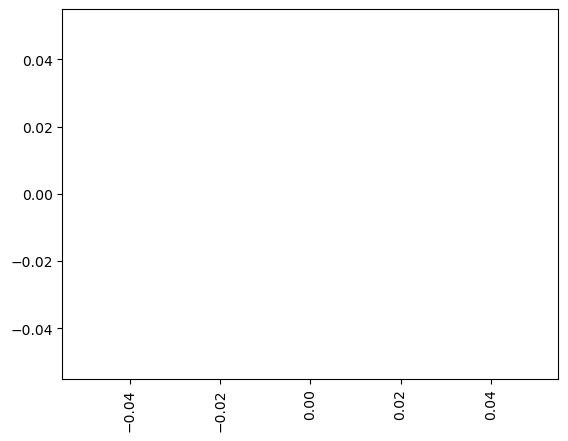

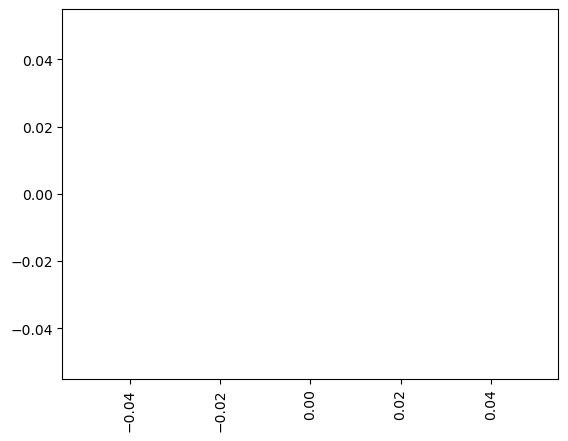

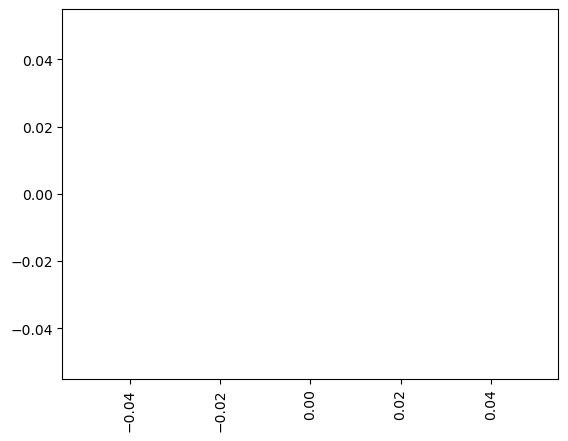

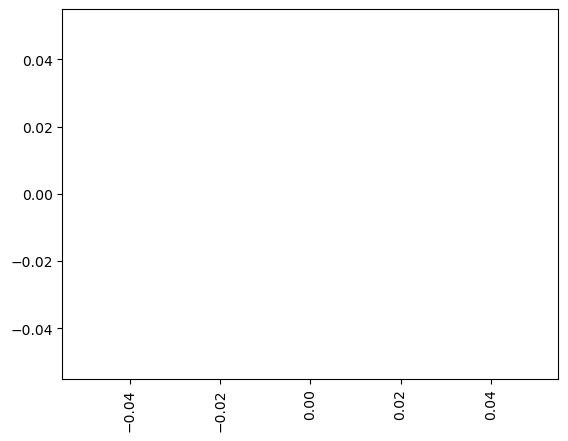

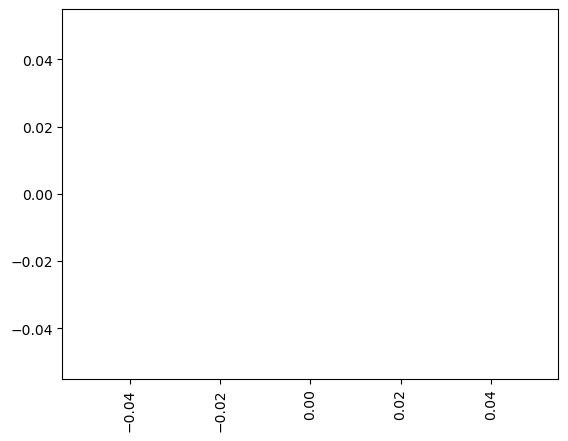

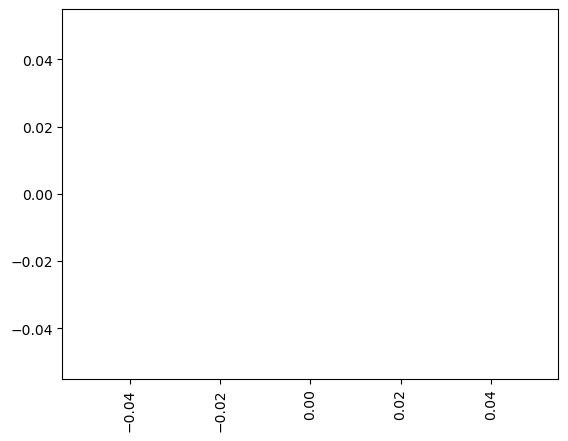

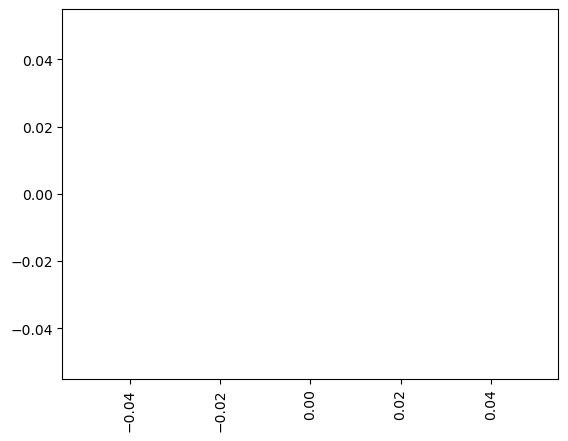

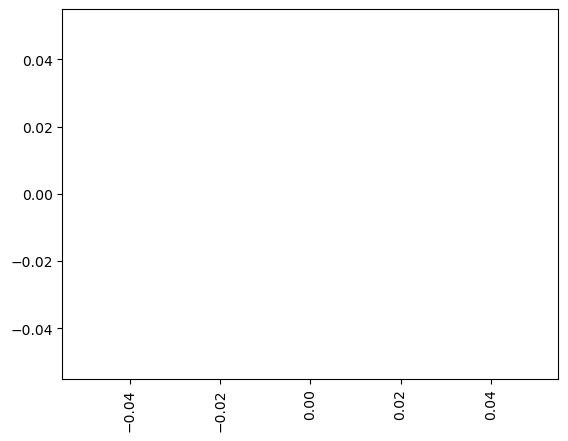

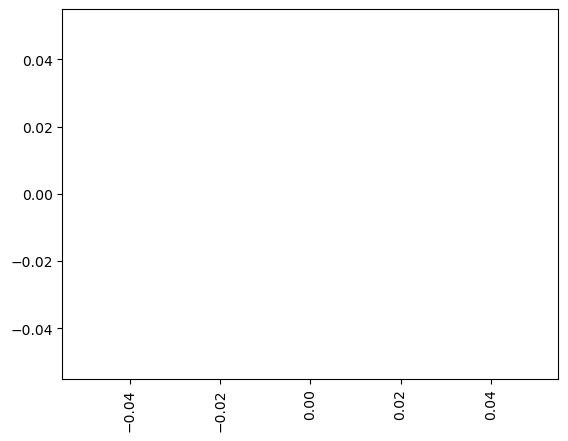

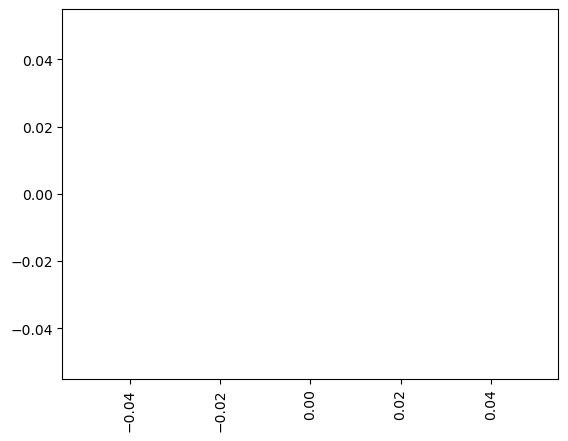

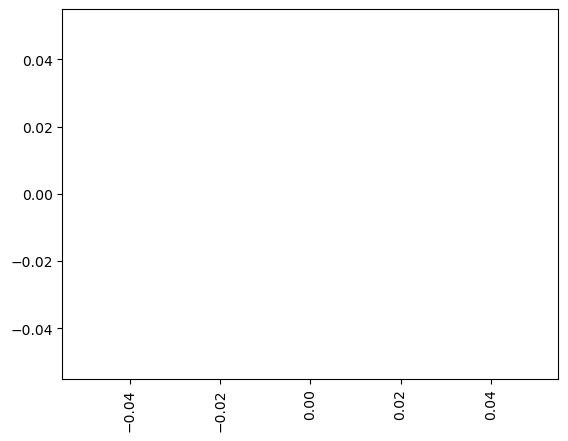

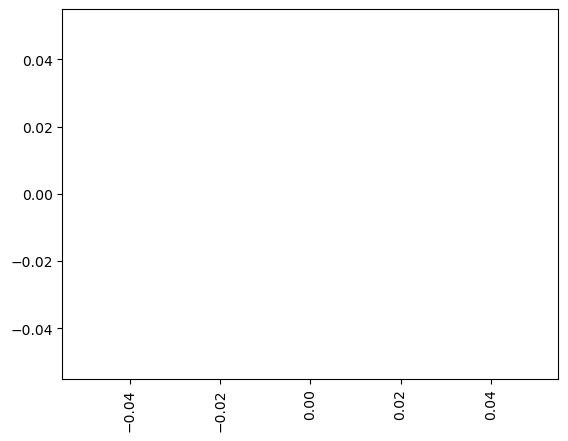

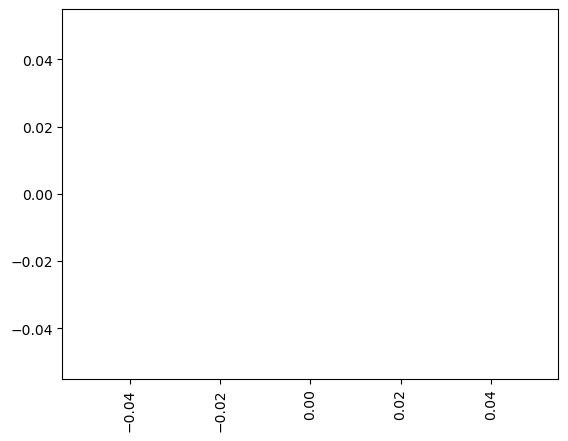

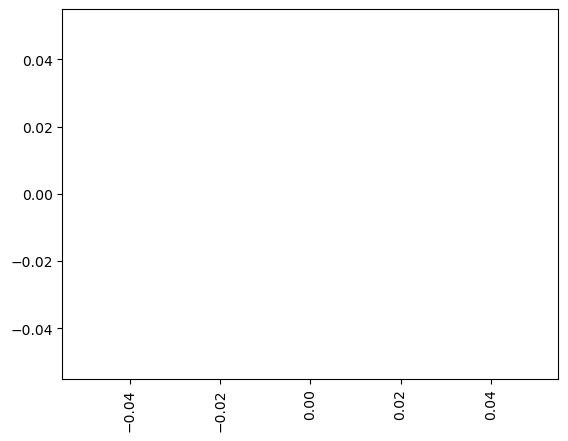

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ipywidgets import interact, widgets

# Read the data into a pandas DataFrame
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to include only global_inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Convert the scanned_at column to a datetime data type
global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)

# Define a function to create the interactive plot
def plot_counts_by_date_and_hour(date, hour):
    # Filter the data to include only the selected day and hour
    start_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=hour)
    end_time = start_time + timedelta(hours=1)
    filtered_df = global_inbound_df[(global_inbound_df['scanned_at'] >= start_time) & (global_inbound_df['scanned_at'] < end_time)]

    # Group the data by dest_zone_alpha values, and count the number of orders for each group
    counts_by_dest = filtered_df.groupby('dest_zone_alpha').size()

    # Create a bar plot
    counts_by_dest.plot(kind='bar')
    plt.xlabel('dest_zone_alpha')
    plt.ylabel('Number of global_inbound orders')
    plt.title('Global inbound order counts for {} {}:00-{} {}:00'.format(date.strftime('%Y-%m-%d'), hour, date.strftime('%Y-%m-%d'), hour+1))
    plt.show()

# Get the earliest and latest scanned_at time
earliest_time = global_inbound_df['scanned_at'].min()
latest_time = global_inbound_df['scanned_at'].max()

# Create date and time picker widgets for selecting the day and hour
date_picker = widgets.DatePicker(value=earliest_time.date(), description='Select a date')
hour_slider = widgets.IntSlider(min=0, max=23, step=1, value=earliest_time.hour, description='Select an hour')

# Call the interact function to create the interactive plot
interact(plot_counts_by_date_and_hour, date=date_picker, hour=hour_slider)


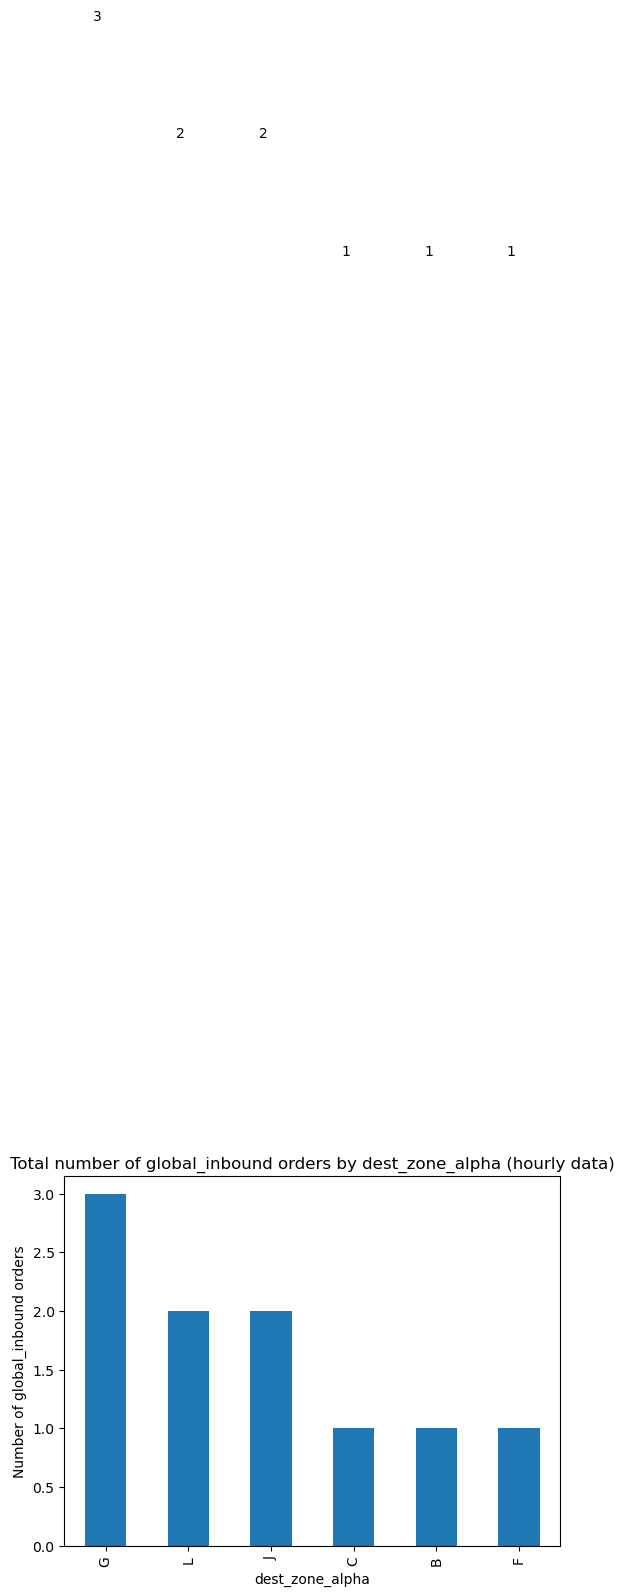

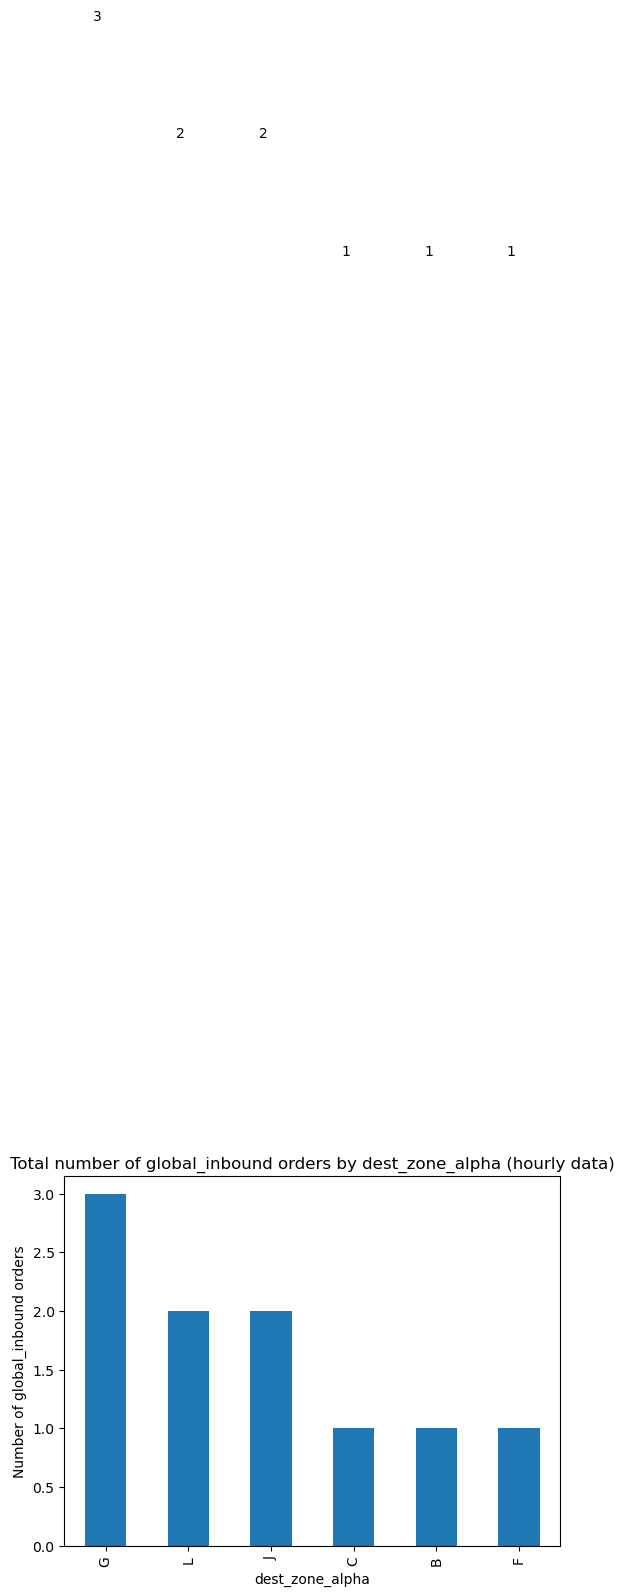

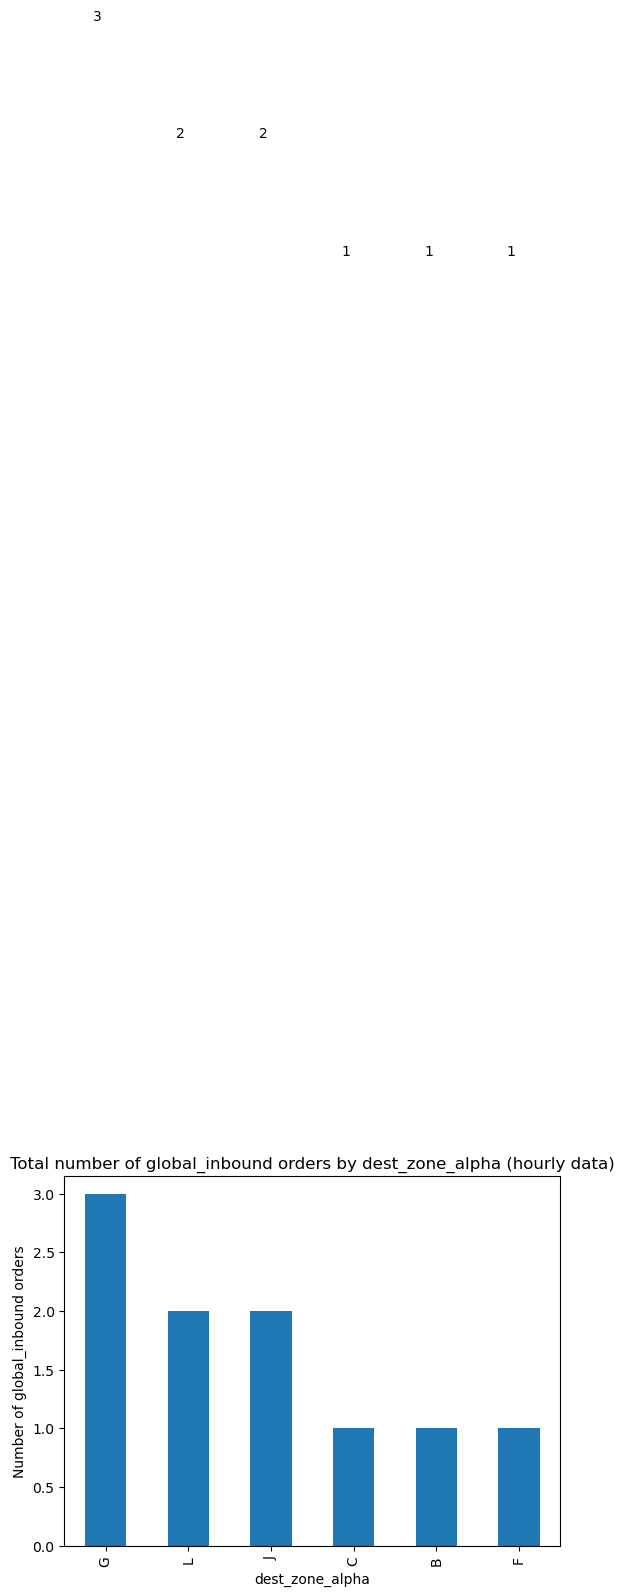

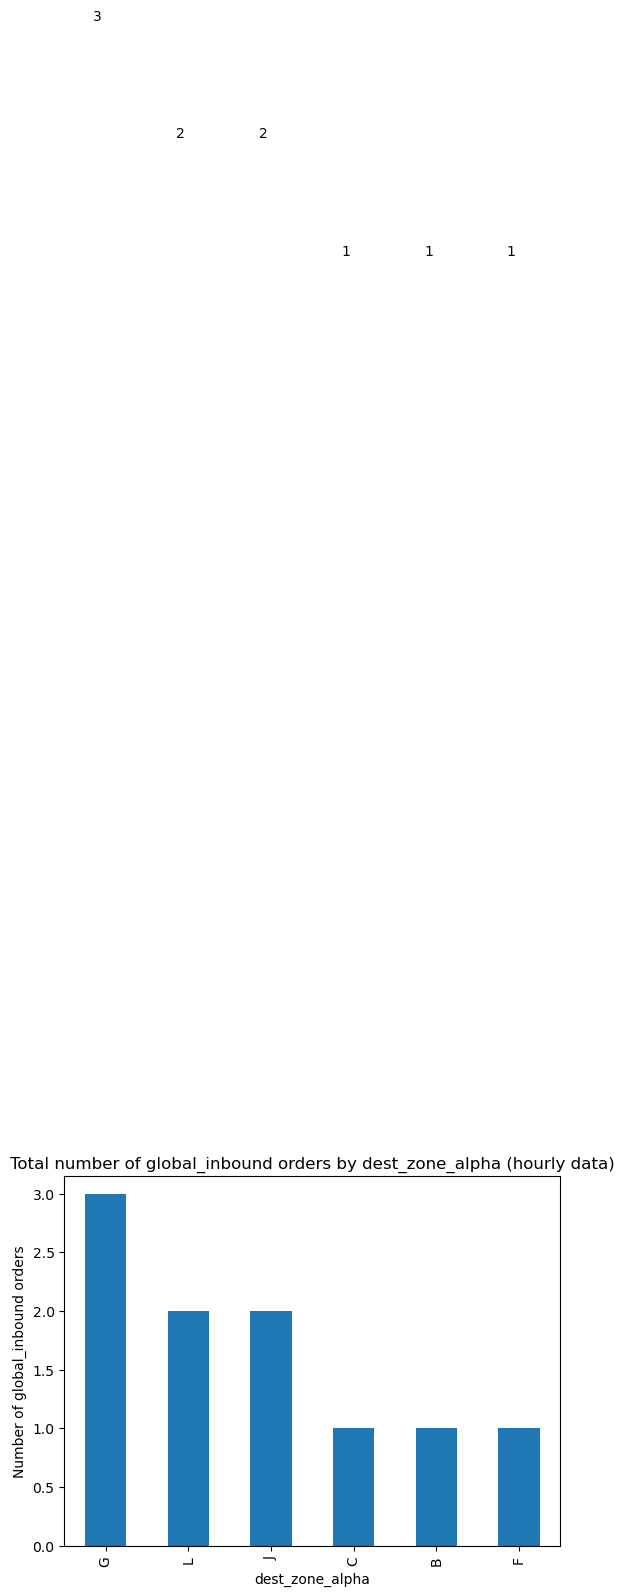

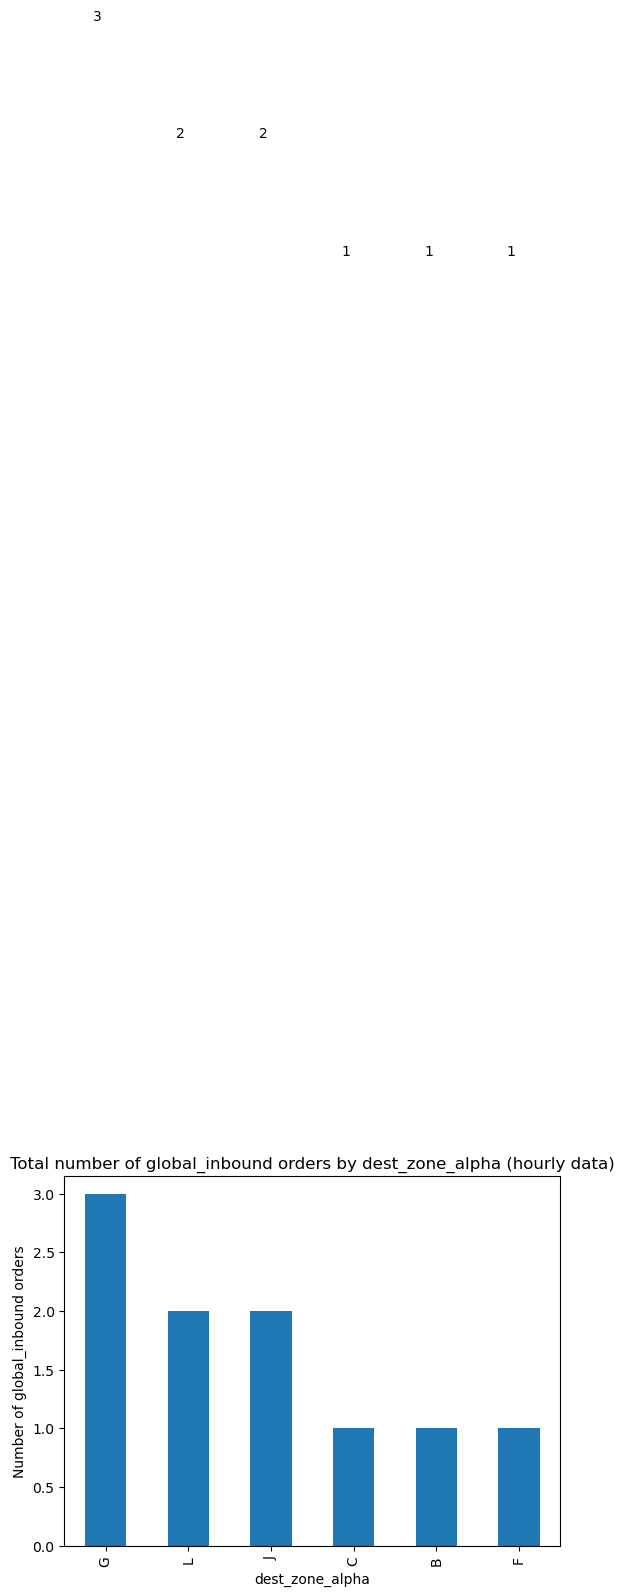

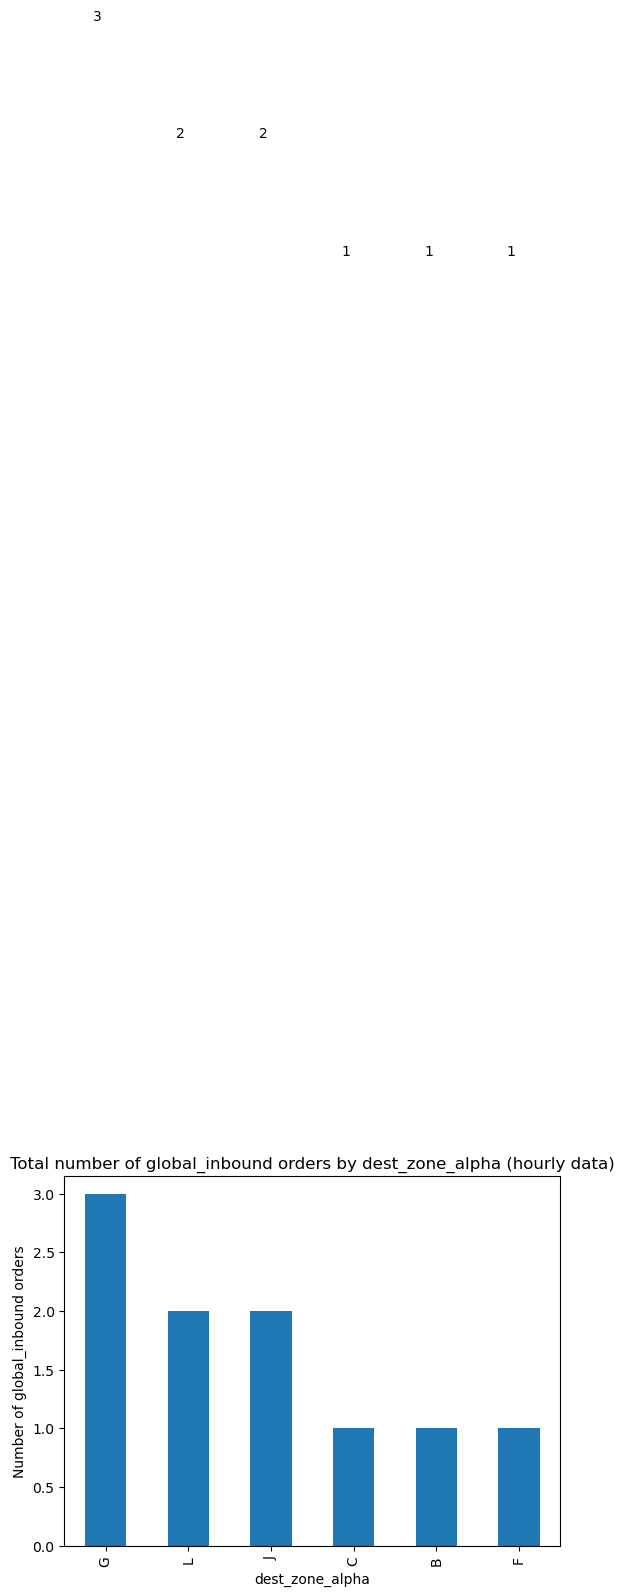

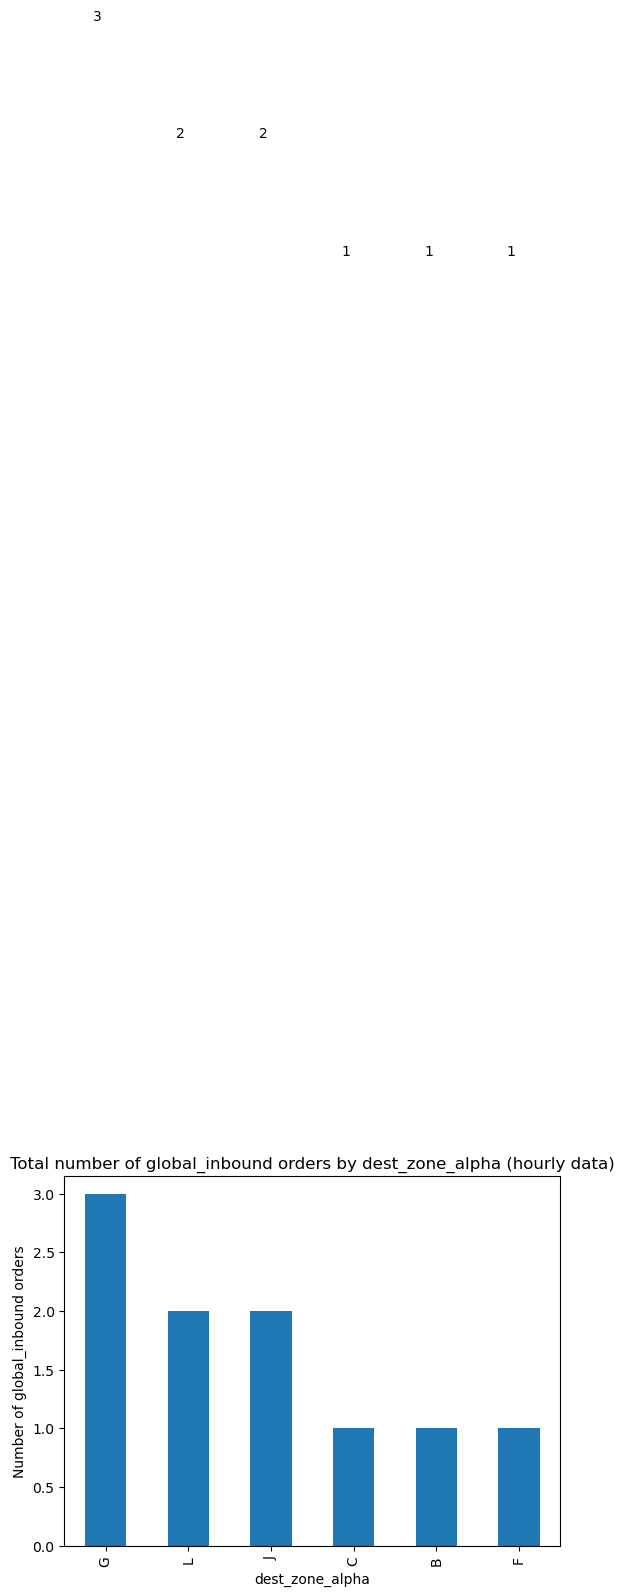

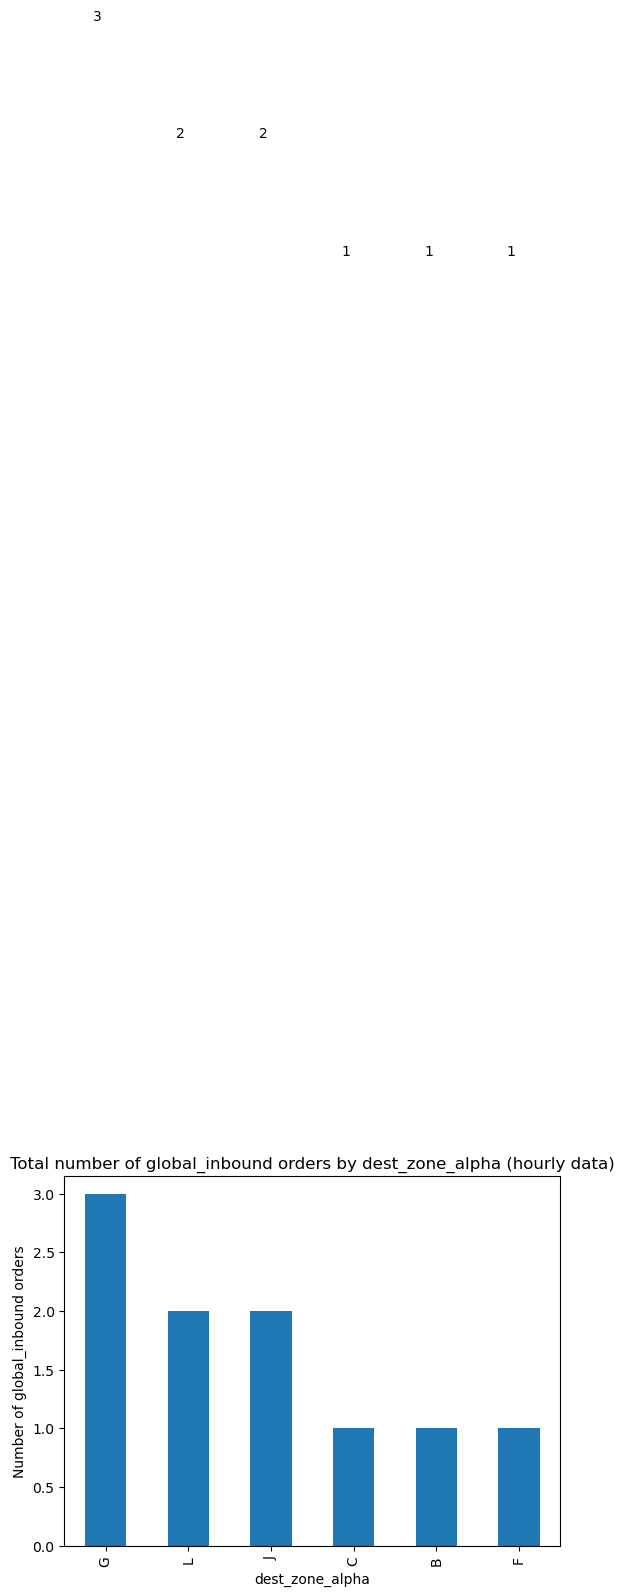

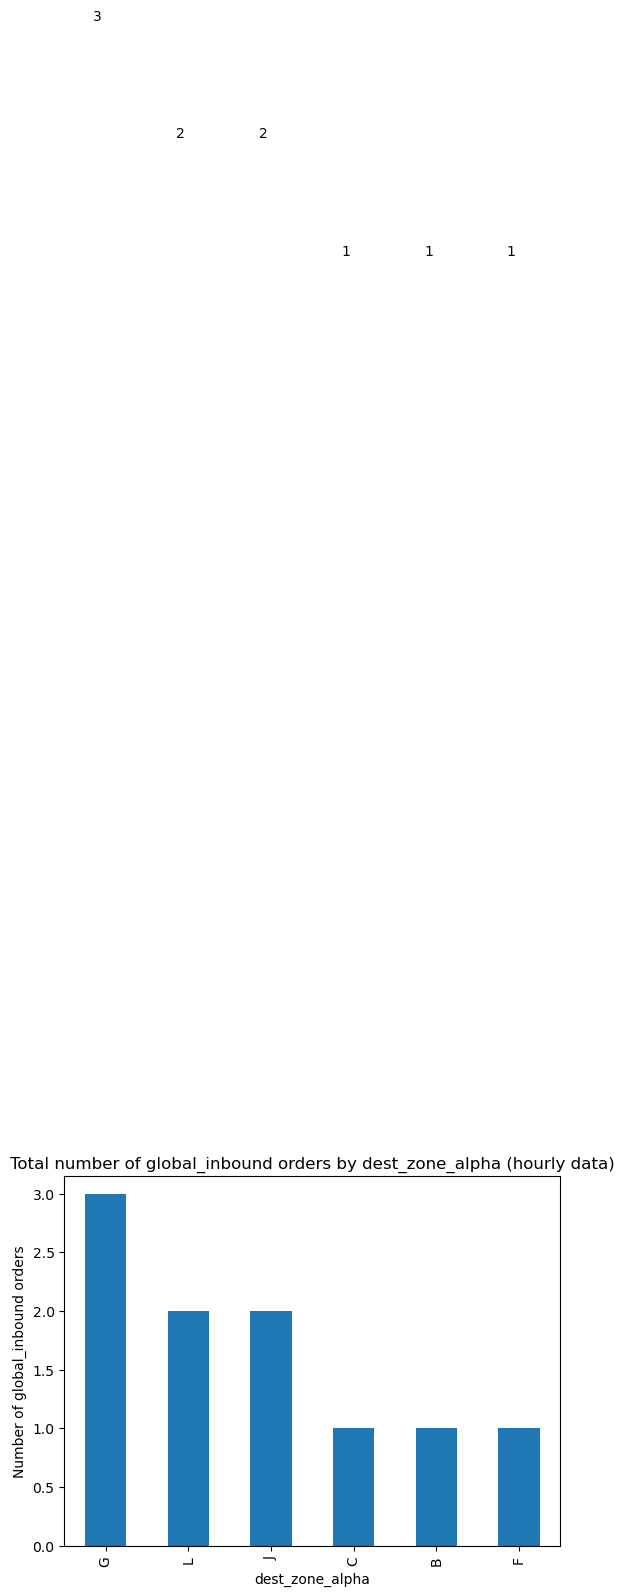

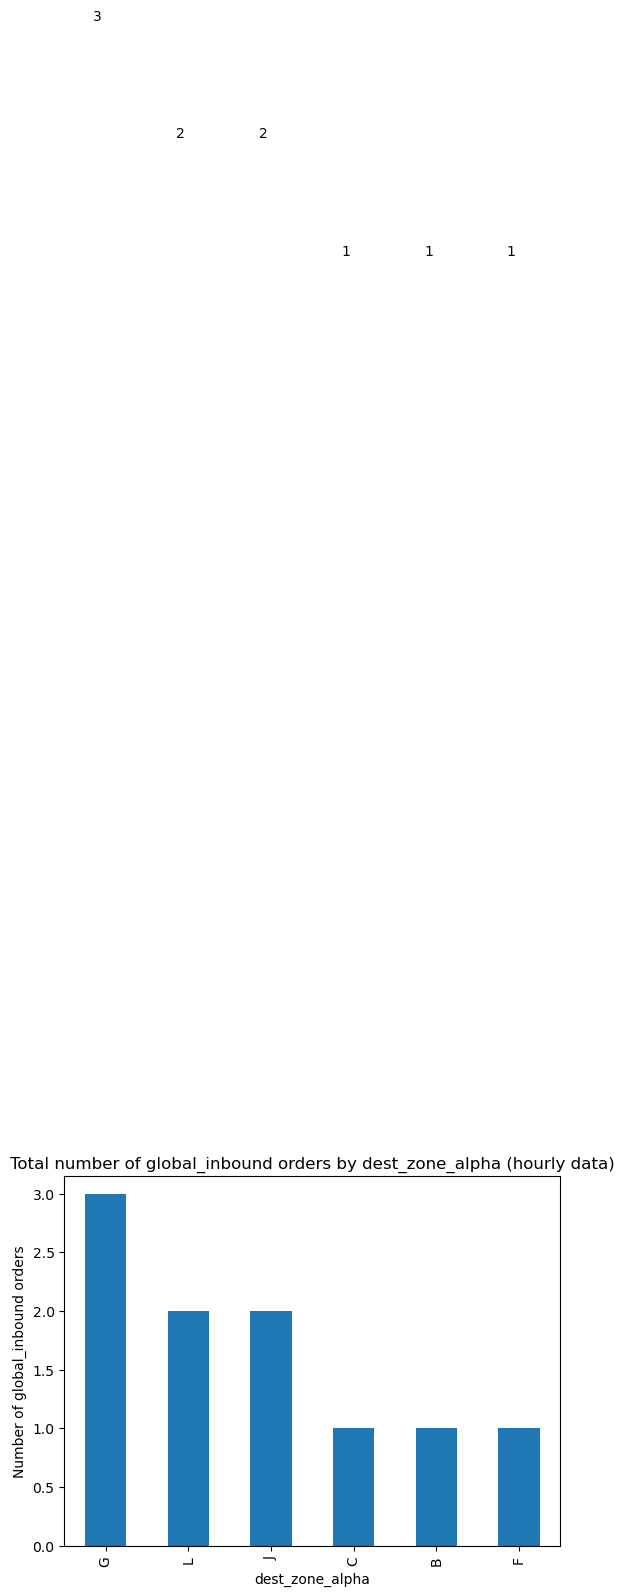

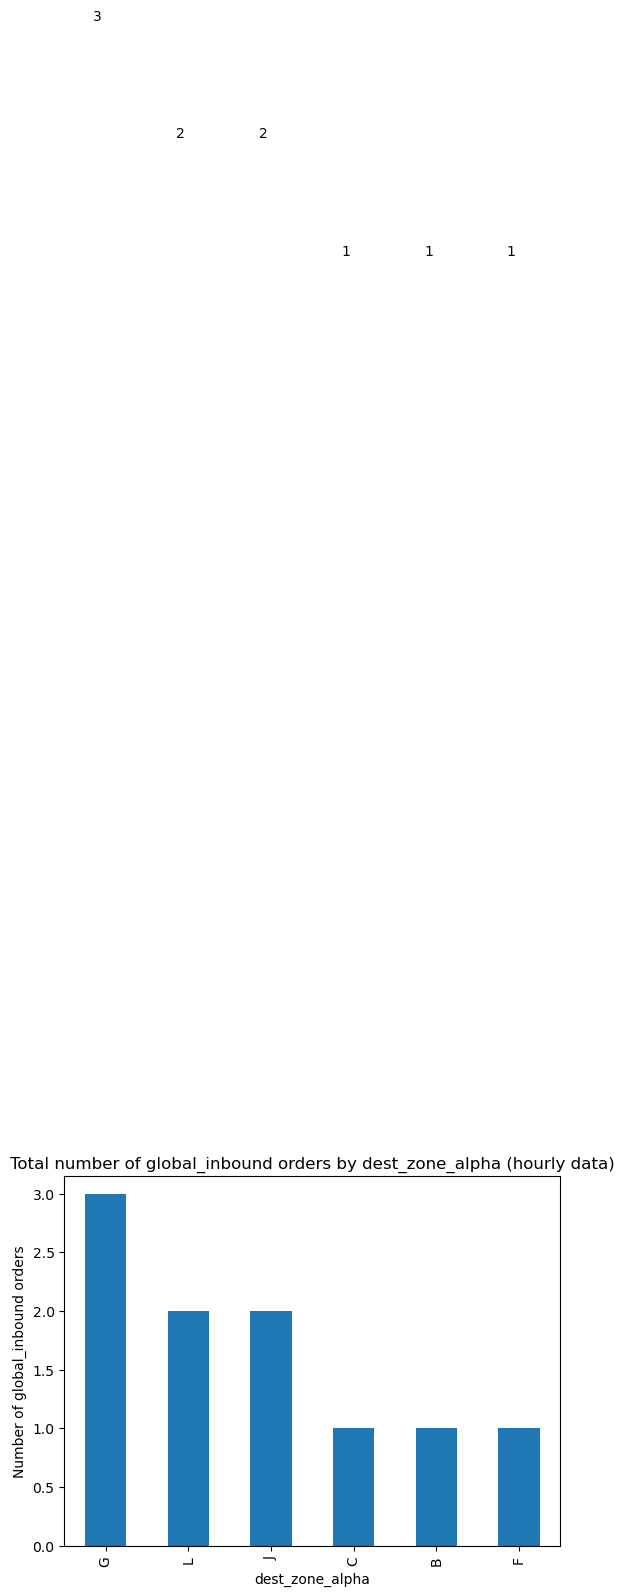

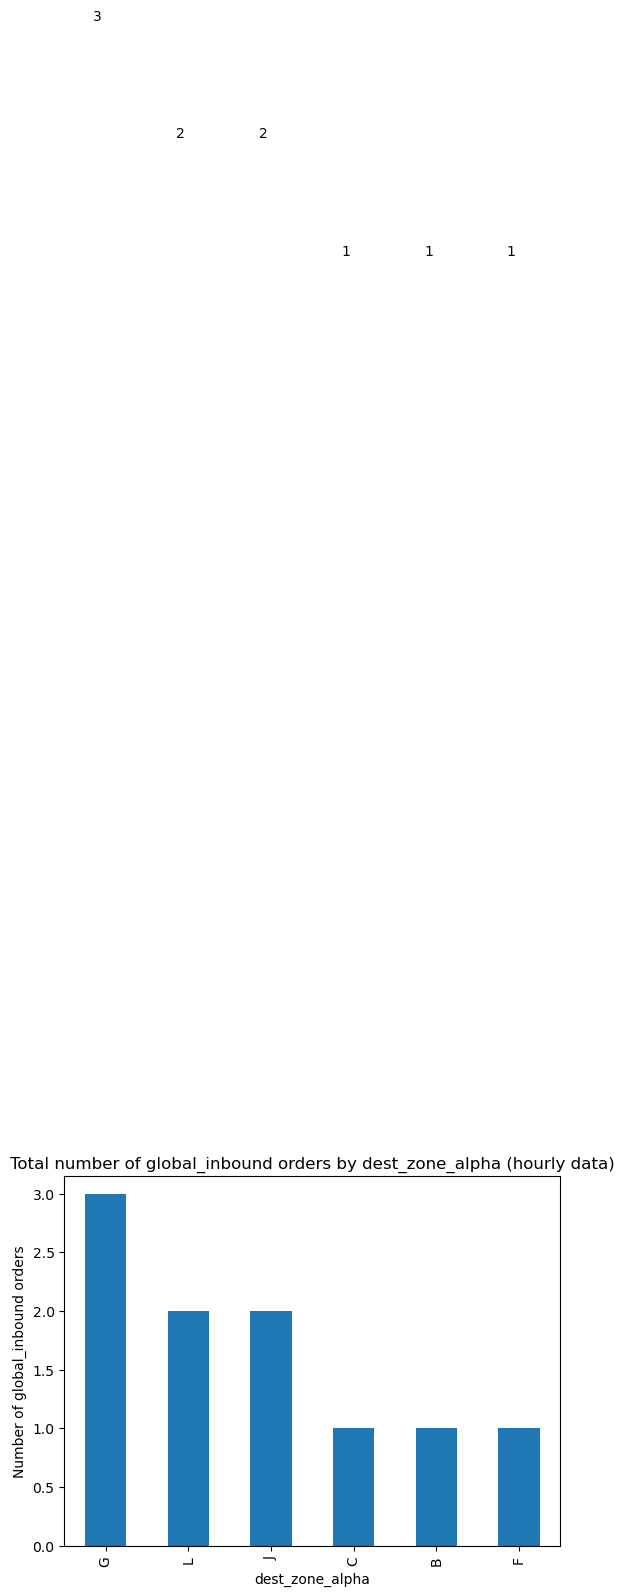

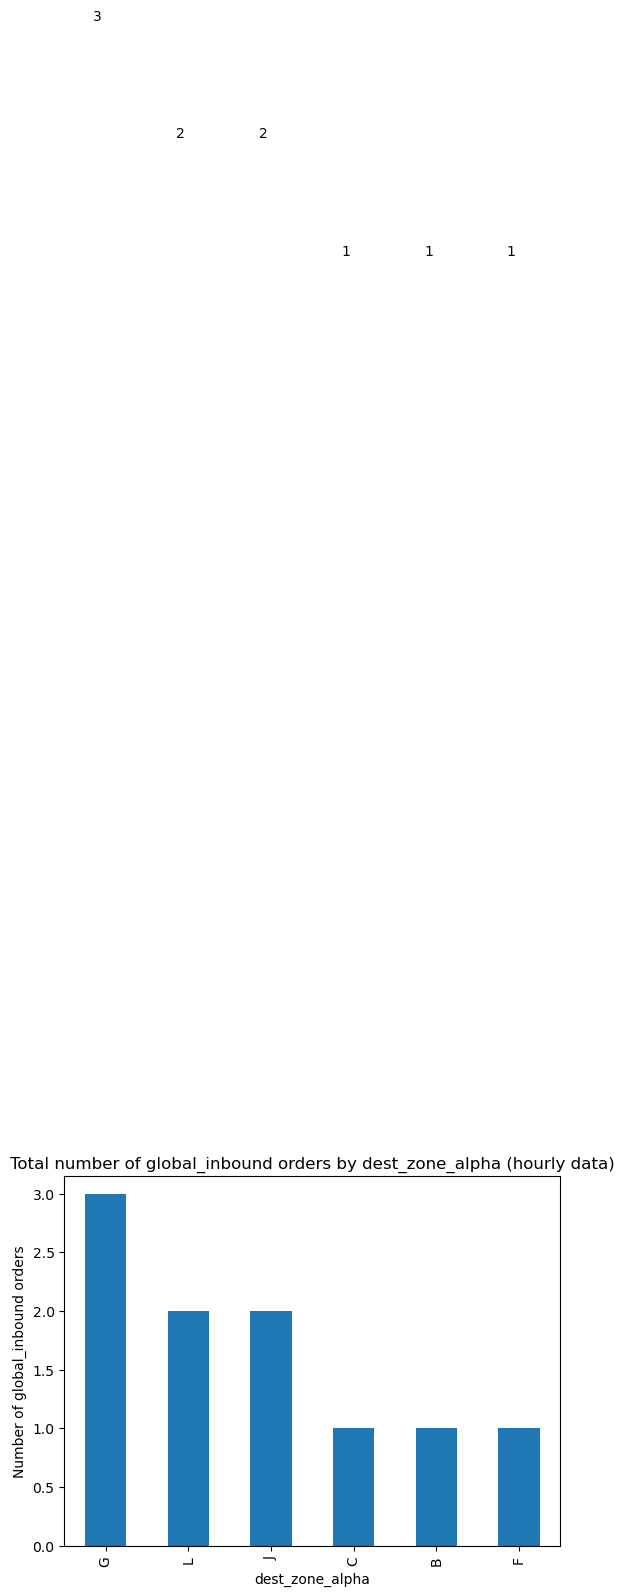

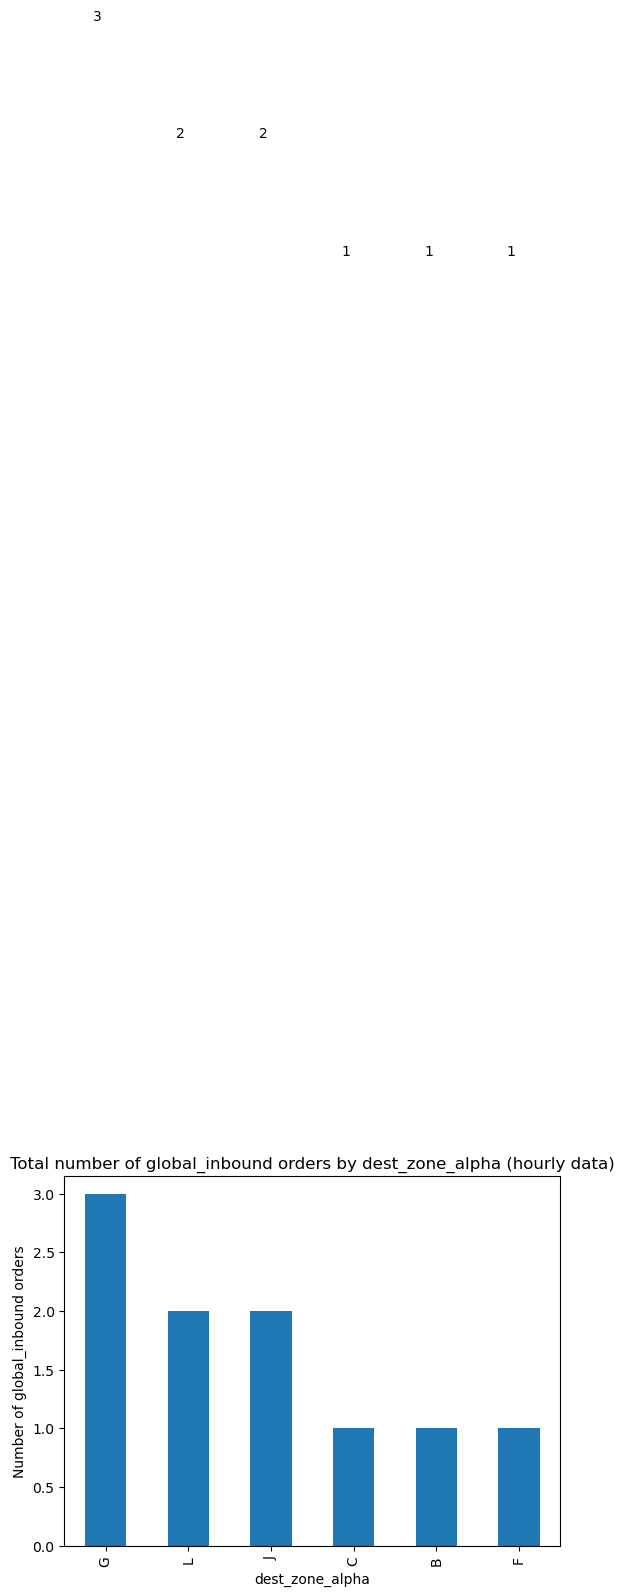

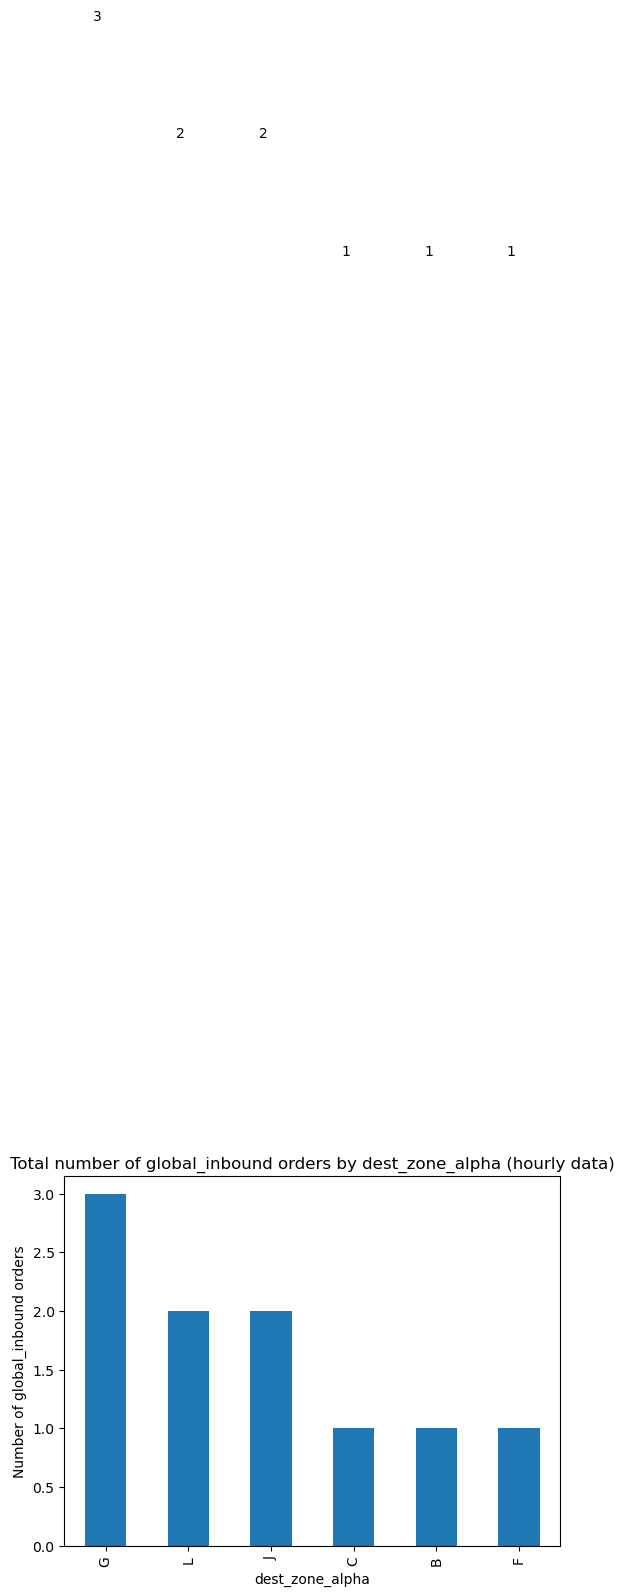

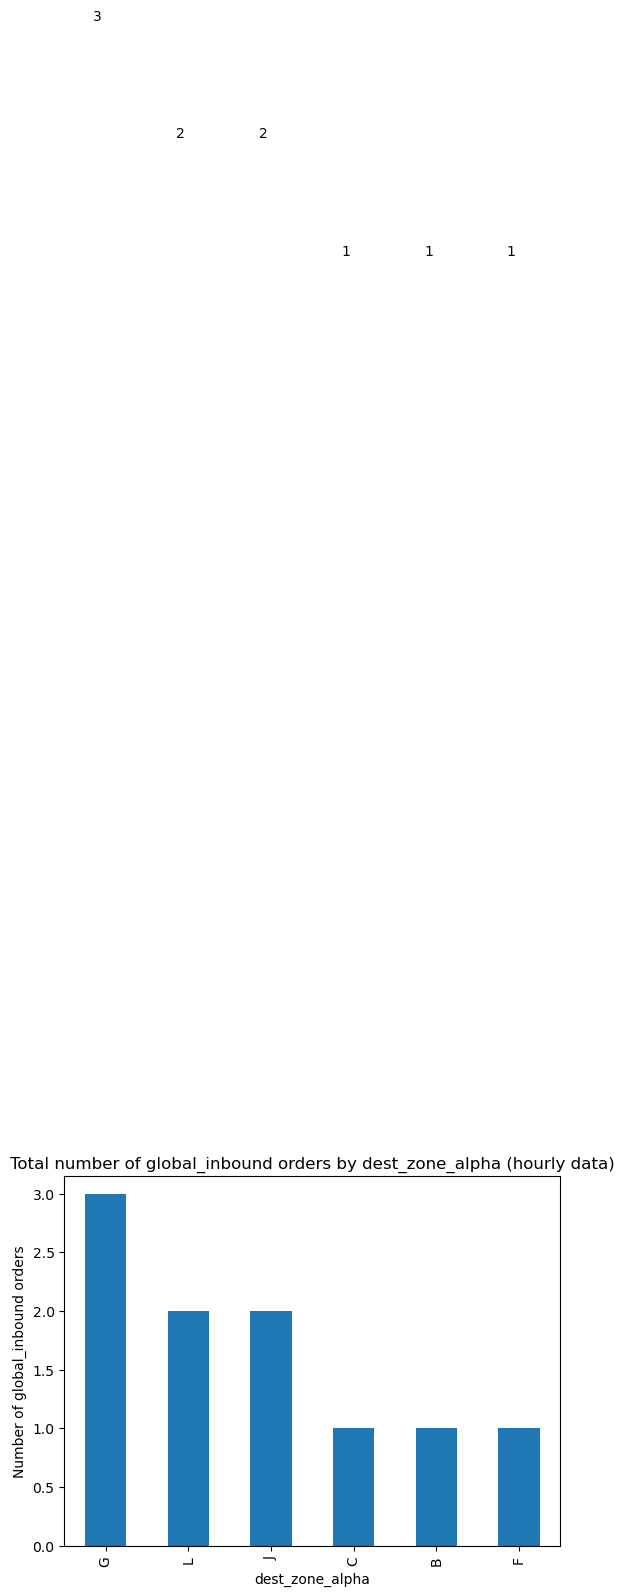

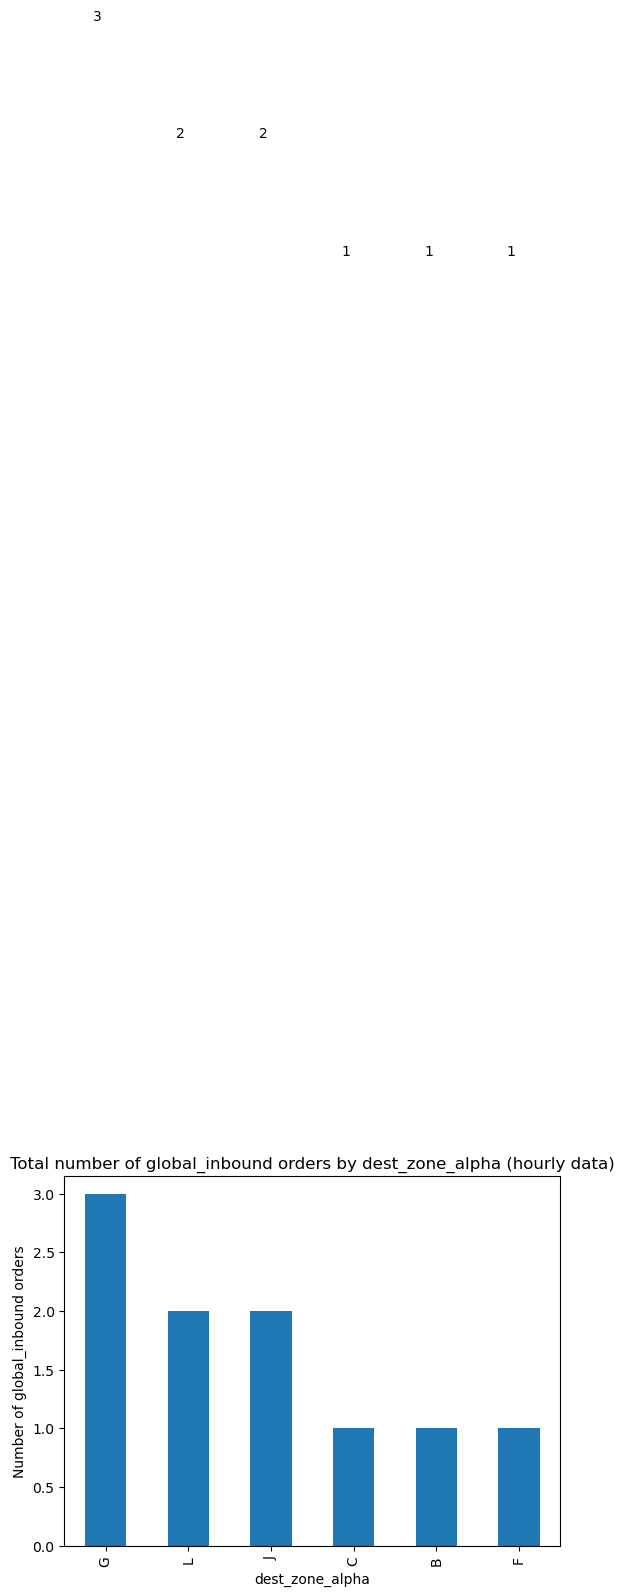

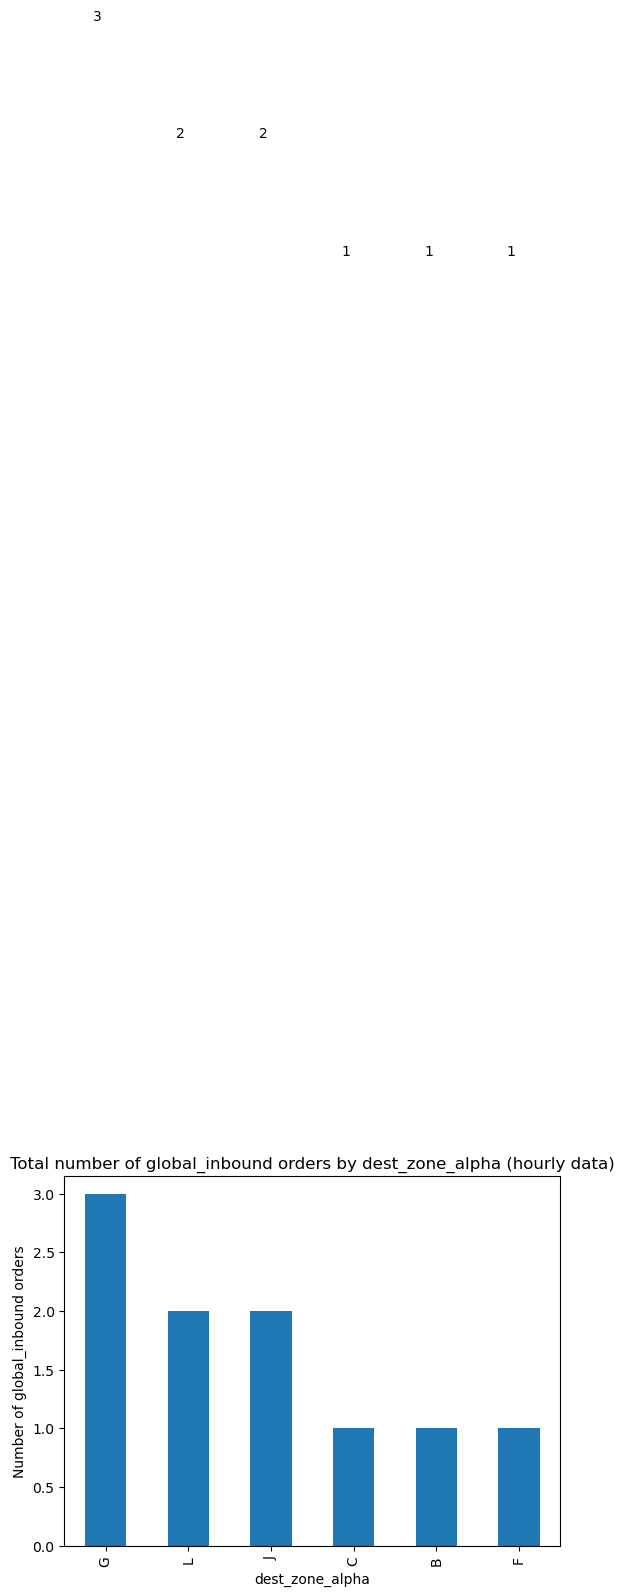

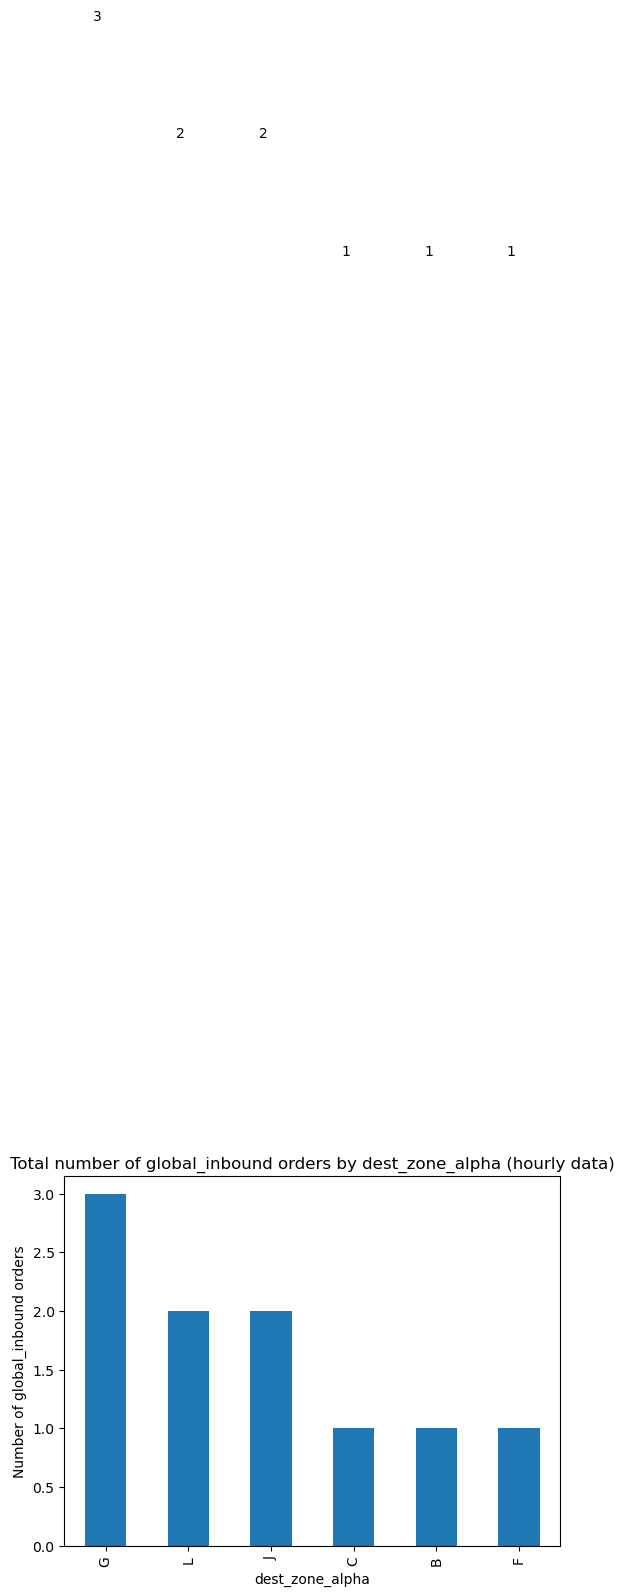

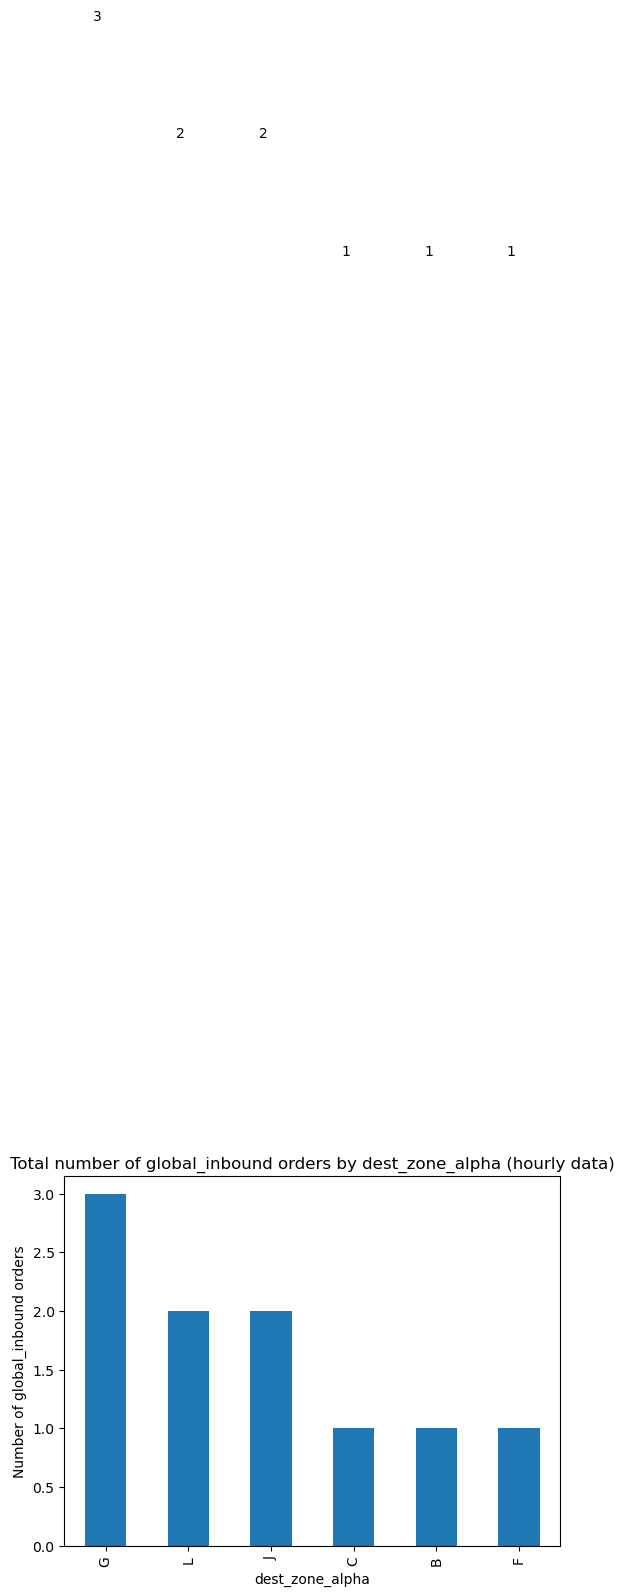

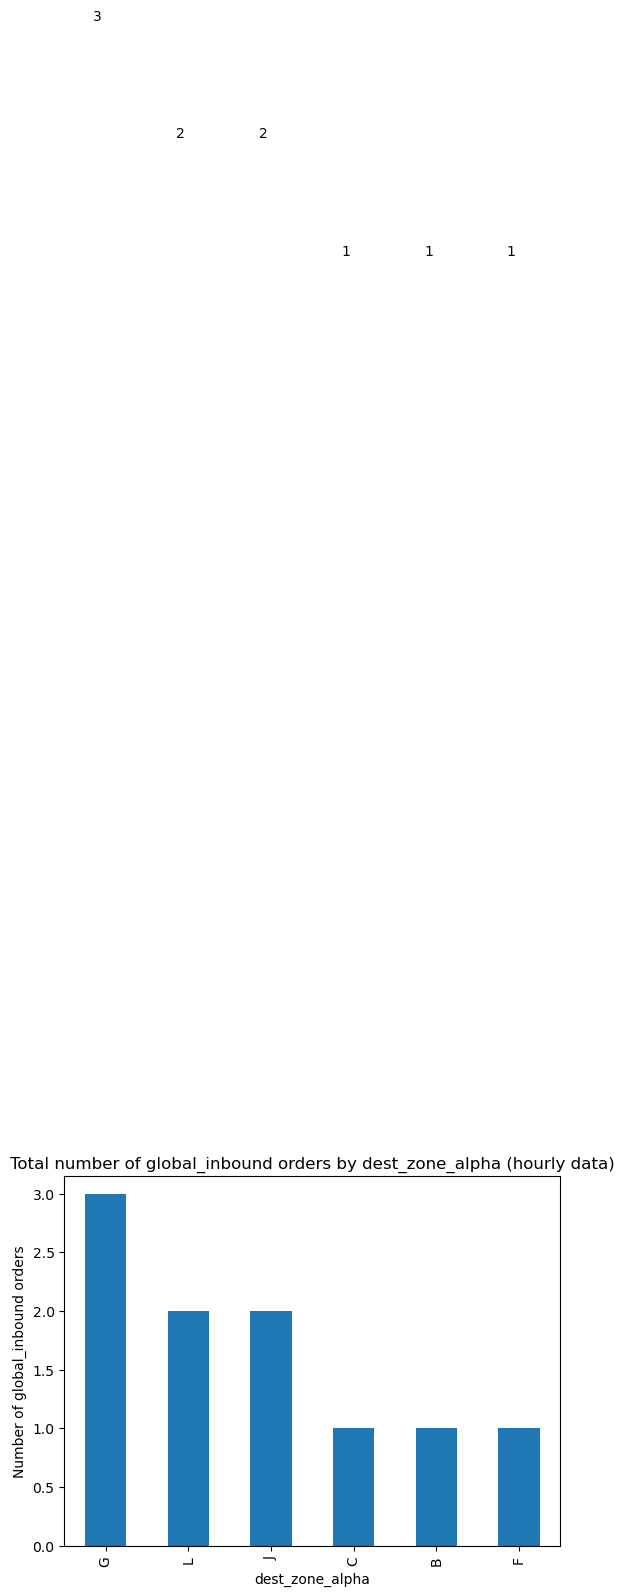

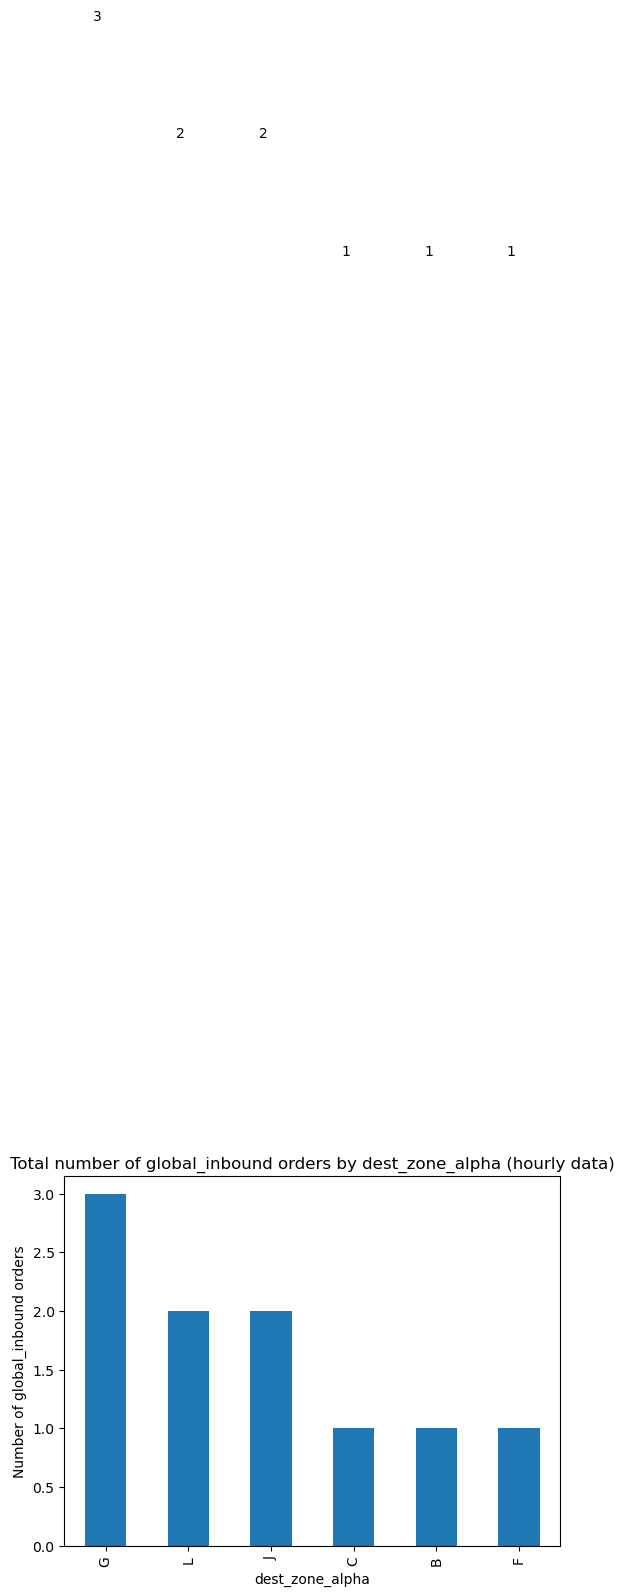

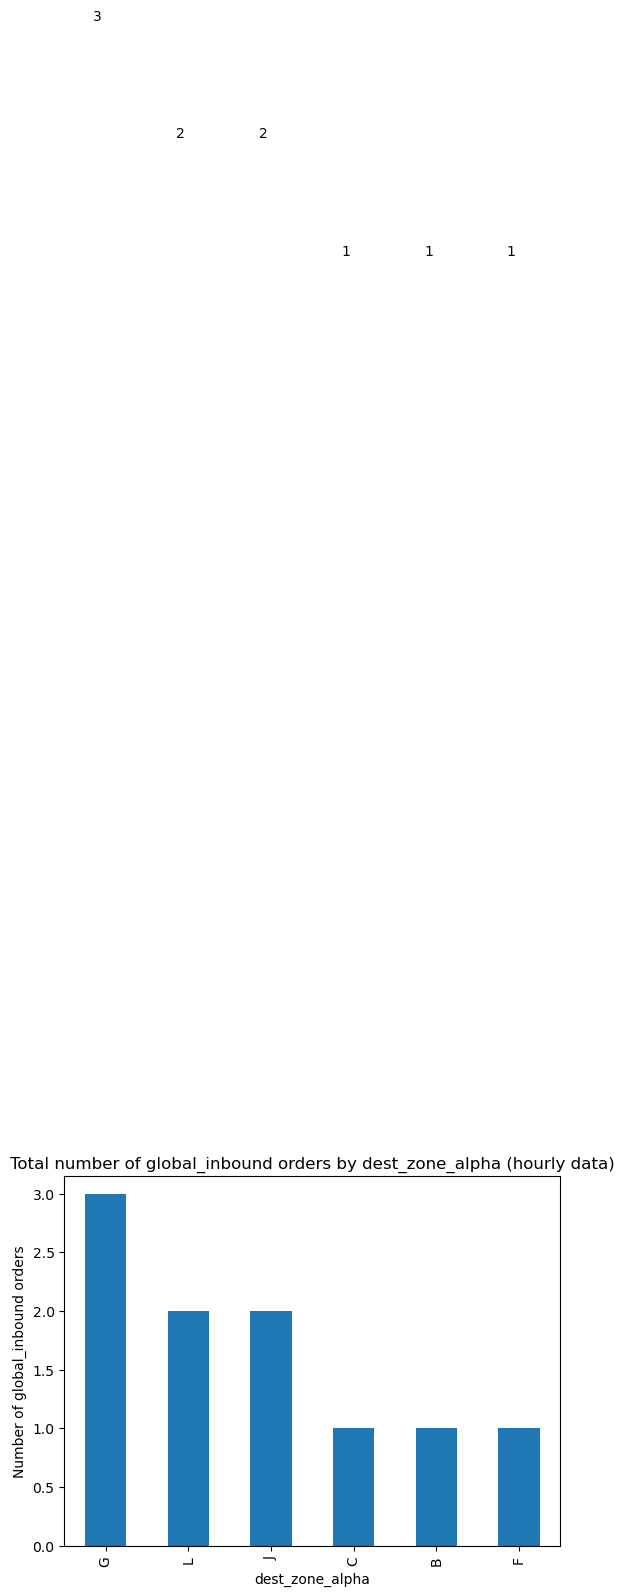

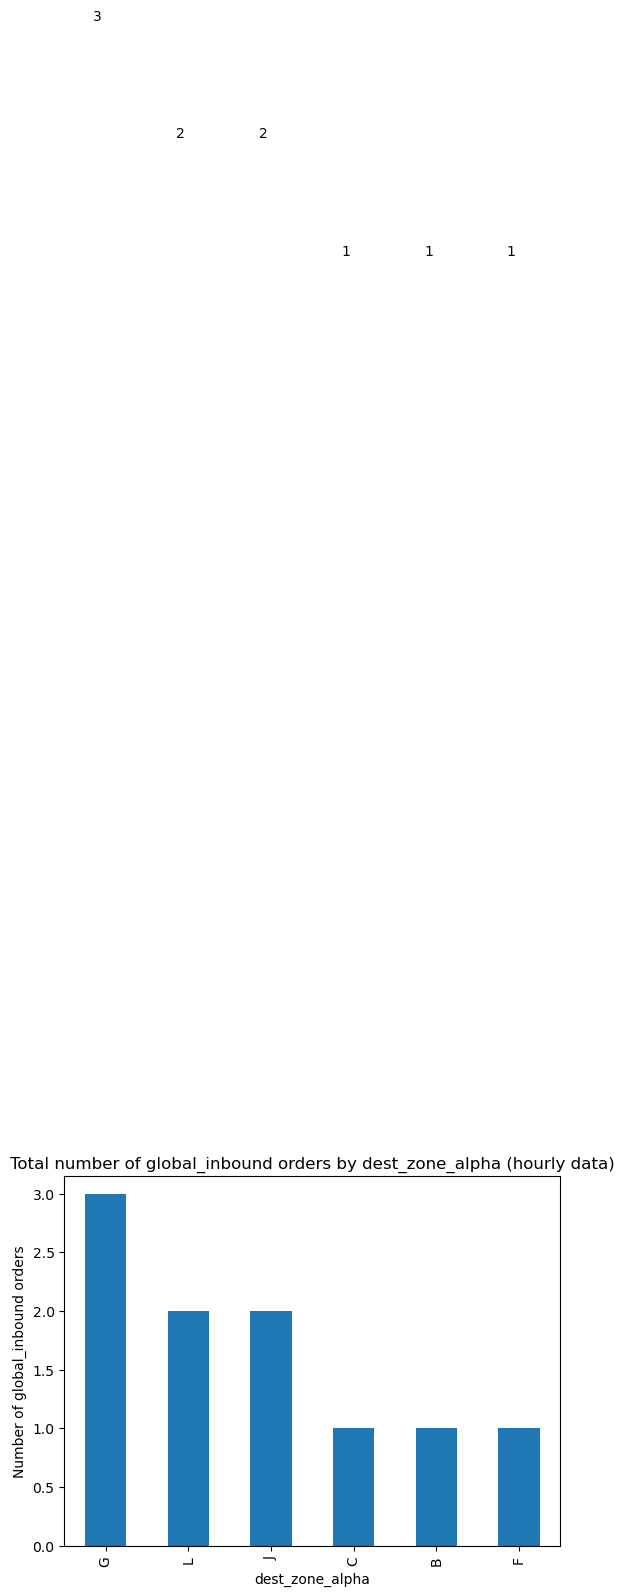

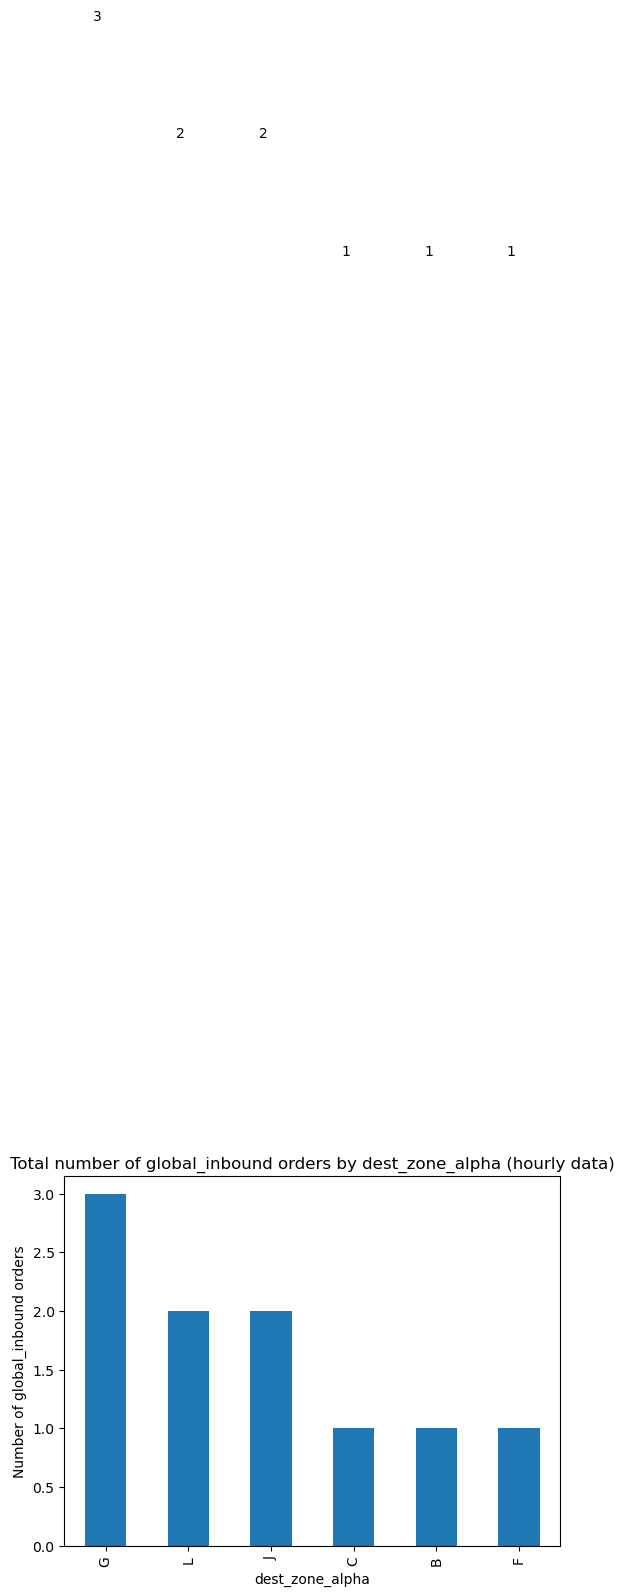

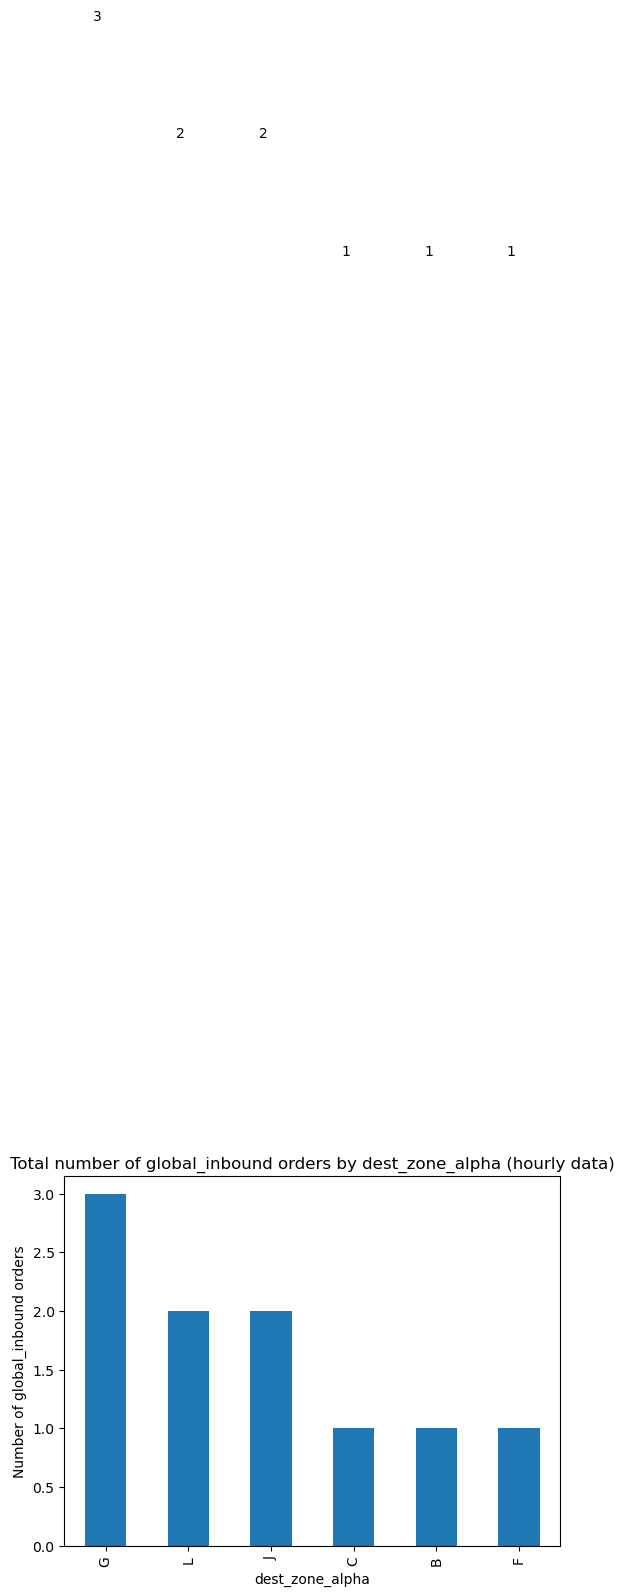

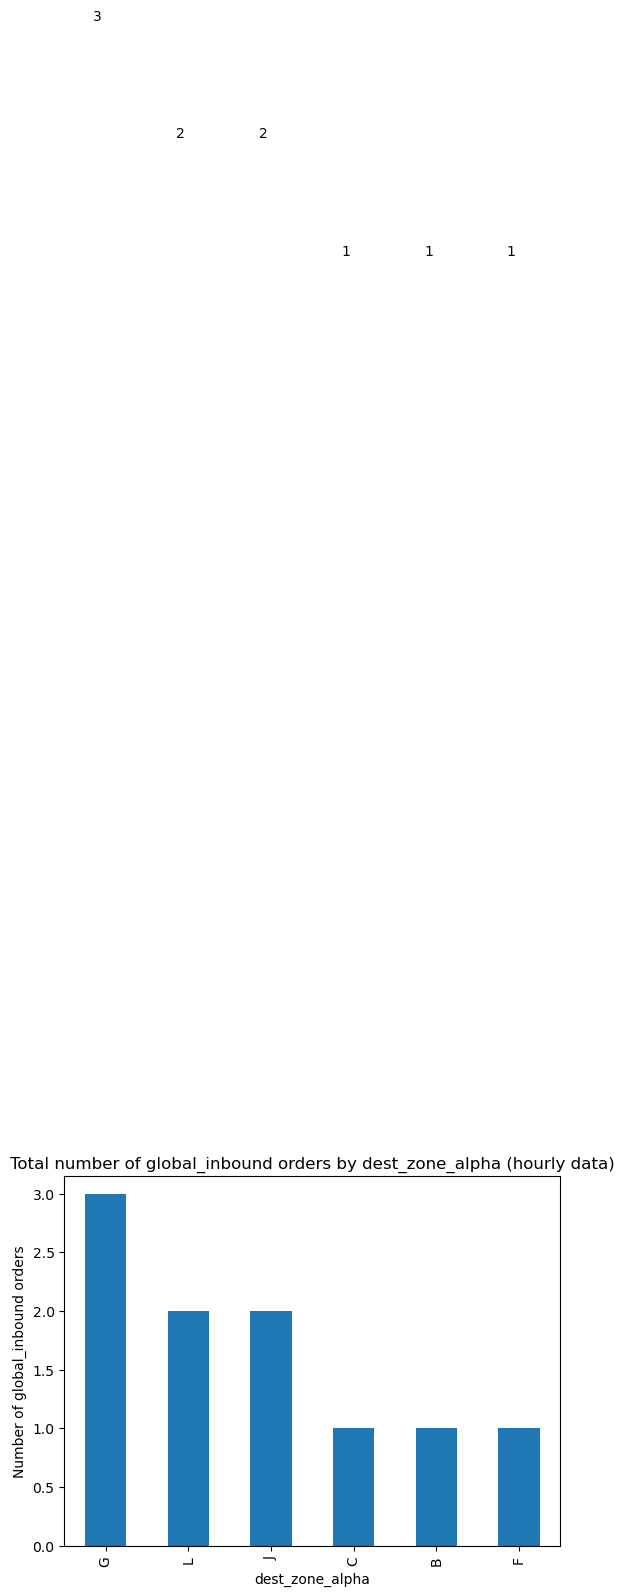

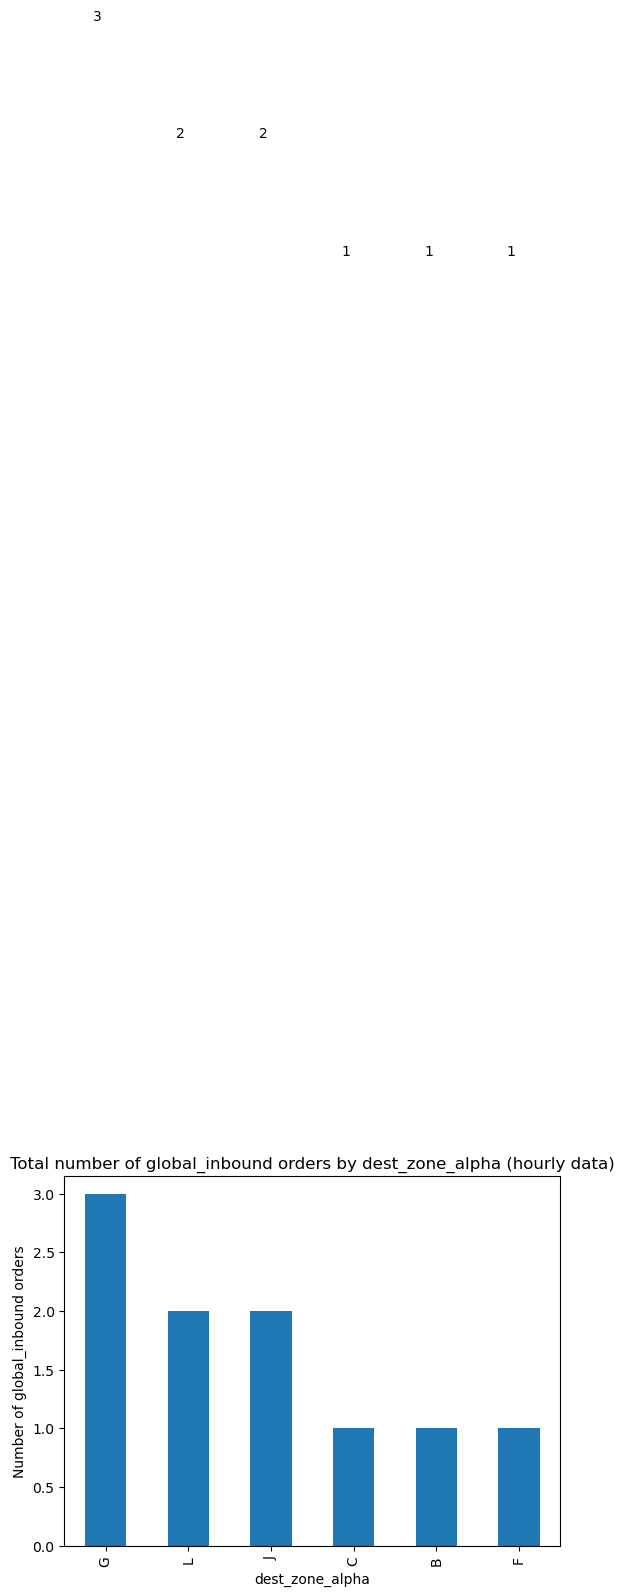

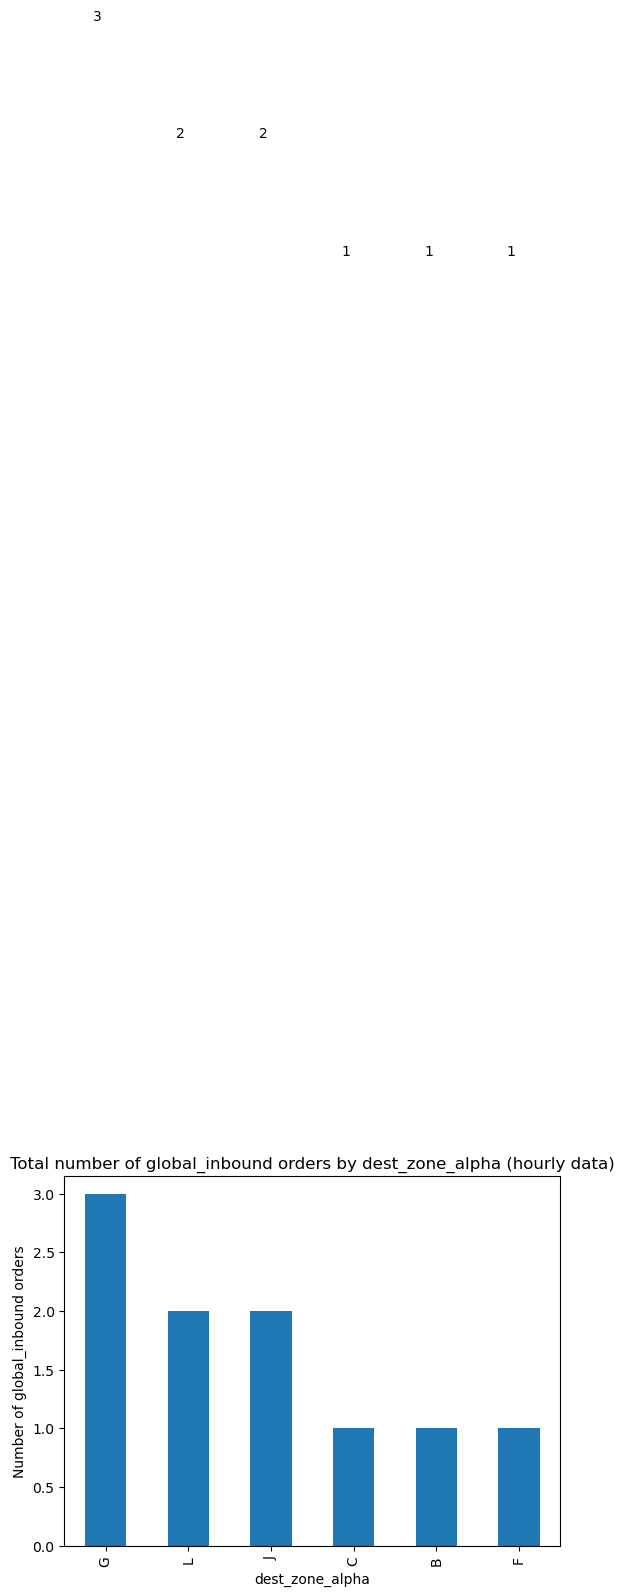

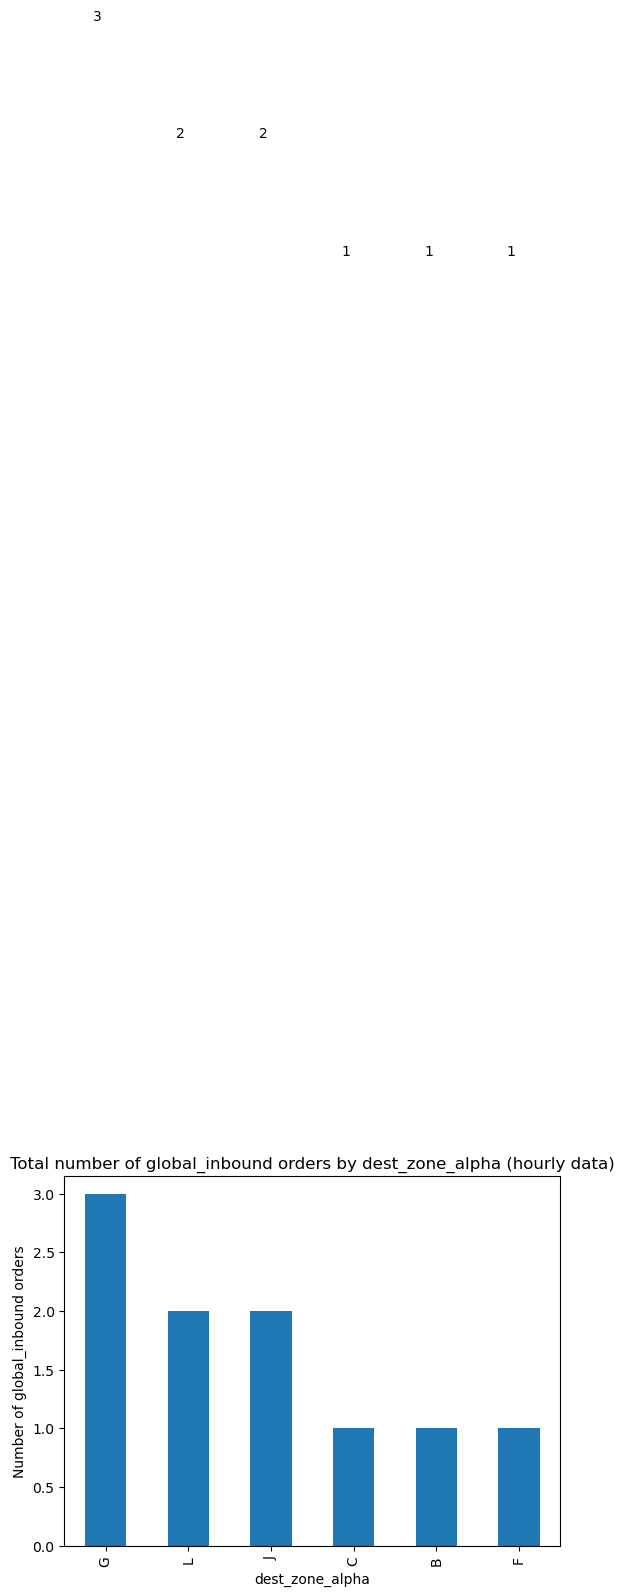

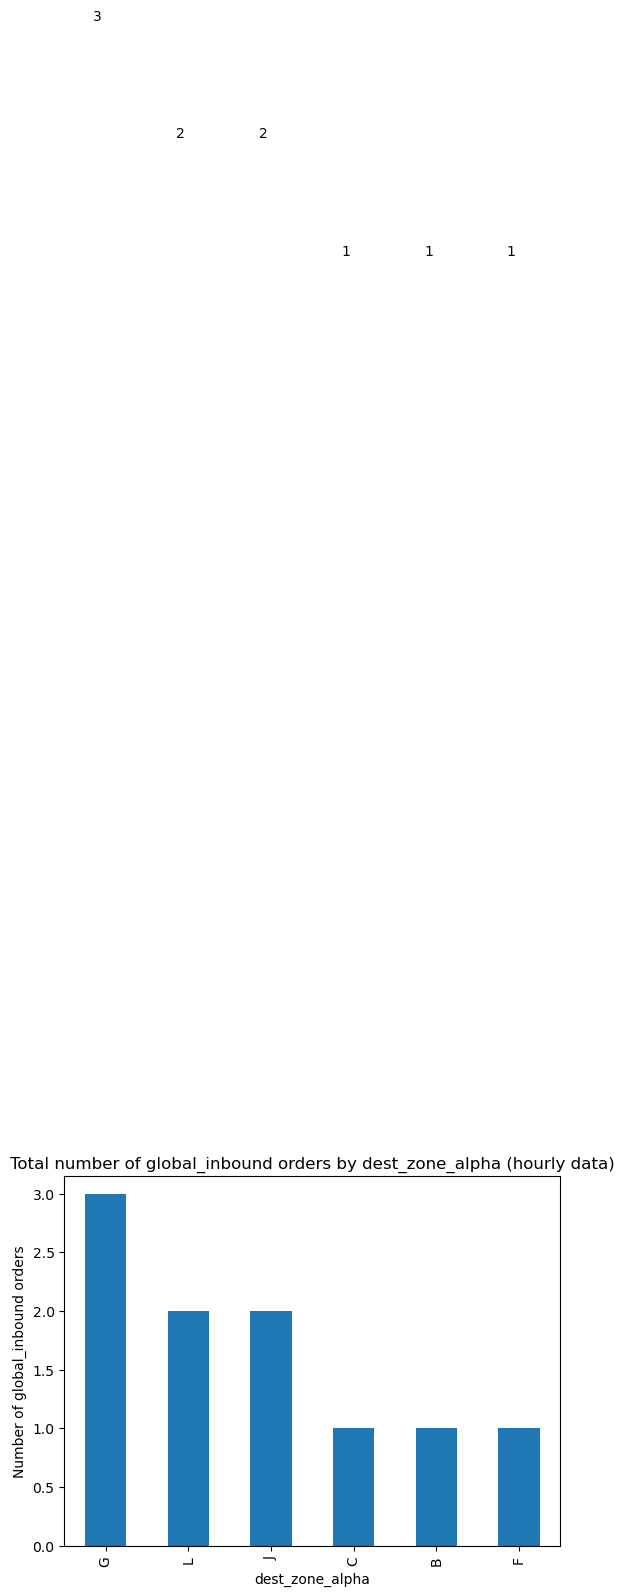

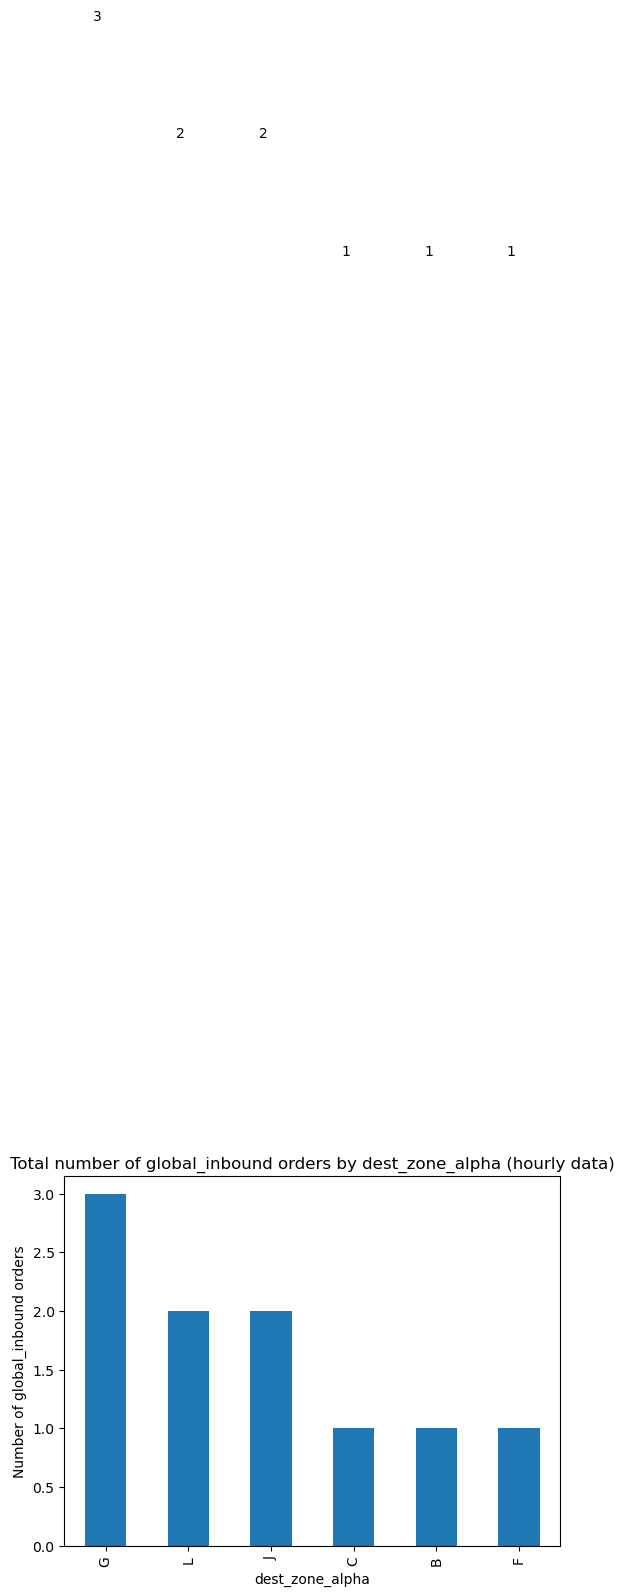

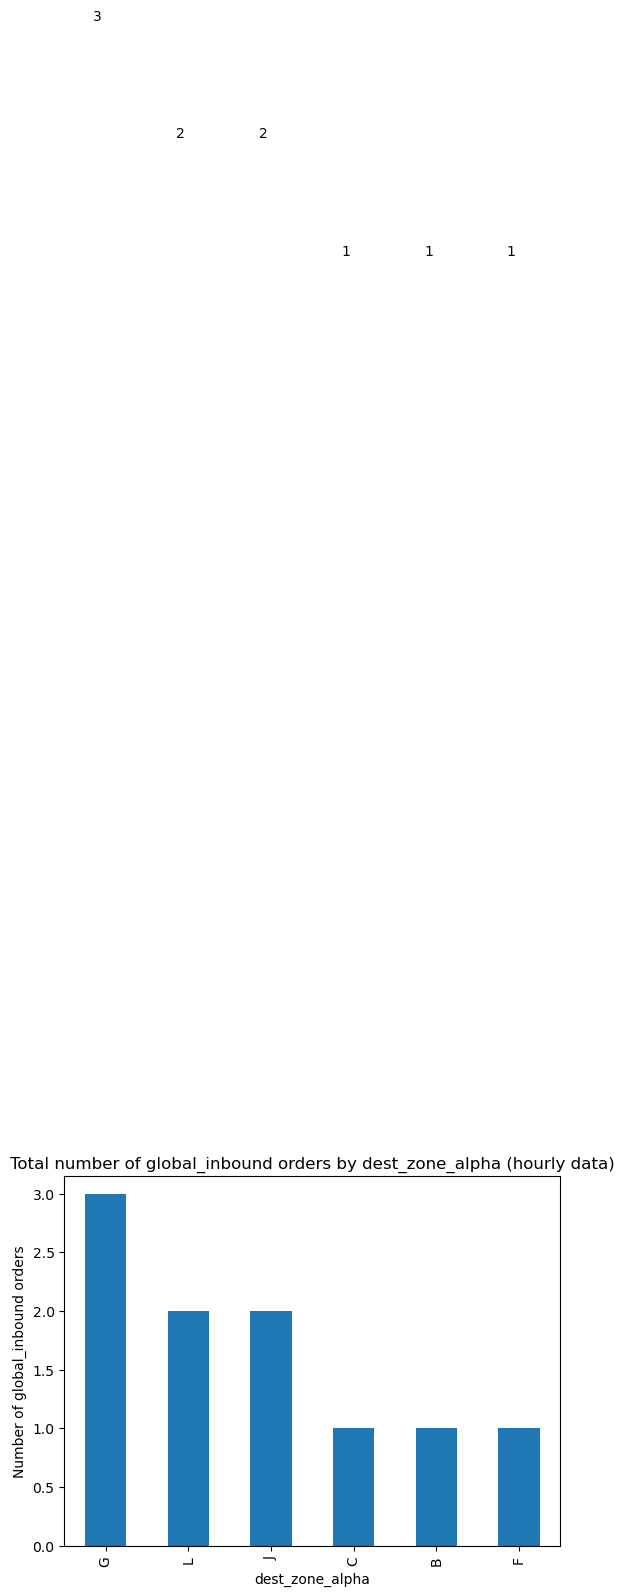

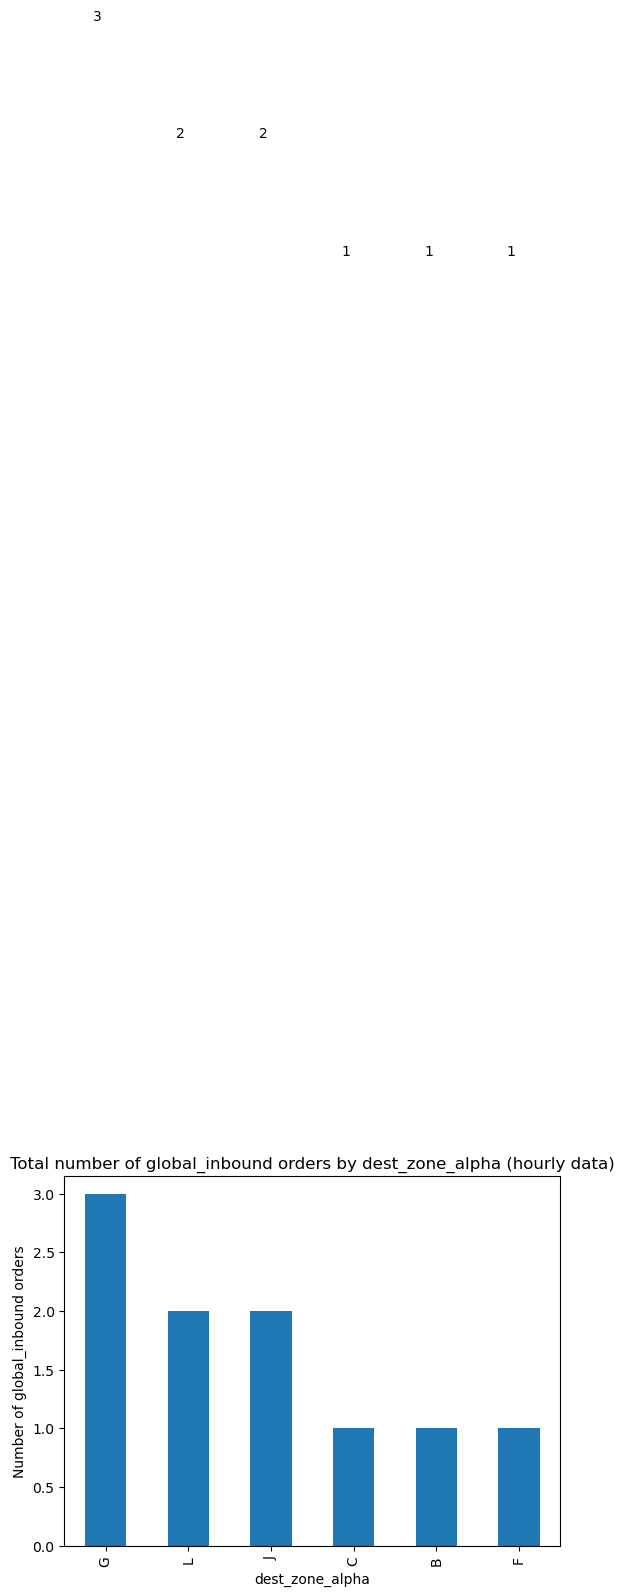

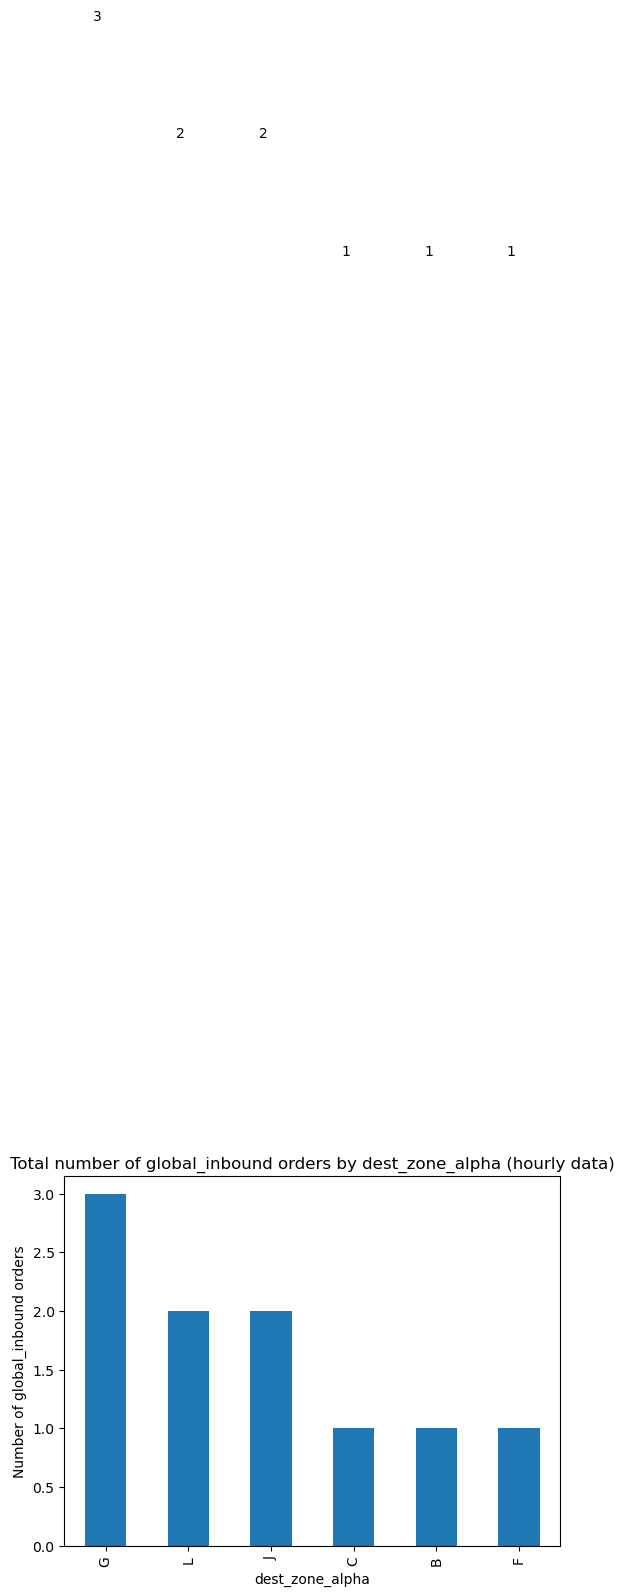

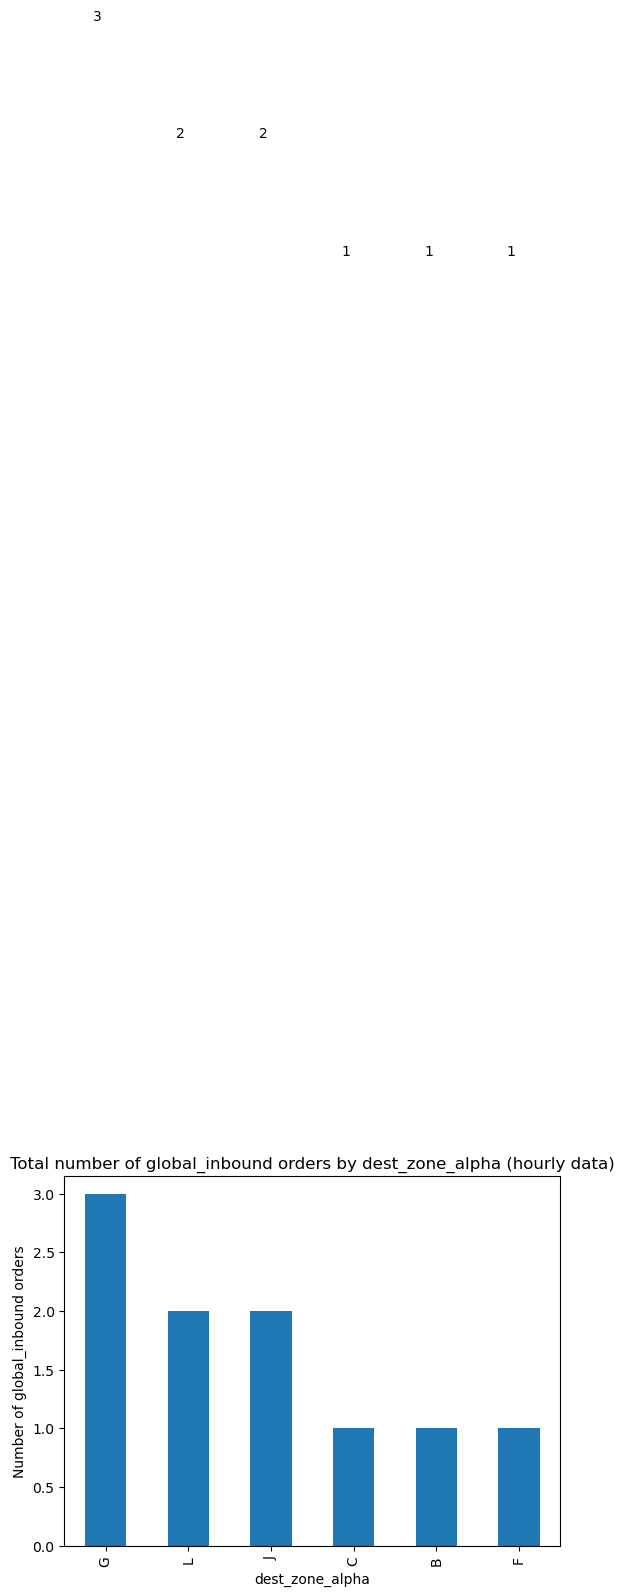

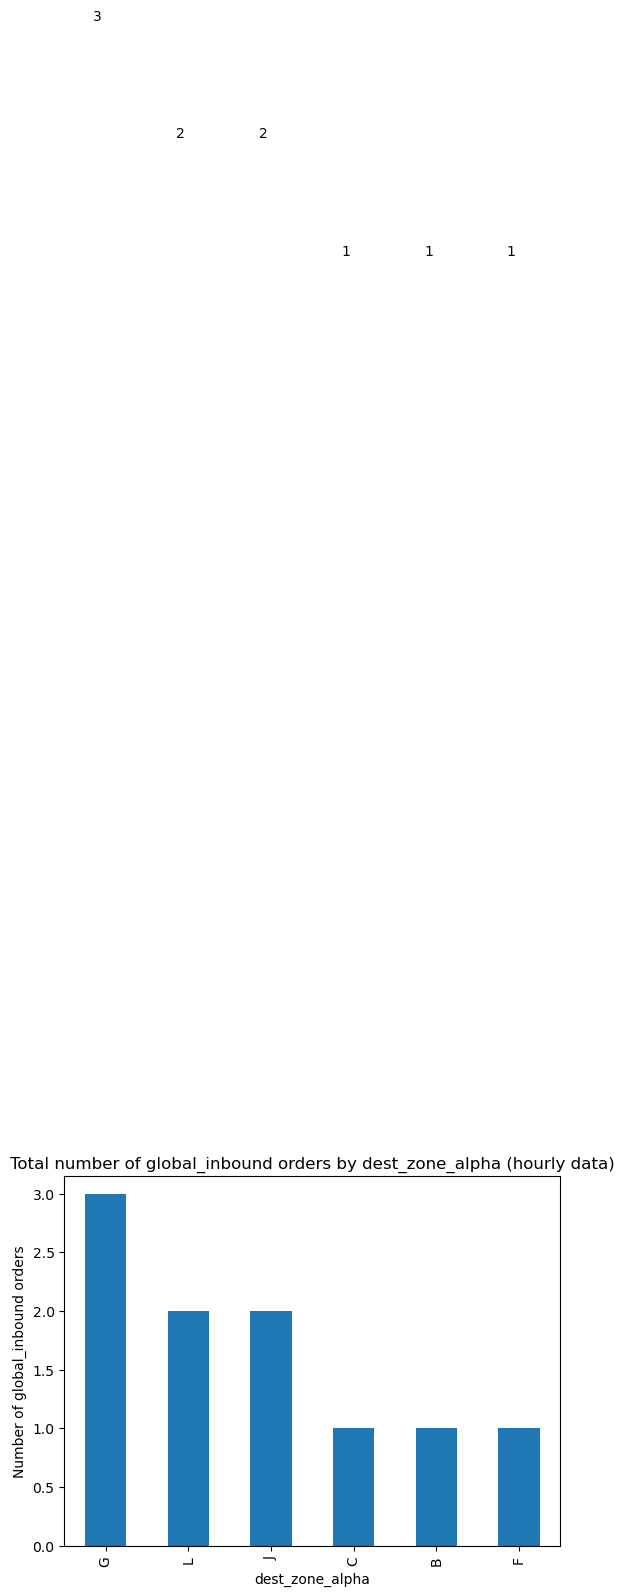

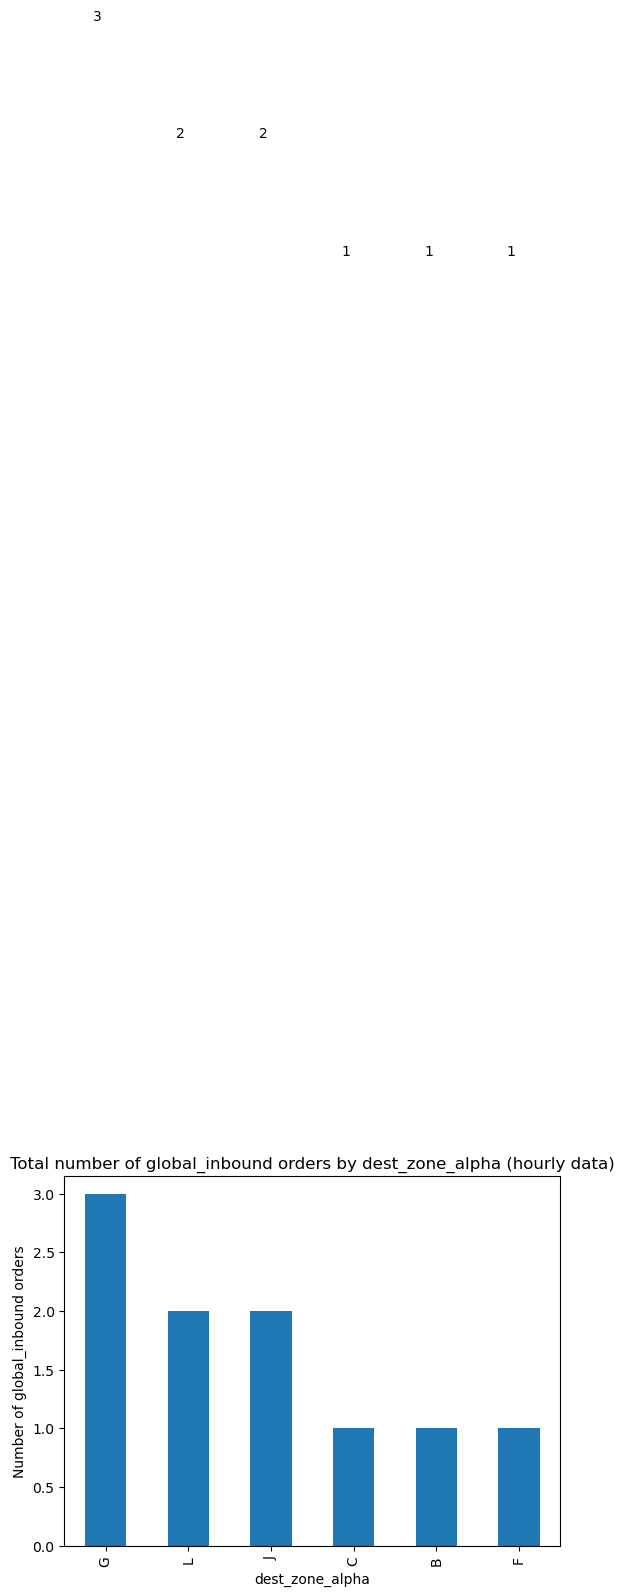

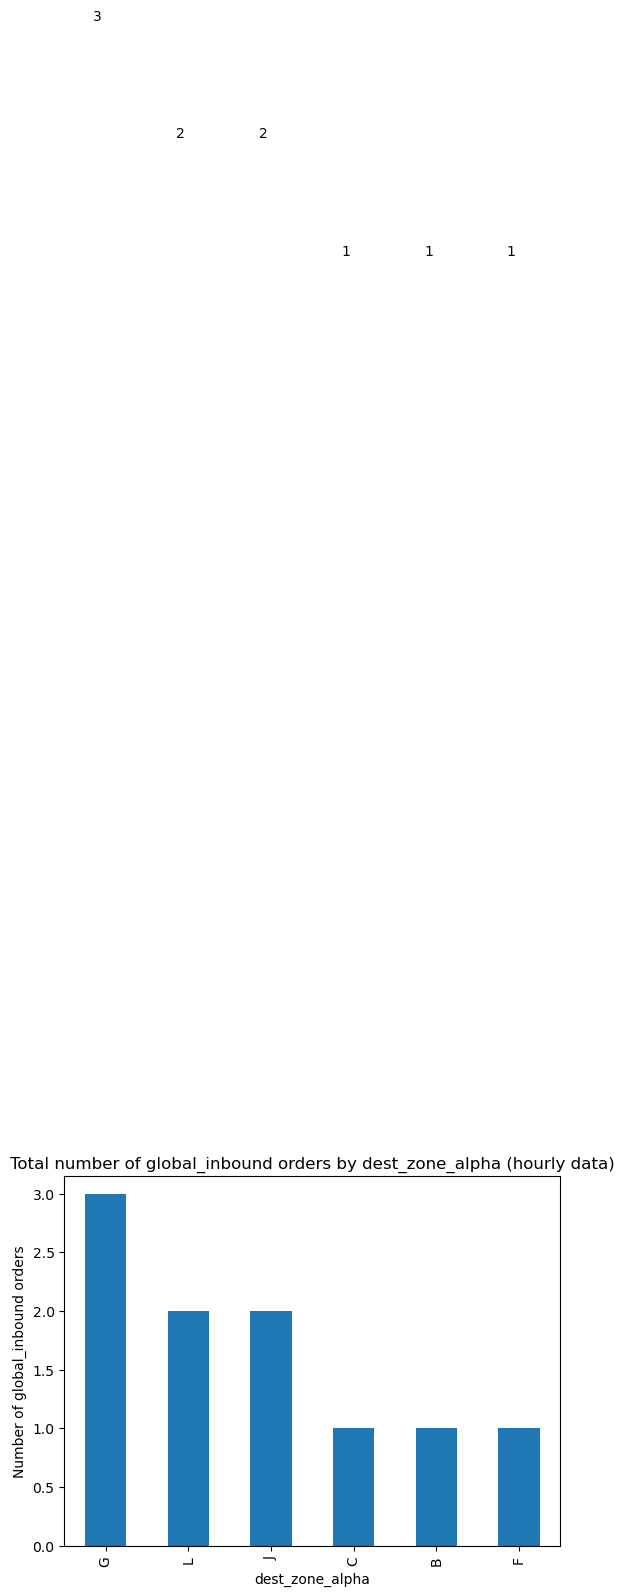

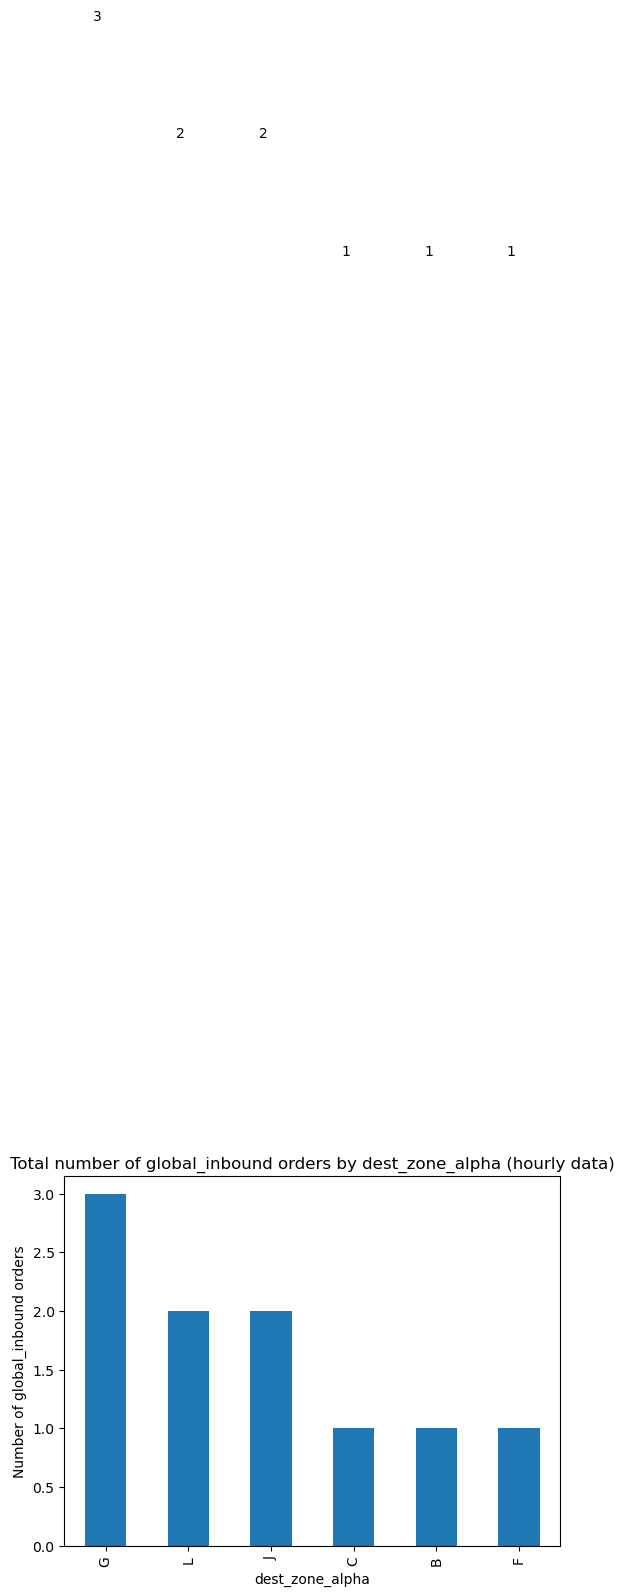

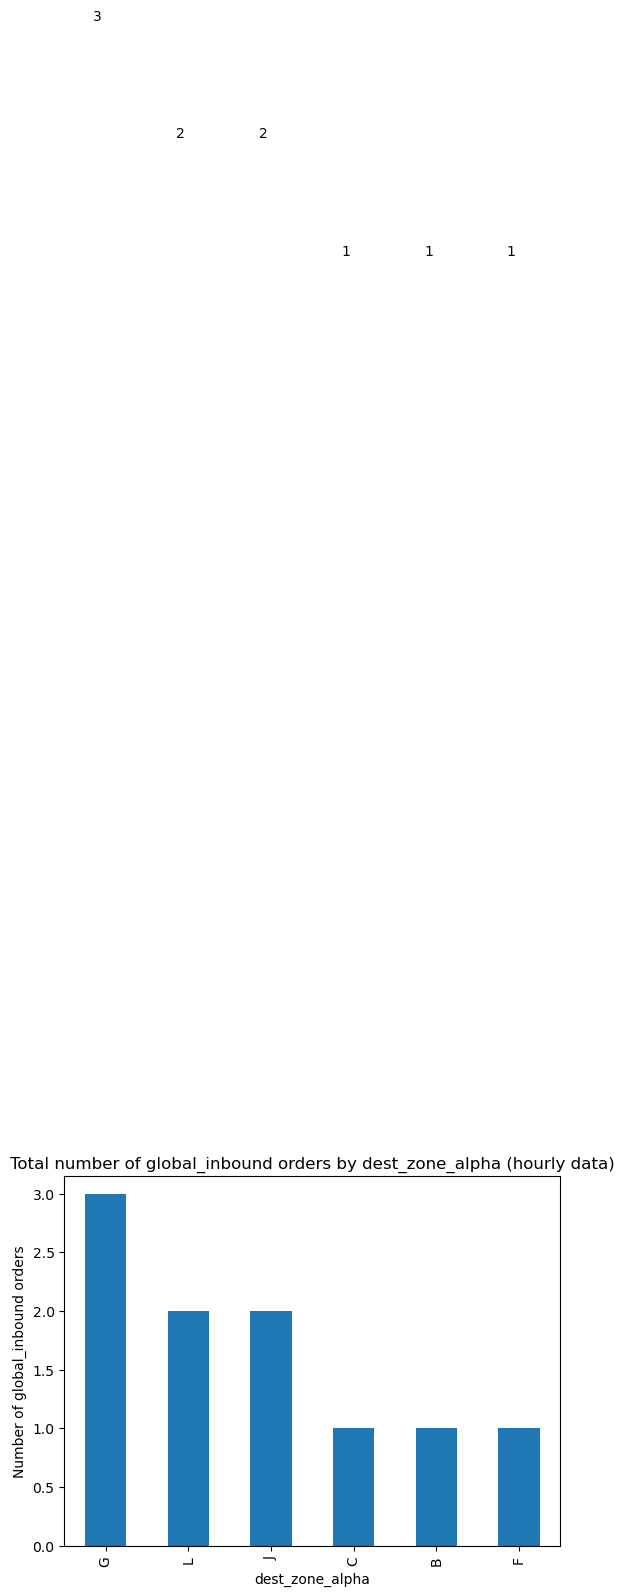

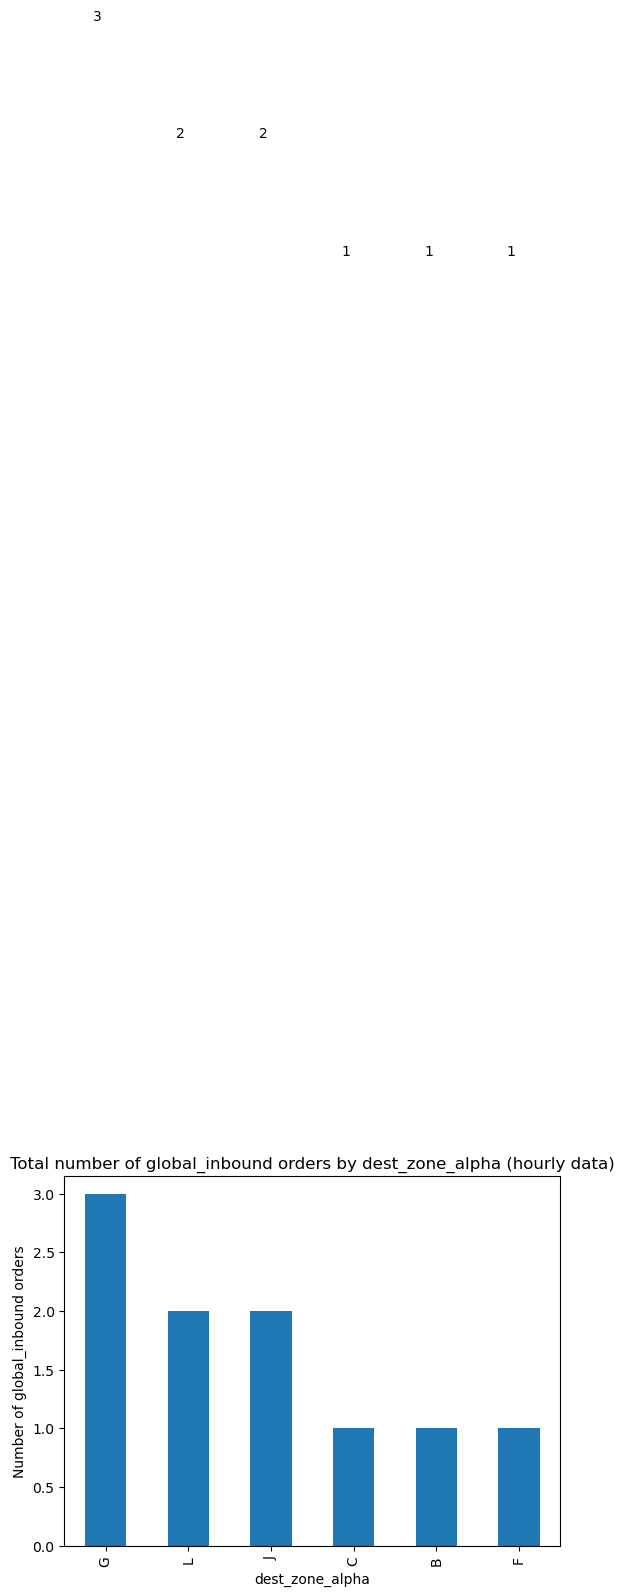

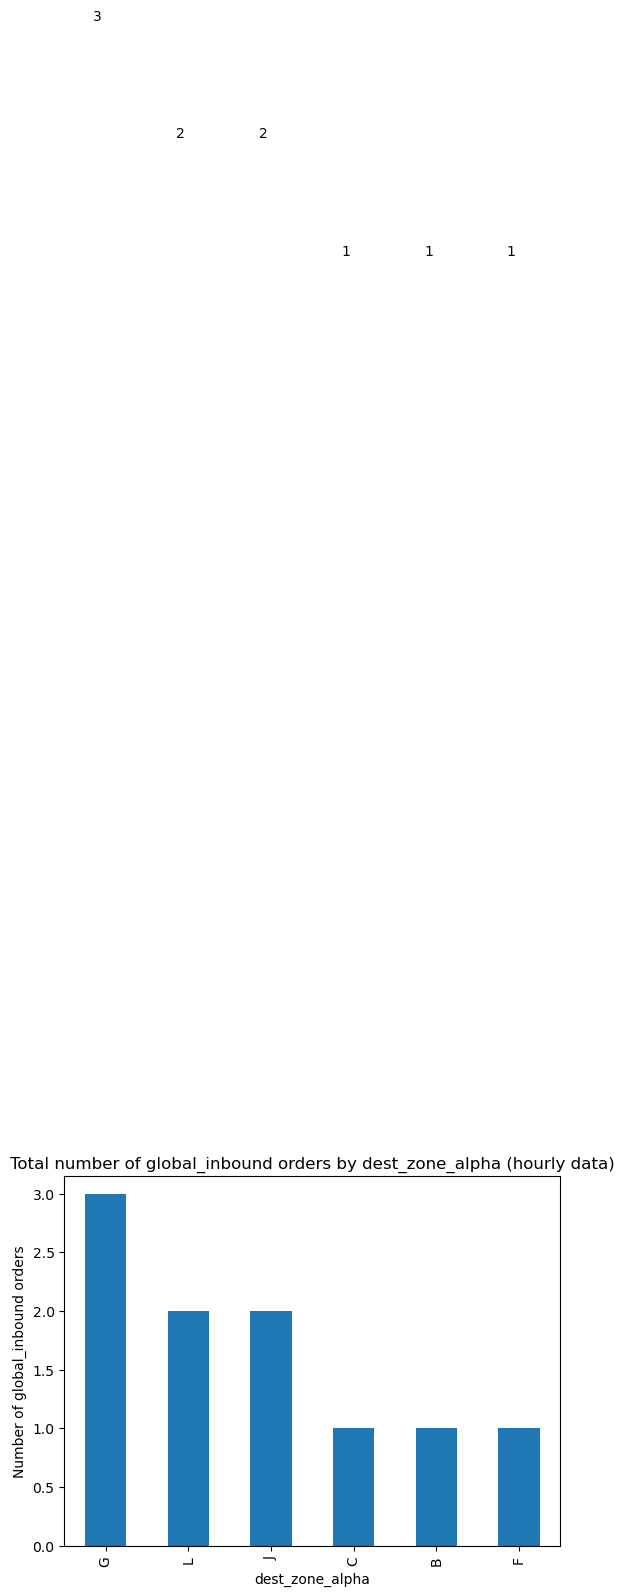

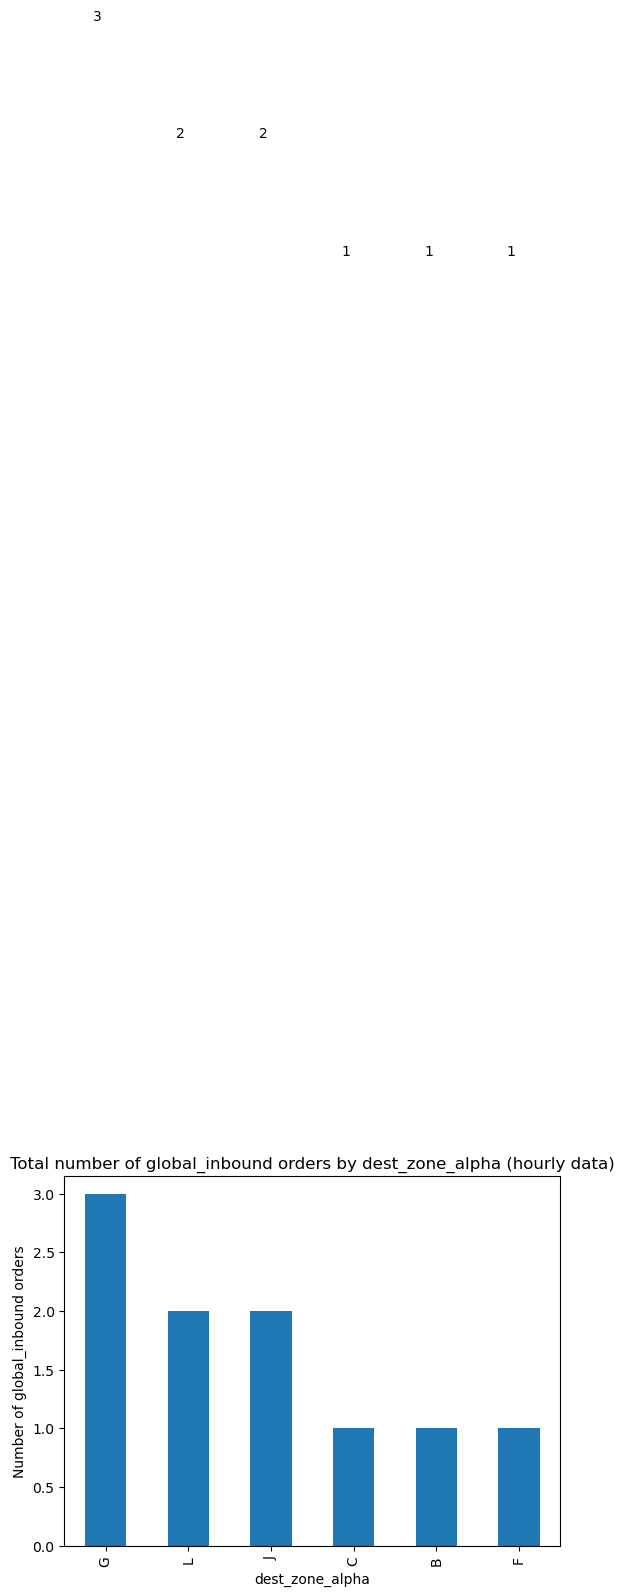

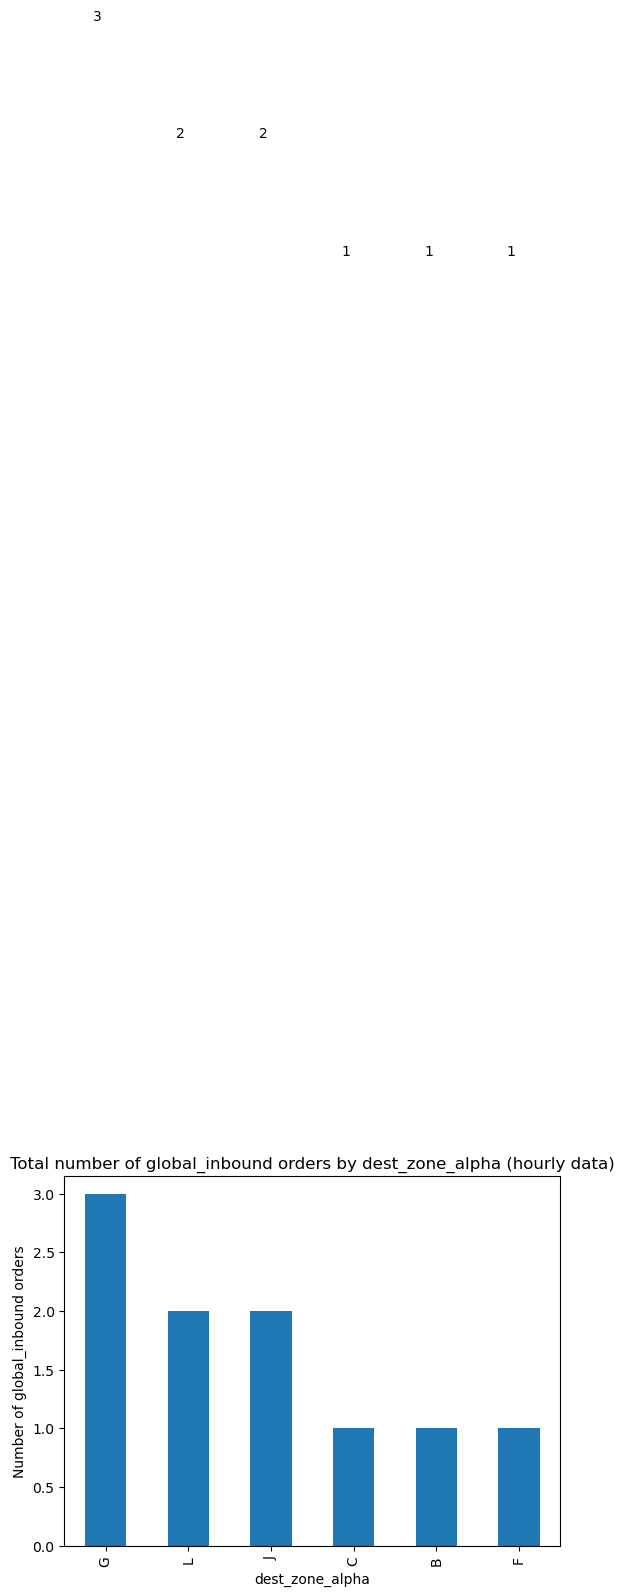

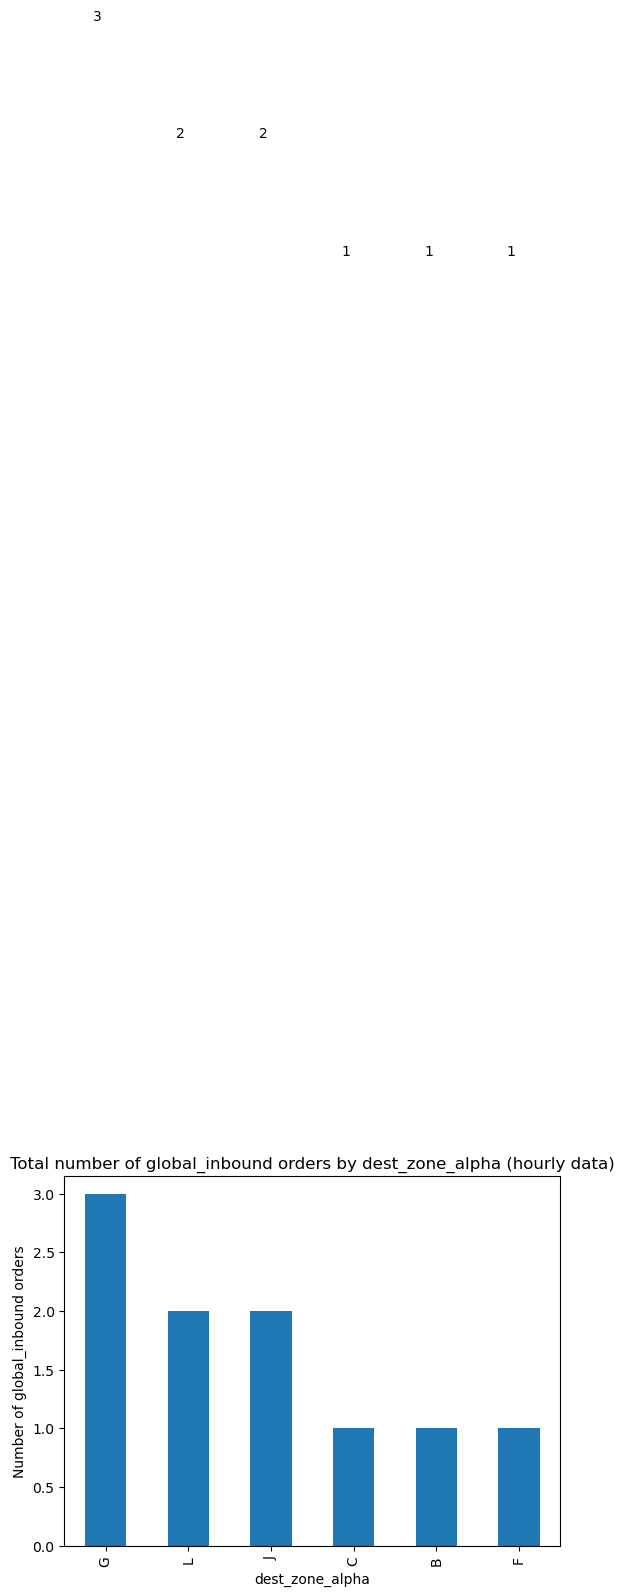

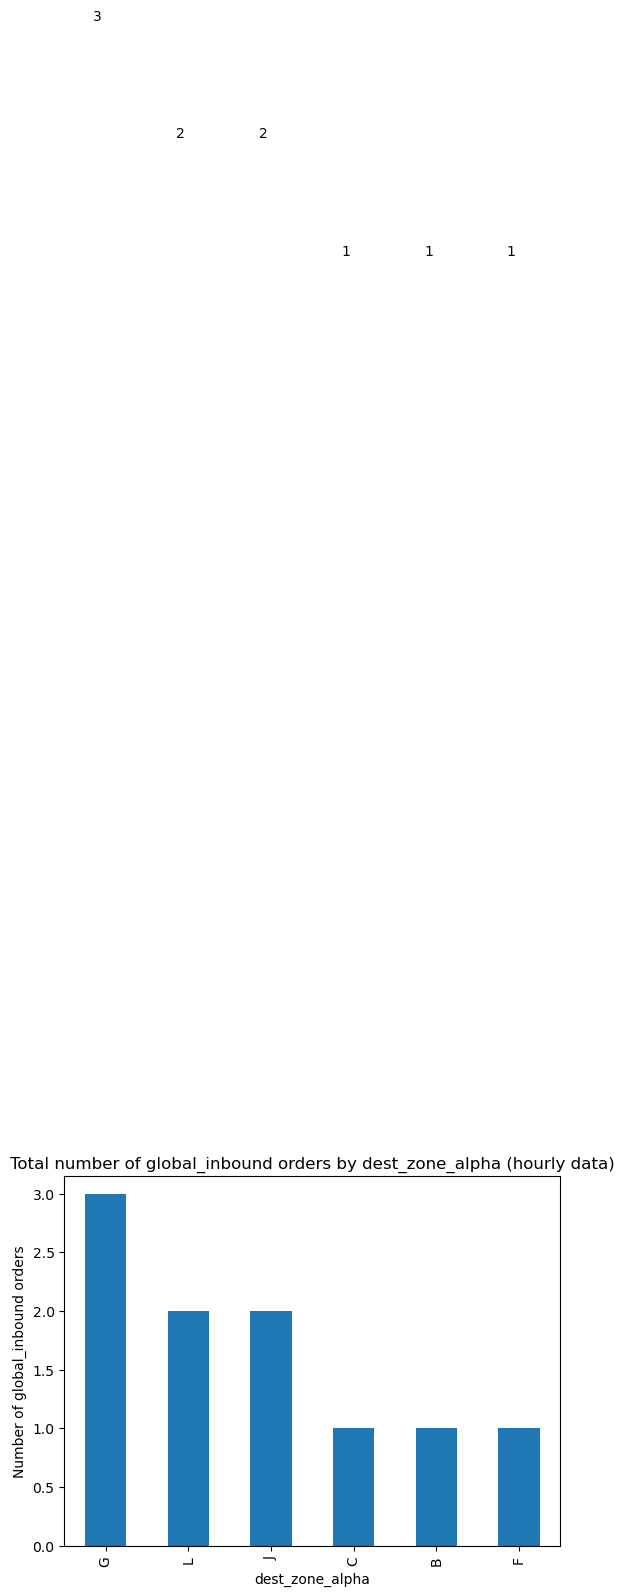

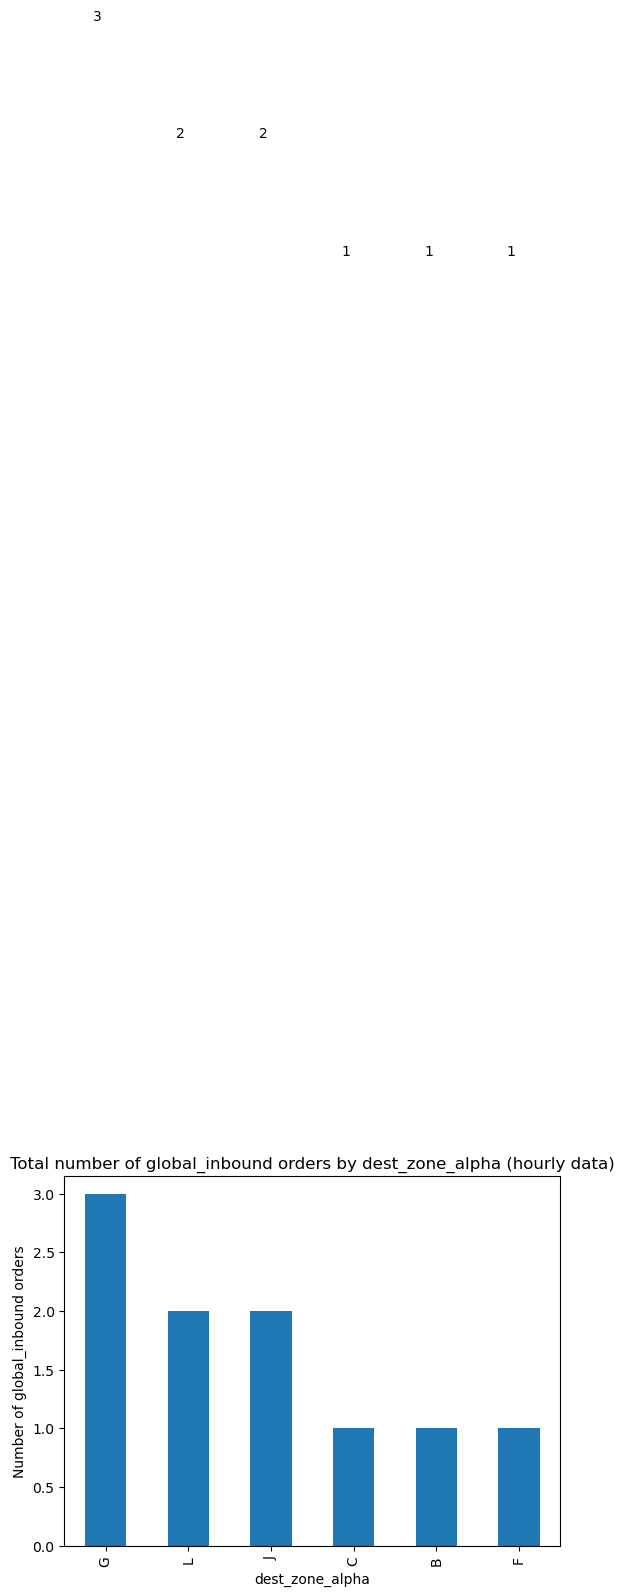

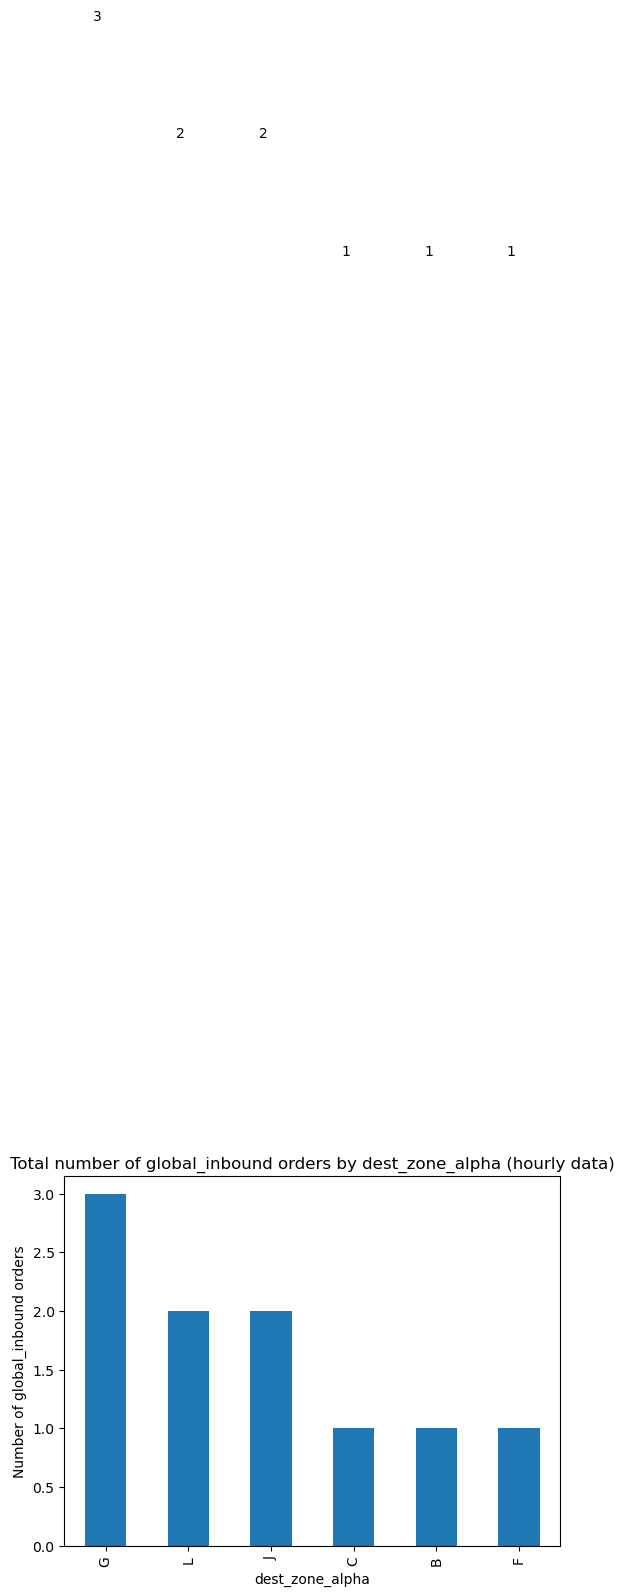

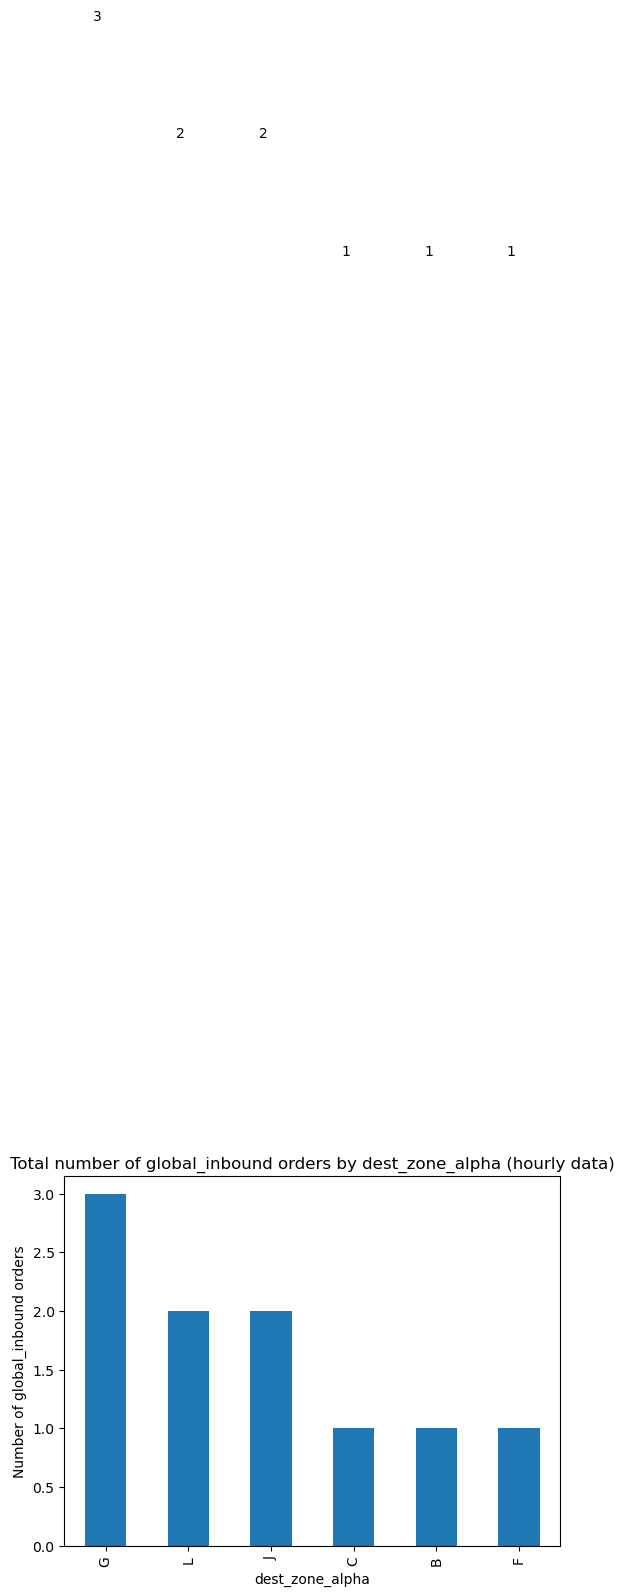

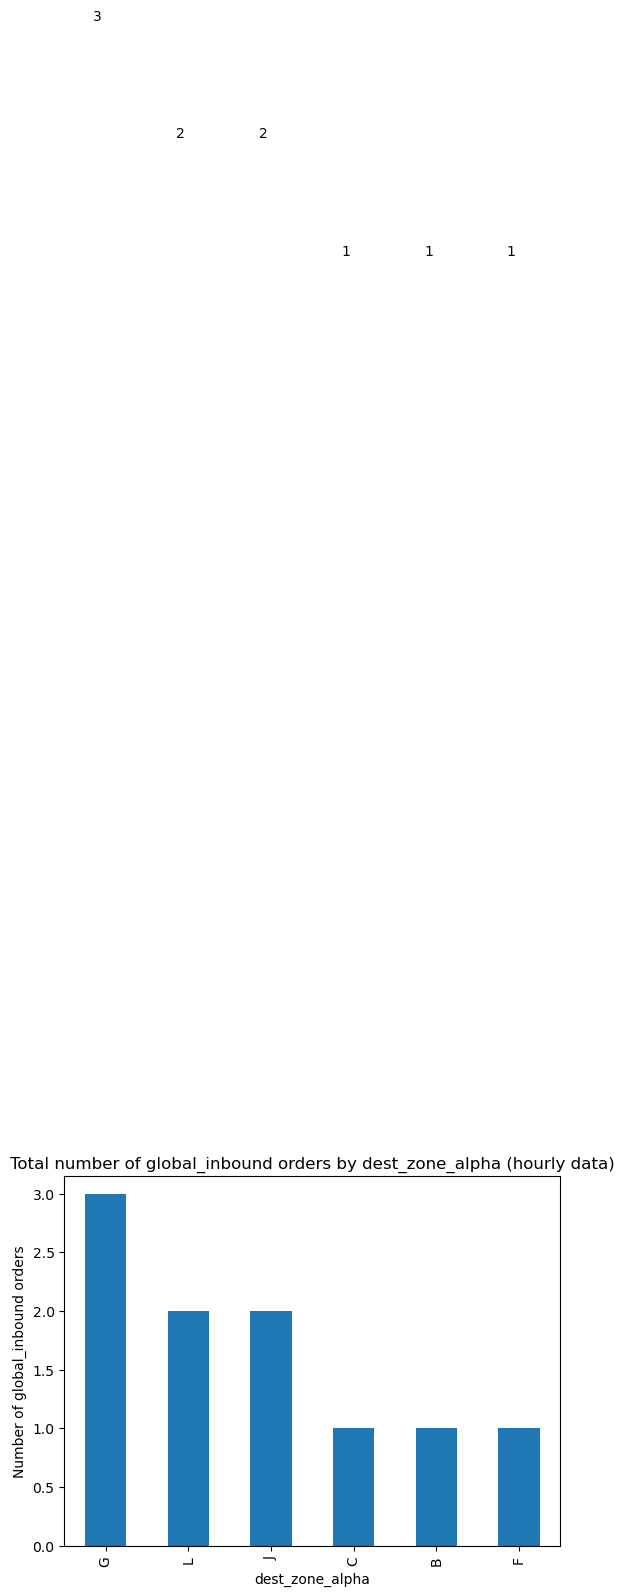

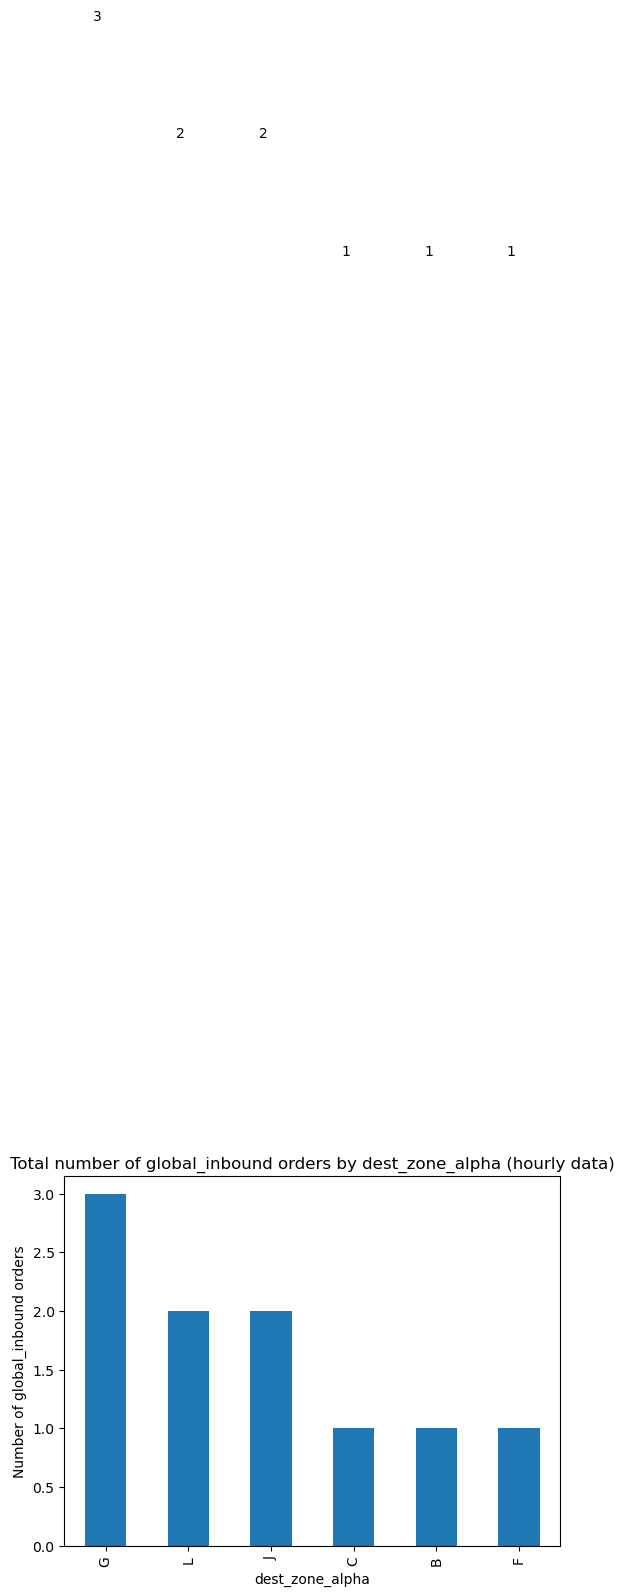

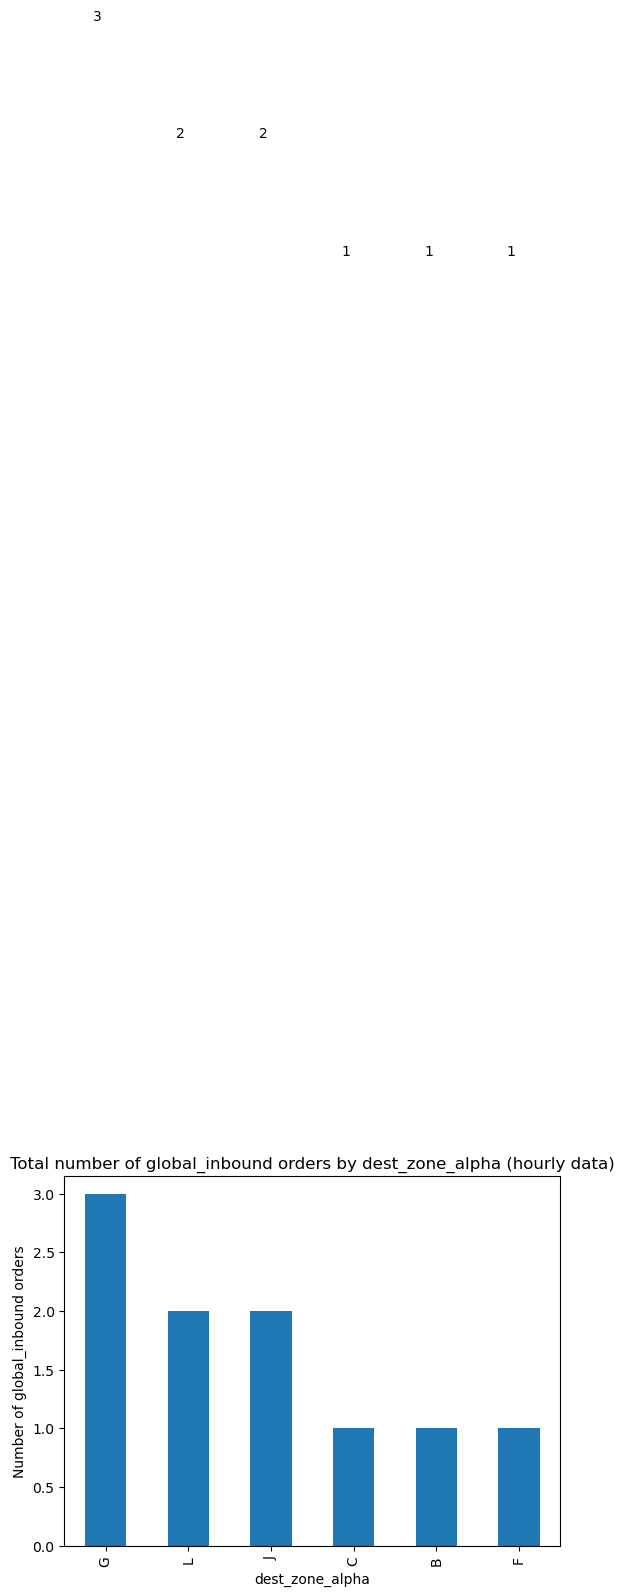

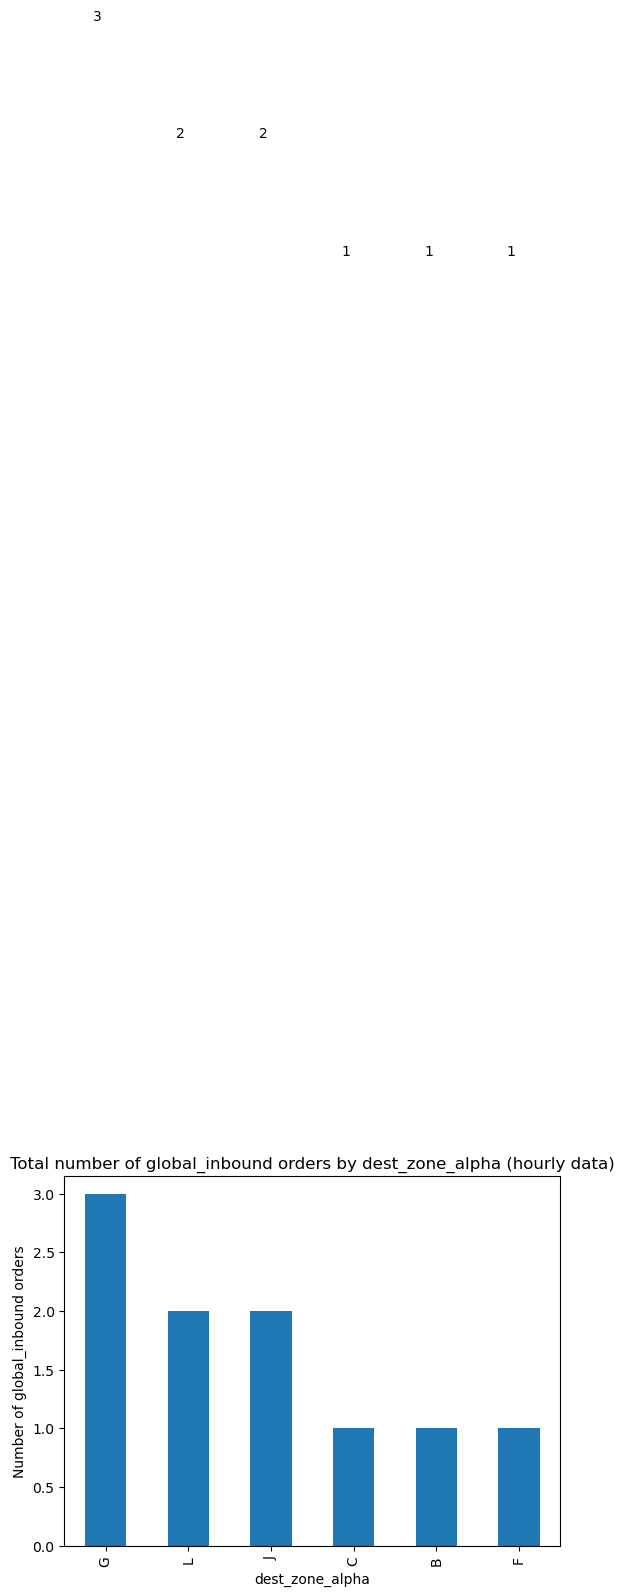

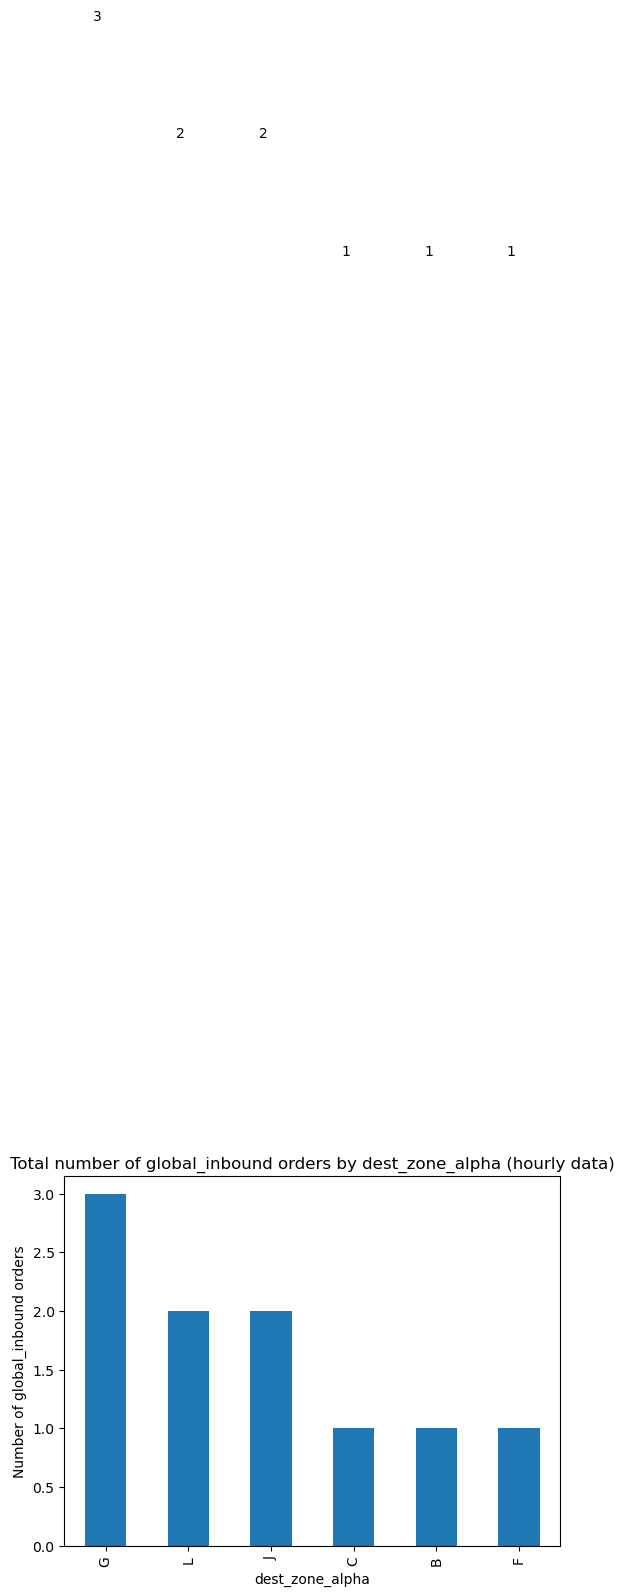

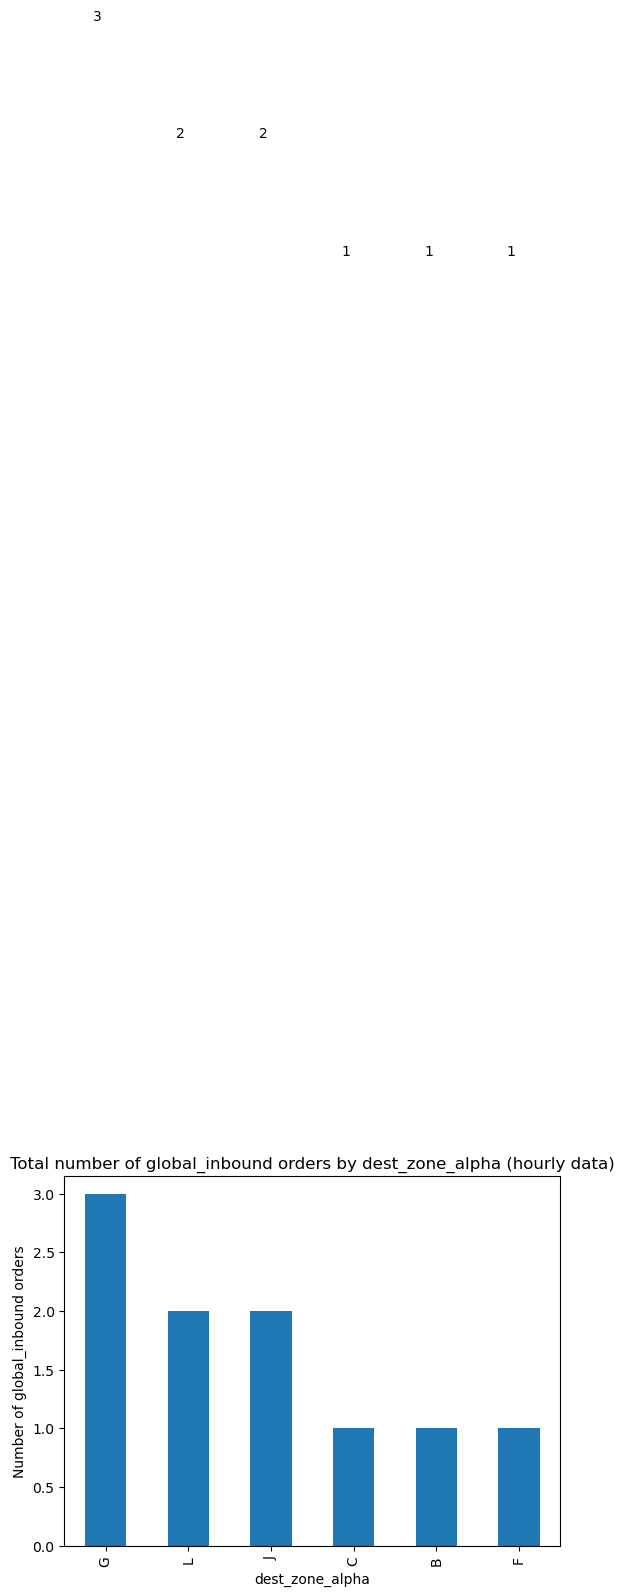

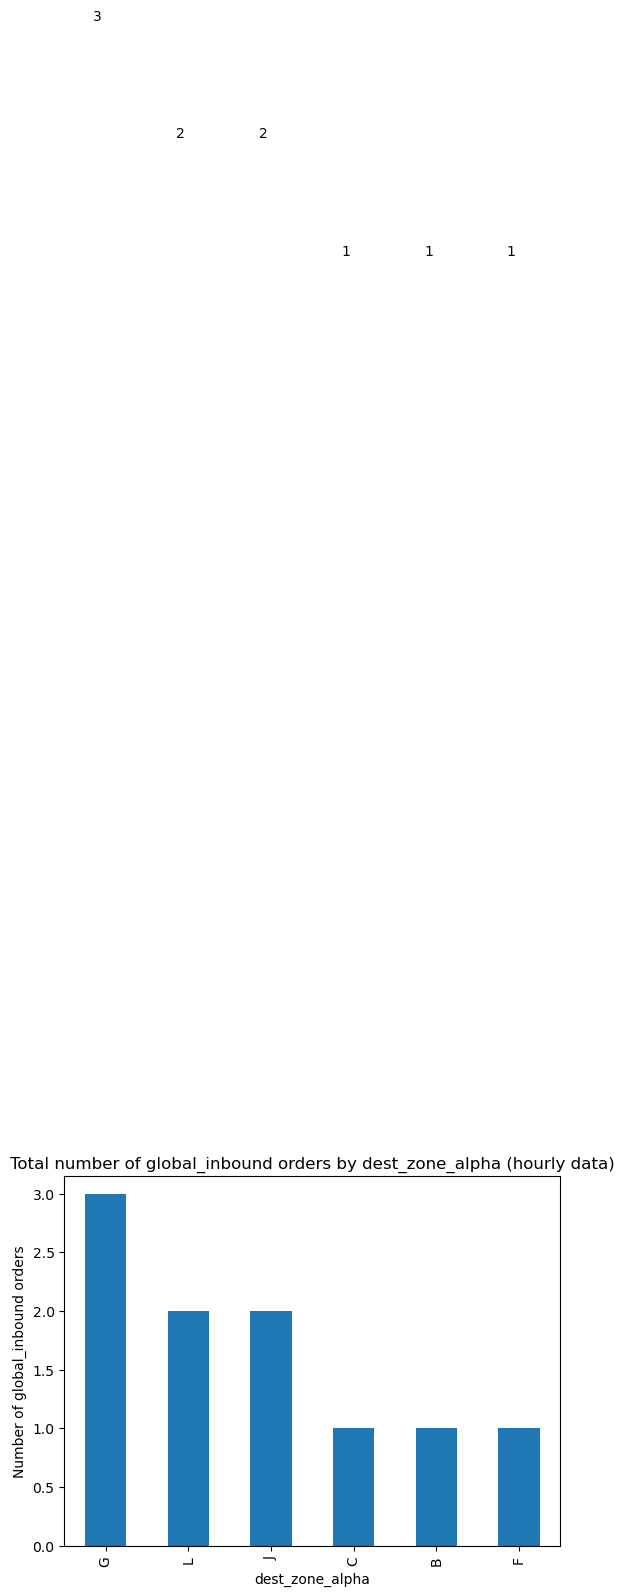

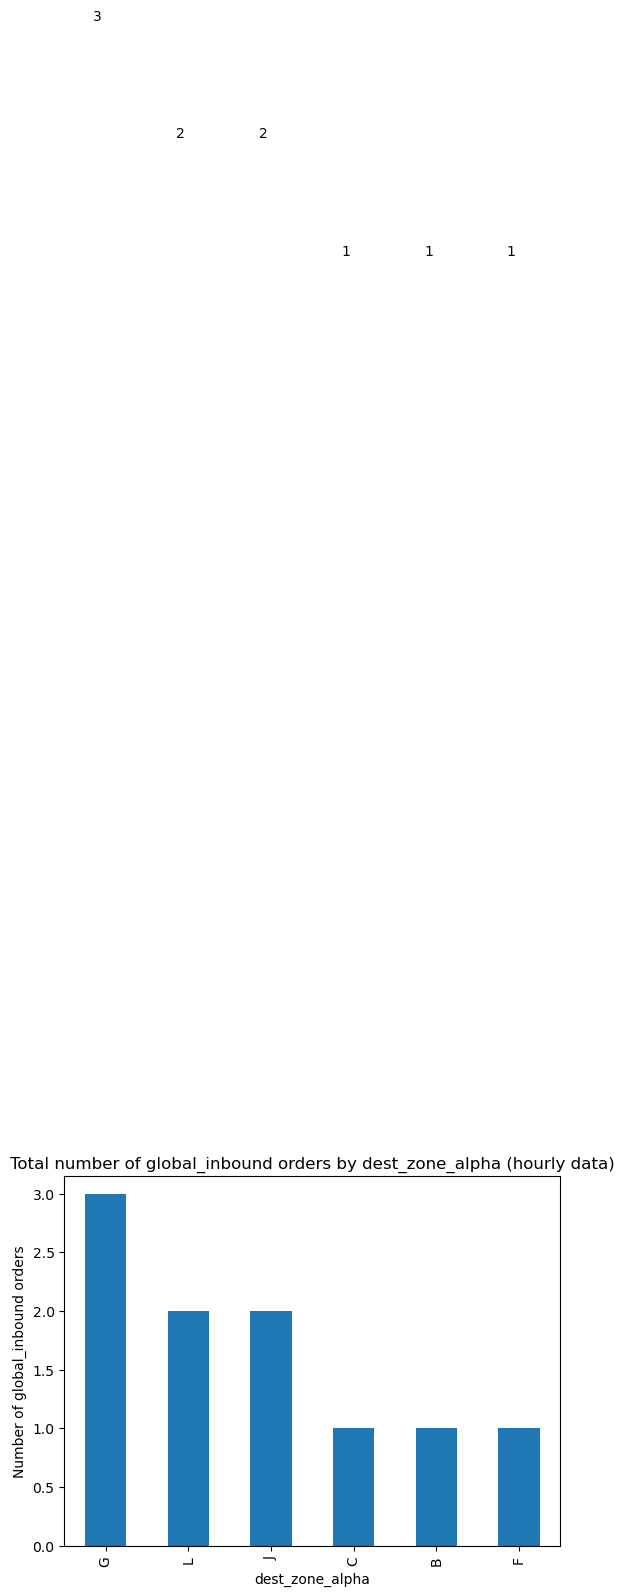

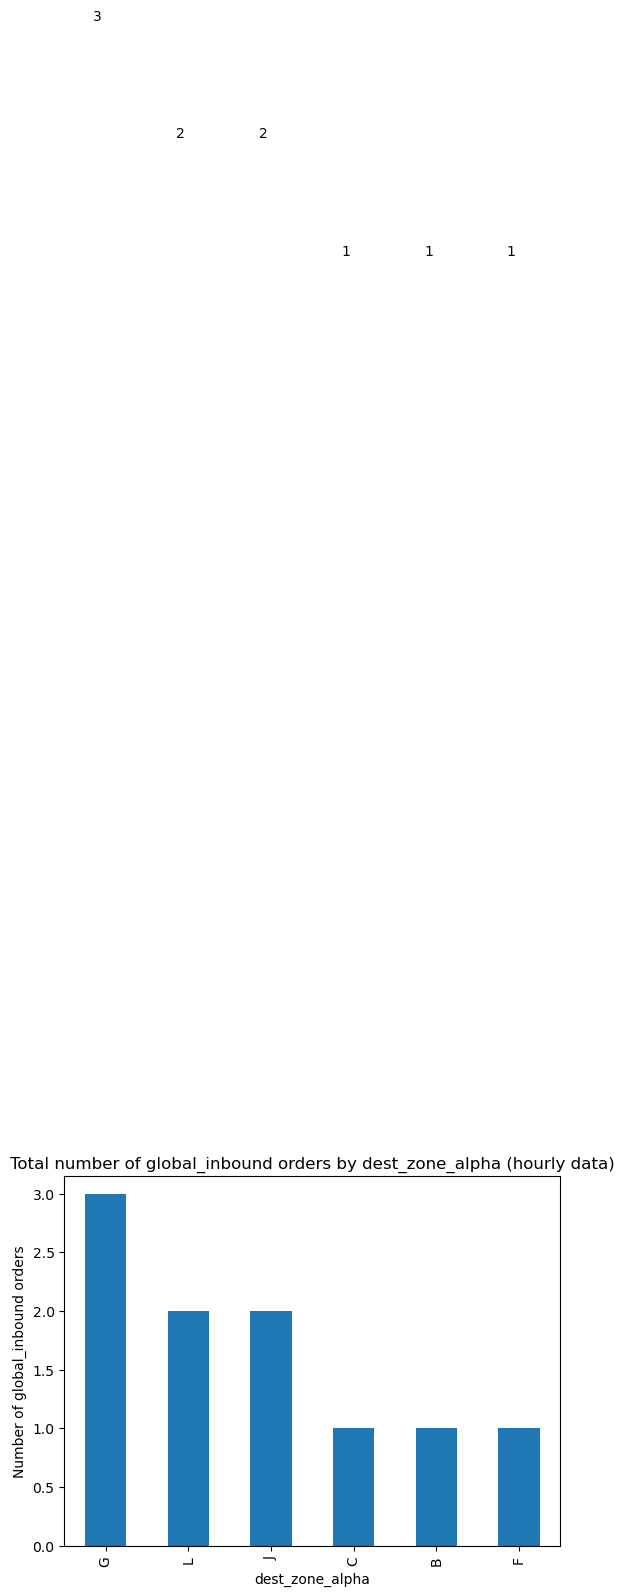

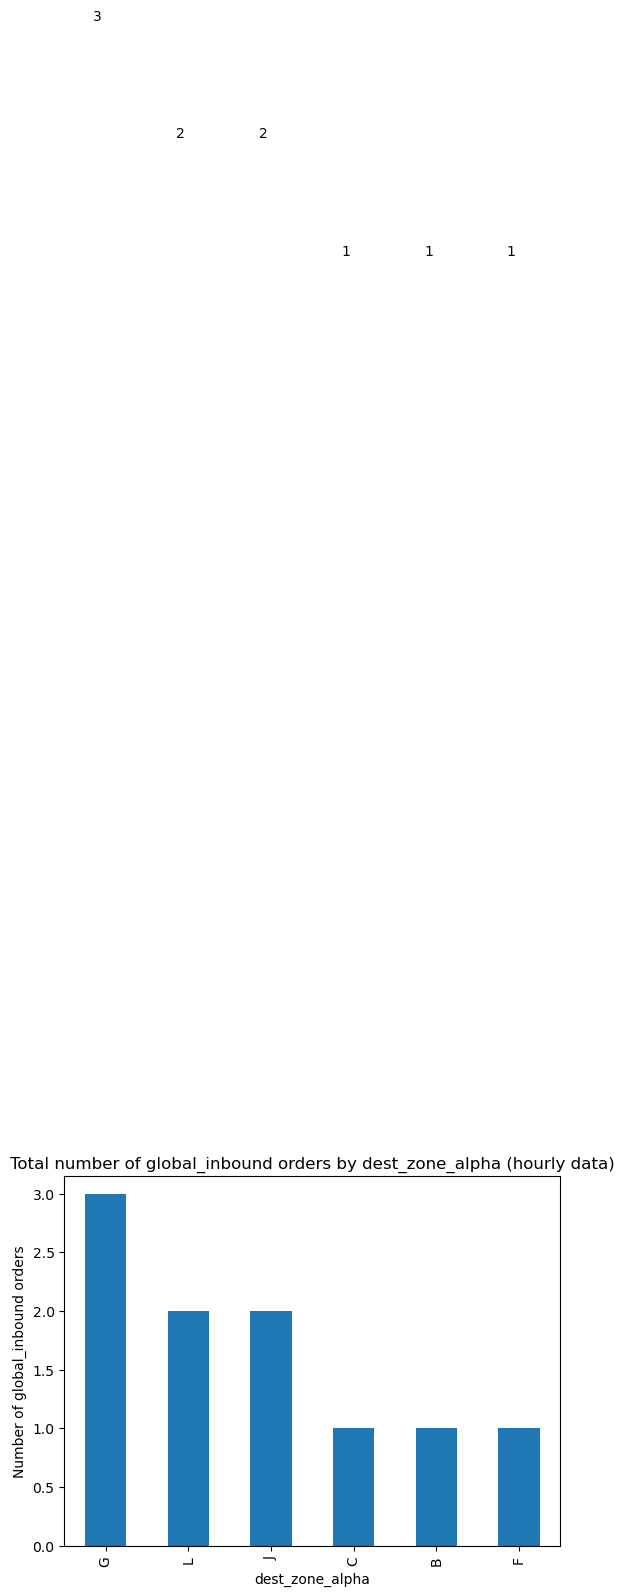

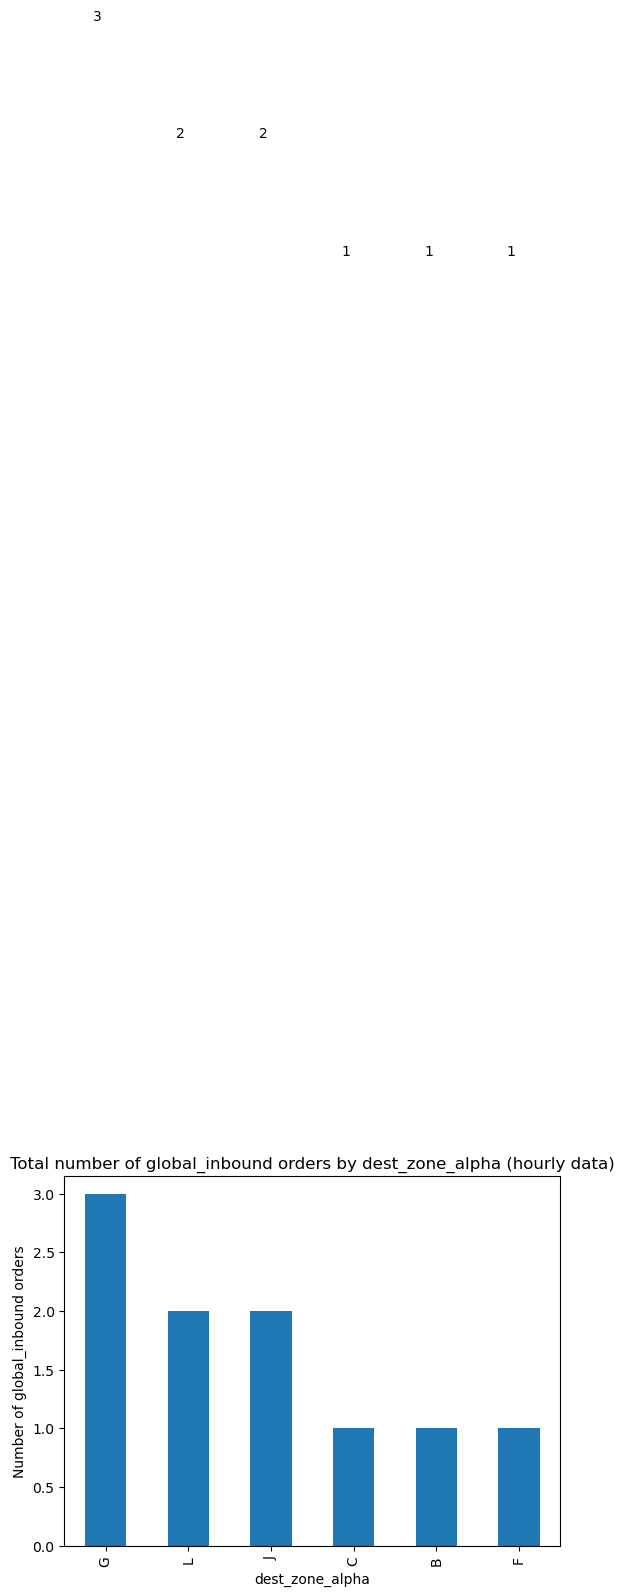

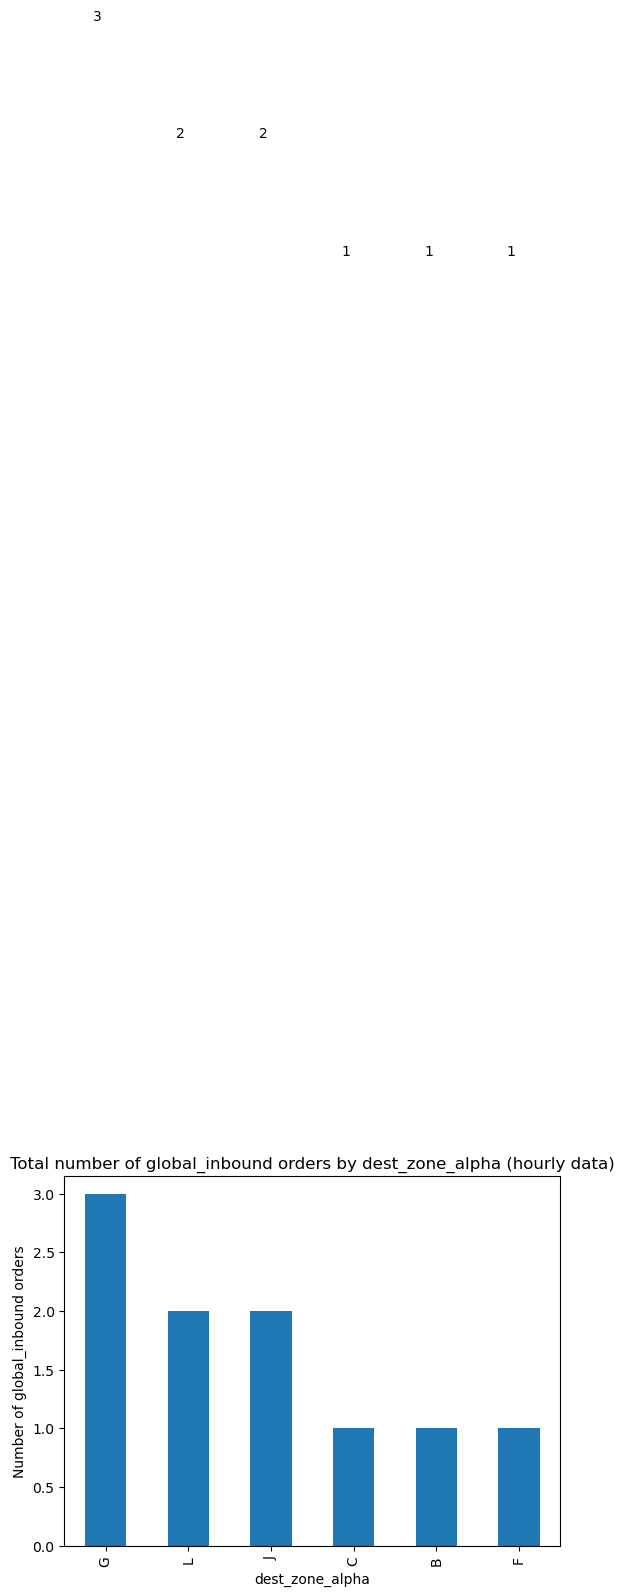

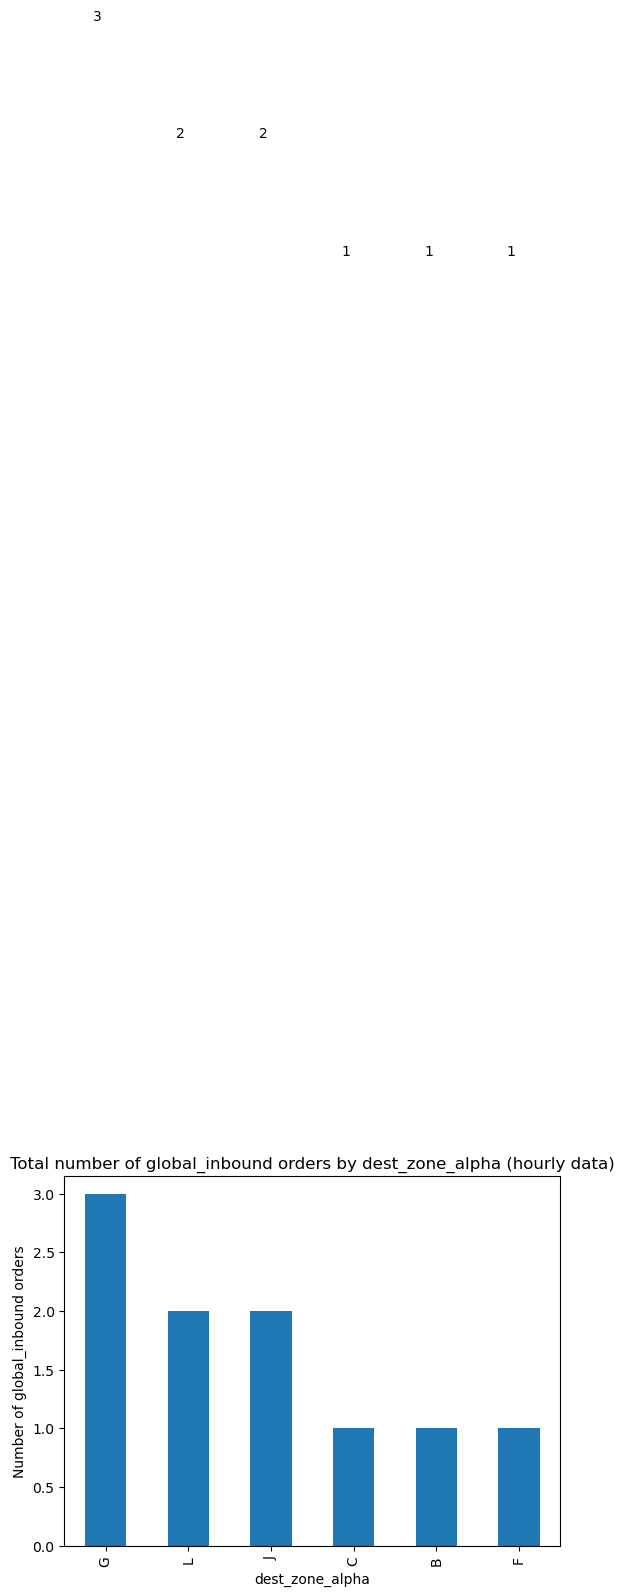

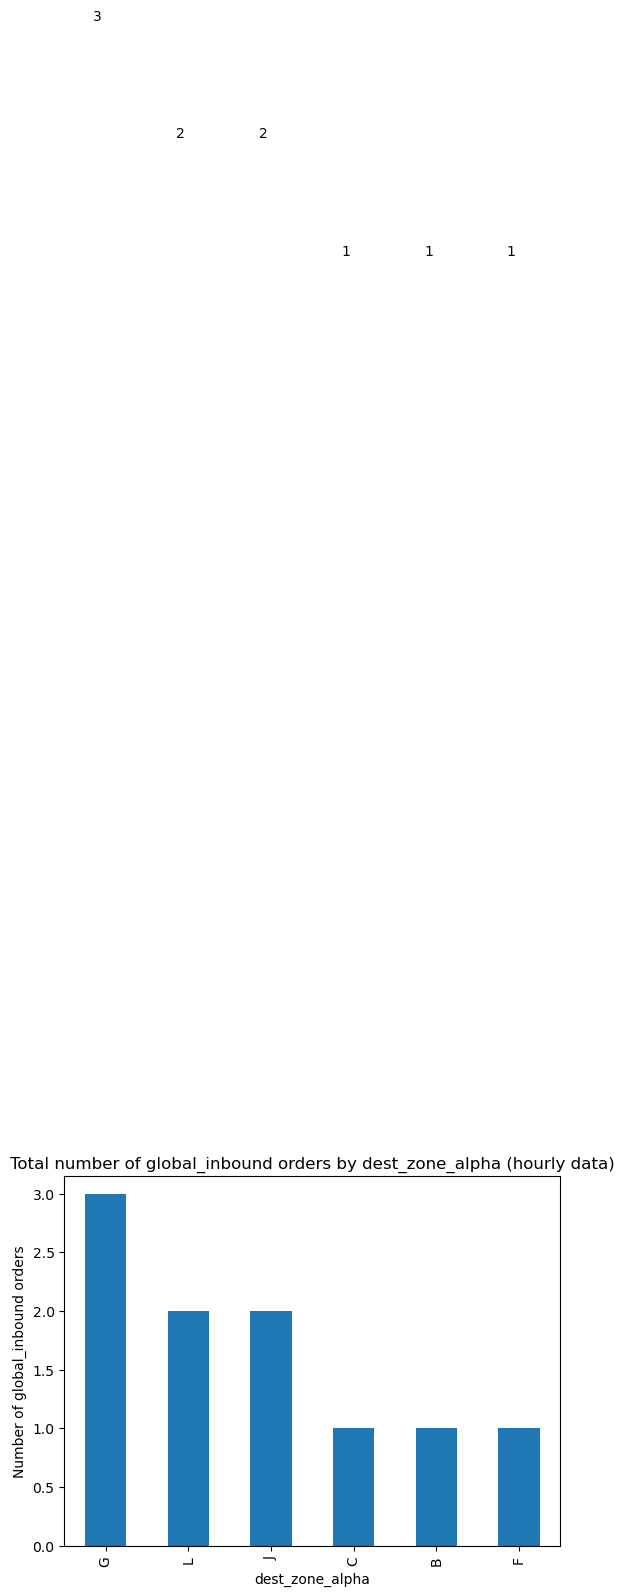

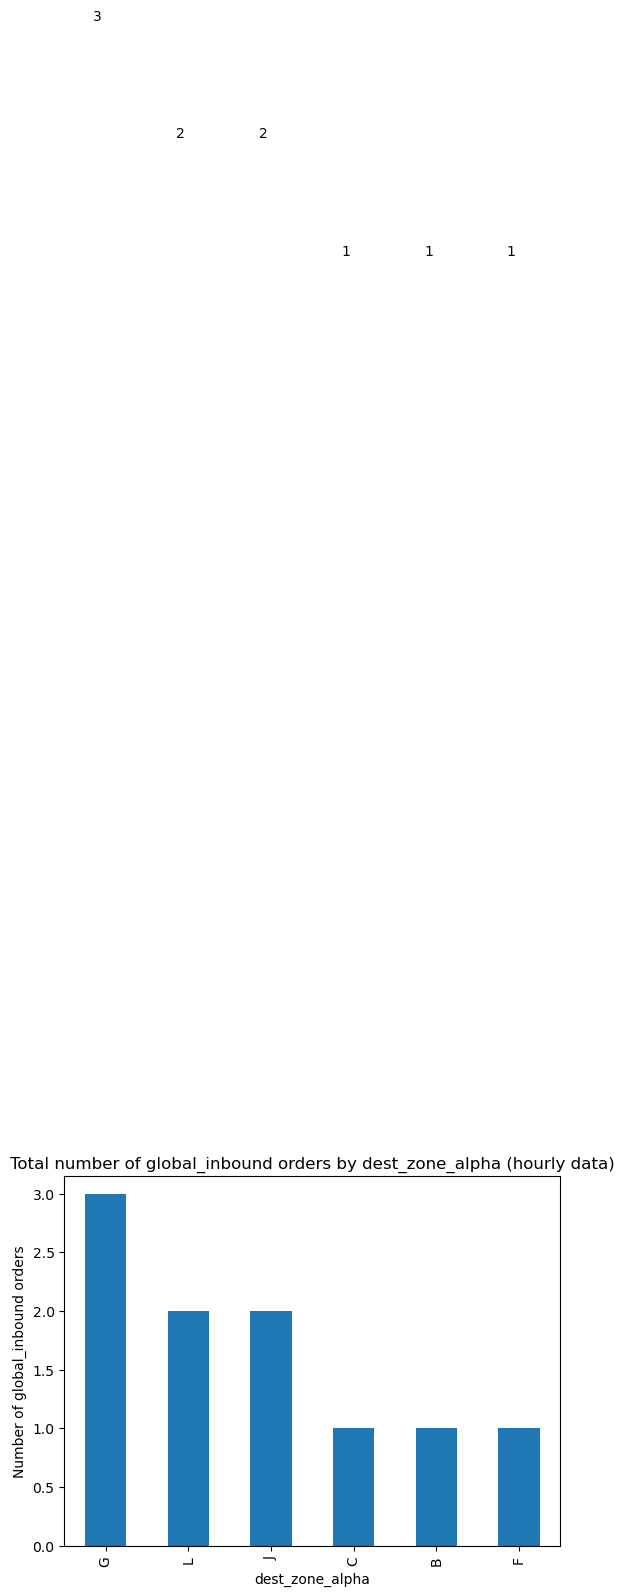

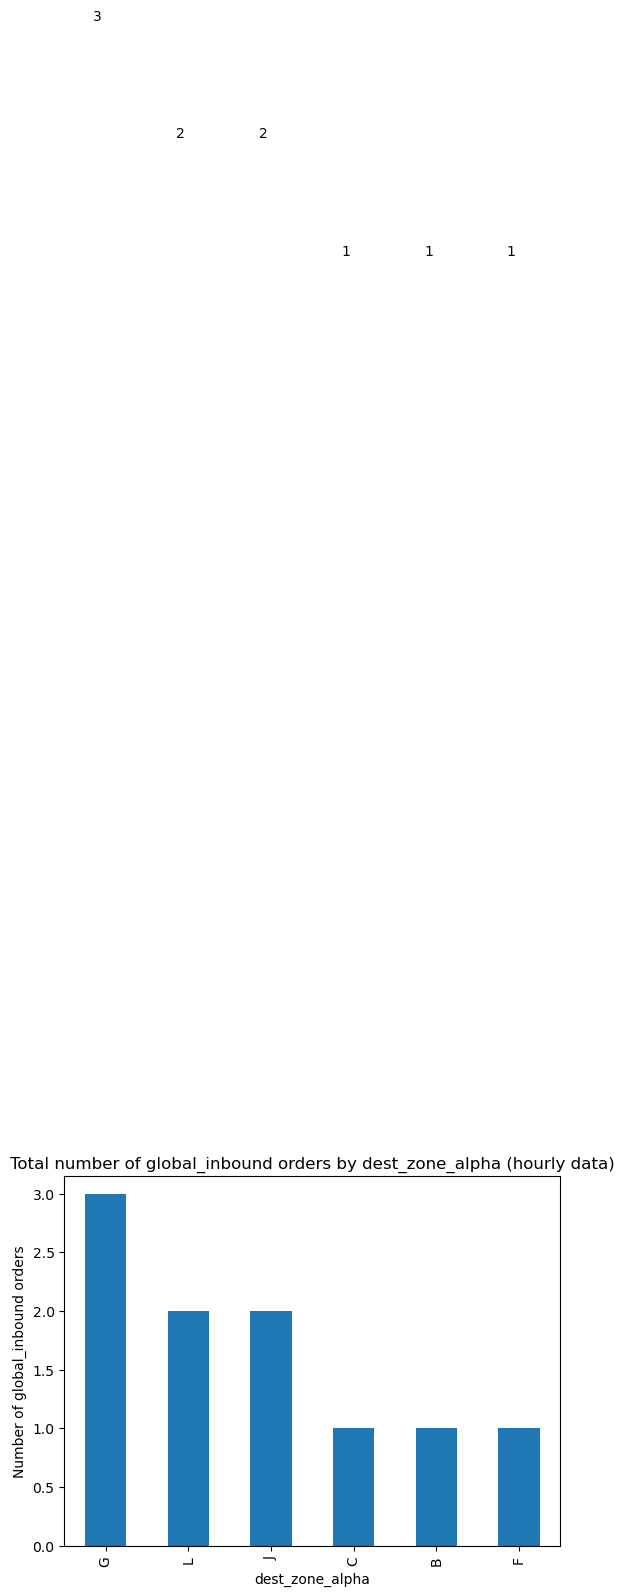

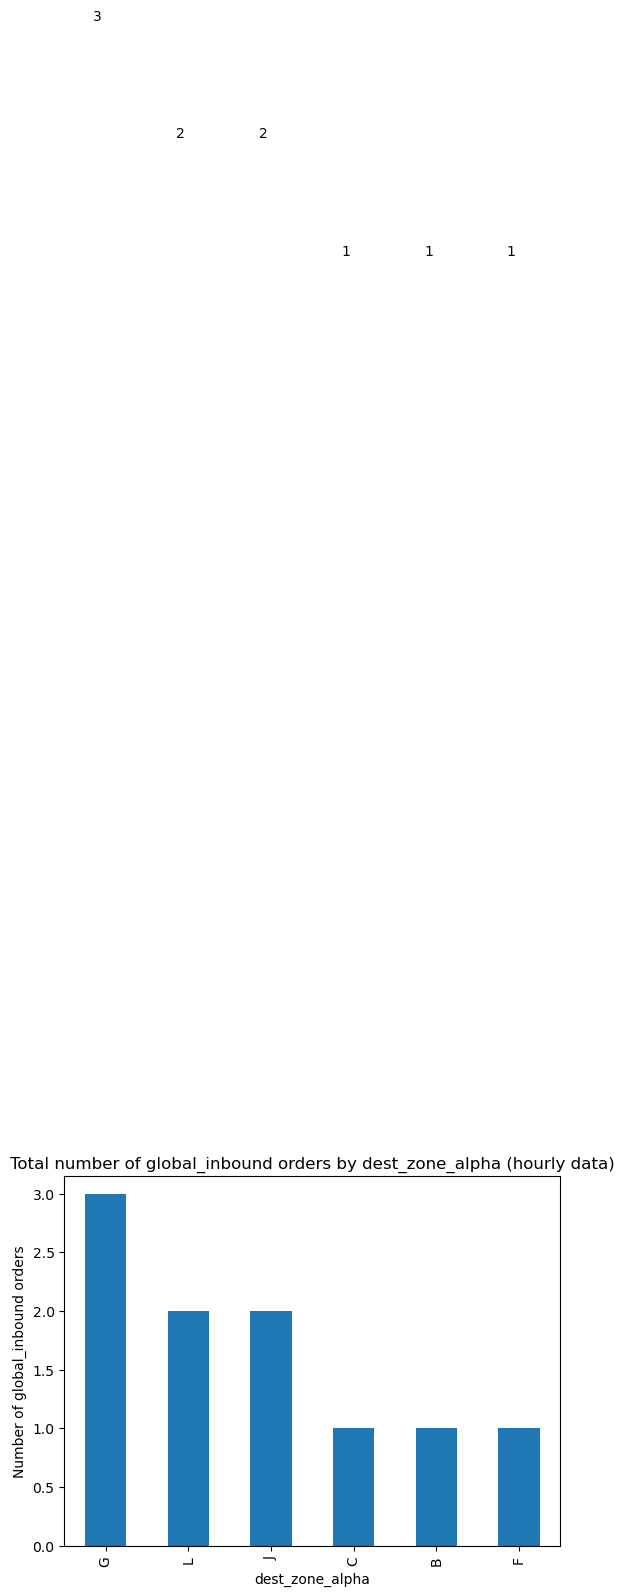

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

while True:
    # Read the data from the CSV file
    df = pd.read_csv('warehouse_scans_with_order_details2.csv')

    # Filter the data to only include global inbound orders and hourly data
    global_inbound_hourly_df = df[(df['type'] == 'global_inbound') & (pd.to_datetime(df['scanned_at']).dt.minute == 0)]

    # Count the number of global inbound orders for each distinct dest_zone_alpha
    global_inbound_counts = global_inbound_hourly_df['dest_zone_alpha'].value_counts()

    # Create a new DataFrame with the counts and dest_zone_alpha as columns
    global_inbound_counts_df = pd.DataFrame({'dest_zone_alpha': global_inbound_counts.index, 'global_inbound_count': global_inbound_counts.values})

    # Create a new column with the total number of global inbound orders
    total_global_inbound = global_inbound_counts_df['global_inbound_count'].sum()
    global_inbound_counts_df['total_global_inbound'] = total_global_inbound

    # Create a bar plot with value labels
    ax = global_inbound_counts_df.plot(kind='bar', x='dest_zone_alpha', y='global_inbound_count', legend=False)
    plt.xlabel('dest_zone_alpha')
    plt.ylabel('Number of global_inbound orders')
    plt.title('Total number of global_inbound orders by dest_zone_alpha (hourly data)')
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+10, str(i.get_height()))

    # Show the plot
    plt.show()

    # Wait for 5 seconds before refreshing the plot
    time.sleep(5)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ipywidgets import interact, widgets
import time

# Read the data into a pandas DataFrame
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to include only global_inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Convert the scanned_at column to a datetime data type
global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)

# Get the earliest and latest scanned_at time
earliest_time = global_inbound_df['scanned_at'].min()
latest_time = global_inbound_df['scanned_at'].max()

# Define a function to create the interactive plot
def plot_counts_by_date_and_hour(date, hour):
    # Filter the data to include only the selected day and hour
    start_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=hour)
    end_time = start_time + timedelta(hours=1)
    filtered_df = global_inbound_df[(global_inbound_df['scanned_at'] >= start_time) & (global_inbound_df['scanned_at'] < end_time)]

    # Group the data by dest_zone_alpha values, and count the number of orders for each group
    counts_by_dest = filtered_df.groupby('dest_zone_alpha').size()

    # Create a bar plot
    counts_by_dest.plot(kind='bar')
    plt.xlabel('dest_zone_alpha')
    plt.ylabel('Number of global_inbound orders')
    plt.title('Global inbound order counts for {} {}:00-{} {}:00'.format(date.strftime('%Y-%m-%d'), hour, date.strftime('%Y-%m-%d'), hour+1))
    plt.show()

# Create date and time picker widgets for selecting the day and hour
date_picker = widgets.DatePicker(value=earliest_time.date(), description='Select a date')
hour_slider = widgets.IntSlider(min=0, max=23, step=1, value=earliest_time.hour, description='Select an hour')

while True:
    # Call the interact function to create the interactive plot
    interact(plot_counts_by_date_and_hour, date=date_picker, hour=hour_slider)
    
    # Wait for 5 seconds before refreshing the plot
    time.sleep(5)
    
    # Get the current values of the date and hour widgets
    current_date = date_picker.value
    current_hour = hour_slider.value
    
    # Update the hour slider to the next hour
    if current_hour == 23:
        # If the current hour is 23, set the hour slider to 0 and increment the date by 1 day
        current_hour = 0
        current_date += timedelta(days=1)
        date_picker.value = current_date
    else:
        # Otherwise, increment the hour slider by 1 hour
        current_hour += 1
        hour_slider.value = current_hour
    
    # Clear the previous plot
    plt.clf()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ipywidgets import interact, widgets
import threading

# Read the data into a pandas DataFrame
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to include only global_inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Convert the scanned_at column to a datetime data type
global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)

# Define a function to create the interactive plot
def plot_counts_by_date_and_hour(date, hour):
    # Filter the data to include only the selected day and hour
    start_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=hour)
    end_time = start_time + timedelta(hours=1)
    filtered_df = global_inbound_df[(global_inbound_df['scanned_at'] >= start_time) & (global_inbound_df['scanned_at'] < end_time)]

    # Group the data by dest_zone_alpha values, and count the number of orders for each group
    counts_by_dest = filtered_df.groupby('dest_zone_alpha').size()

    # Create a bar plot
    fig, ax = plt.subplots()
    counts_by_dest.plot(kind='bar', ax=ax)
    ax.set_xlabel('dest_zone_alpha')
    ax.set_ylabel('Number of global_inbound orders')
    ax.set_title('Global inbound order counts for {} {}:00-{} {}:00'.format(date.strftime('%Y-%m-%d'), hour, date.strftime('%Y-%m-%d'), hour+1))

    # Create a sidebar with the total count of global inbound orders for the selected day
    start_of_day = datetime.combine(date, datetime.min.time())
    end_of_day = start_of_day + timedelta(days=1)
    daily_filtered_df = global_inbound_df[(global_inbound_df['scanned_at'] >= start_of_day) & (global_inbound_df['scanned_at'] < end_of_day)]
    daily_count = len(daily_filtered_df)
    sidebar = widgets.VBox([widgets.Label('Total global inbound orders for selected day:'), widgets.Label(str(daily_count))])
    display(sidebar)

# Get the earliest and latest scanned_at time
earliest_time = global_inbound_df['scanned_at'].min()
latest_time = global_inbound_df['scanned_at'].max()

# Create date and time picker widgets for selecting the day and hour
date_picker = widgets.DatePicker(value=earliest_time.date(), description='Select a date')
hour_slider = widgets.IntSlider(min=0, max=23, step=1, value=earliest_time.hour, description='Select an hour')

# Define a function to update the plot every 5 seconds
def update_plot():
    while True:
        # Get the current date and hour
        current_date = date_picker.value
        current_hour = hour_slider.value

        # Call the plot_counts_by_date_and_hour function to update the plot
        plot_counts_by_date_and_hour(current_date, current_hour)

        # Sleep for 5 seconds
        time.sleep(5)

# Call the interact function to create the interactive plot
display(interact(plot_counts_by_date_and_hour, date=date_picker, hour=hour_slider))

# Start a thread to update the plot every 5 seconds
threading.Thread(target=update_plot).start()


/var/folders/sk/7fyw_2qn5j35kf40jlm5f69h0000gn/T/ipykernel_38073/3652194078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)


interactive(children=(DatePicker(value=datetime.date(2023, 1, 2), description='Select a date'), IntSlider(valu…

<function __main__.plot_counts_by_date_and_hour(date, hour)>

<Figure size 640x480 with 0 Axes>